In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan, Workflow

yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d']

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/4SyP'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')


0:00:01.242995  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_jwp31zpn. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 780,942,970,880
0:00:01.256156  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:01.256643  INFO: 


In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_d12_shared_eg_n_fragments.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)


test_lib.precursor_df = test_lib.precursor_df[test_lib.precursor_df['channel'] == 0]

In [3]:
test_lib.precursor_df.channel.value_counts()

0    91732
Name: channel, dtype: int64

0:00:10.119426  PROGRESS:       _   _      _         ___ ___   _   
0:00:10.119954  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:10.120299  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:10.120622  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:10.120980  PROGRESS:            |_|                            
0:00:10.121243  PROGRESS: 
0:00:10.122193  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:10.129265  INFO: Applying config update from dict
0:00:10.129677  PROGRESS: version: 1.0.2
0:00:10.129926  PROGRESS: hostname: Georgs-MacBook-Pro.local
0:00:10.130182  PROGRESS: date: 2023-05-15 09:19:24
0:00:13.438162  INFO: renaming precursor_columns columns
0:00:13.438978  INFO: renaming fragment_columns columns
0:00:13.439362  INFO: ========= Library Stats =========
0:00:13.439580  INFO: Number of precursors: 91,732
0:00:13.457682  INFO: 	thereof targets:45,867
0:00:13.4581

7836


  0%|          | 0/14028 [00:00<?, ?it/s]/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from float64 to float32. Precision may be lost.
  numba_func(i, *args)
/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from int64 to float32. Precision may be lost.
  numba_func(i, *args)
100%|██████████| 14028/14028 [00:01<00:00, 8151.08it/s] 
0:09:12.723175  INFO: Scored 14028 candidates
0:09:12.729454  INFO: 0.21% of targets failed, 0.68% of decoys failed
0:09:13.017542  INFO: number of dfs in features: 1, total number of features: 13966


(13966, 25)
(13966,)


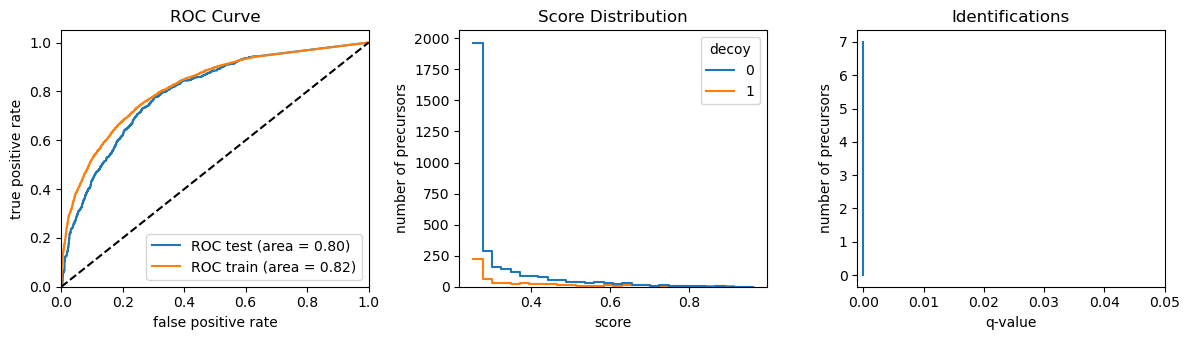

0:09:14.090295  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:09:14.091520  PROGRESS: Accumulated precursors: 3,906, 0.01 FDR: 8, 0.001 FDR: 8
0:09:14.091731  PROGRESS: === Epoch 0, step 1, extracting elution groups 4000 to 8000 ===
0:09:14.094110  PROGRESS: MS1 error: 30, MS2 error: 30, RT error: 240, Mobility error: 0.08
0:09:14.098095  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:09:14.098434  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:09:14.098685  INFO: FWHM in RT is 5.00 seconds, sigma is 3.11
0:09:14.098893  INFO: FWHM in mobility is 0.015 1/K_0, sigma is 9.85


7786


100%|██████████| 13948/13948 [00:01<00:00, 10308.57it/s]
0:14:05.293791  INFO: Scored 13948 candidates
0:14:05.298522  INFO: 0.21% of targets failed, 0.46% of decoys failed
0:14:05.583150  INFO: number of dfs in features: 2, total number of features: 27867


(27867, 25)
(27867,)


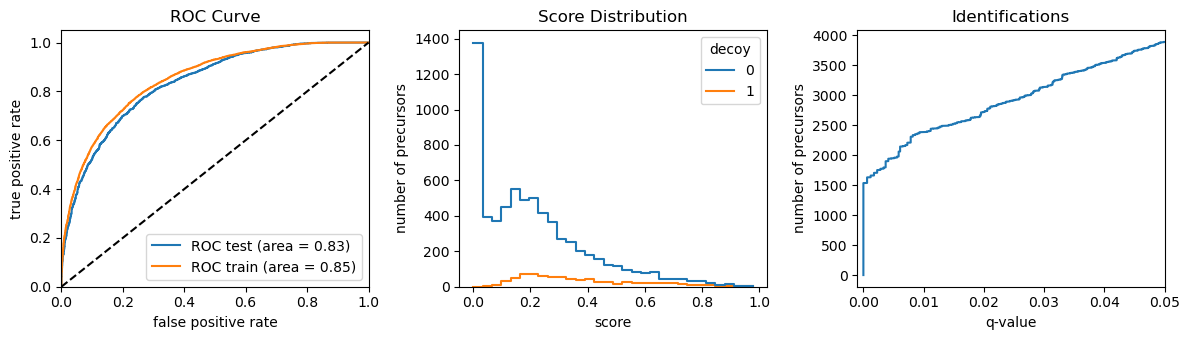

0:14:07.519448  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:14:07.519783  PROGRESS: Accumulated precursors: 7,618, 0.01 FDR: 2,386, 0.001 FDR: 1,631
0:14:07.521050  INFO: calibration group: precursor, fitting mz estimator 


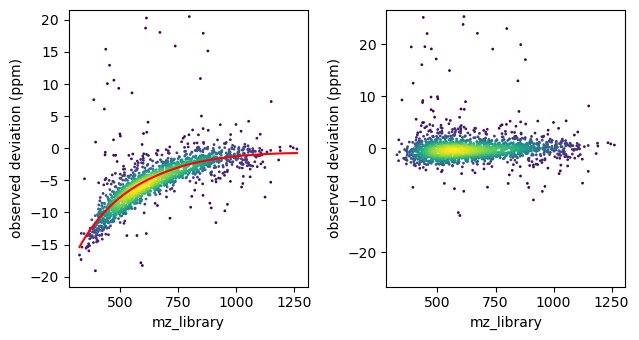

0:14:07.645278  INFO: calibration group: precursor, fitting rt estimator 


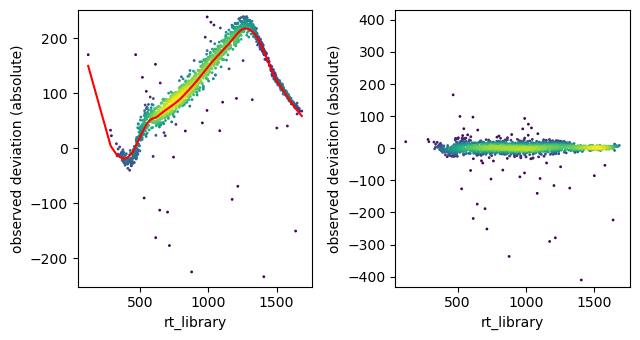

0:14:07.765709  INFO: calibration group: precursor, fitting mobility estimator 


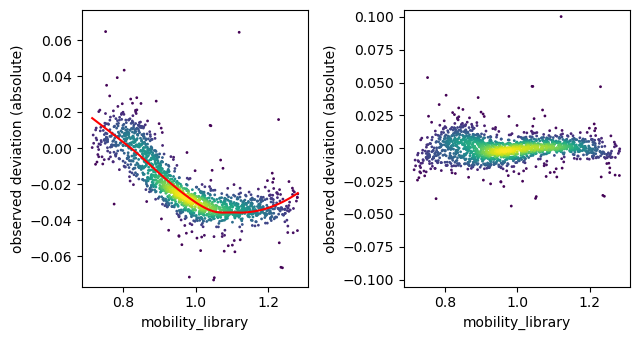

0:14:07.898408  INFO: calibration group: fragment, fitting mz estimator 


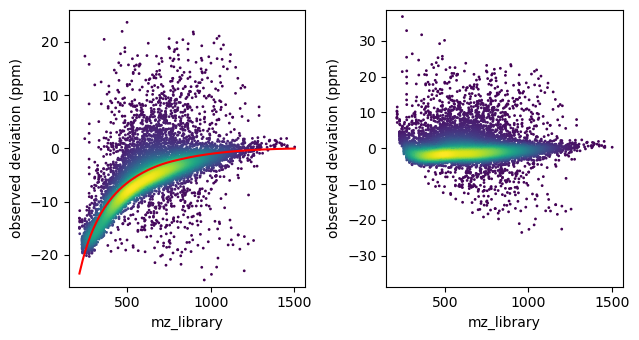

0:14:08.864535  INFO: calibration group: precursor, predicting mz
0:14:08.878774  INFO: calibration group: precursor, predicting rt
0:14:08.906073  INFO: calibration group: precursor, predicting mobility
0:14:08.919779  INFO: calibration group: fragment, predicting mz
0:14:09.234729  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:14:09.244547  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:14:09.246462  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:14:09.246754  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:14:09.247000  INFO: FWHM in RT is 4.63 seconds, sigma is 2.88
0:14:09.247273  INFO: FWHM in mobility is 0.011 1/K_0, sigma is 7.49


7810


100%|██████████| 13191/13191 [00:01<00:00, 10389.74it/s]
0:14:38.905675  INFO: Scored 13191 candidates
0:14:38.910225  INFO: 0.58% of targets failed, 0.67% of decoys failed
0:14:39.104238  INFO: number of dfs in features: 1, total number of features: 13109


(13109, 25)
(13109,)


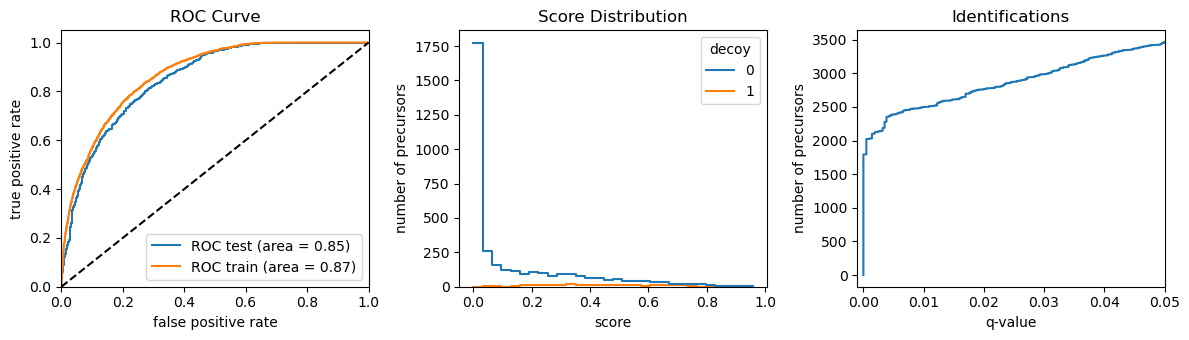

0:14:39.892427  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:14:39.892741  PROGRESS: Accumulated precursors: 3,879, 0.01 FDR: 2,497, 0.001 FDR: 2,031
0:14:39.893601  INFO: calibration group: precursor, fitting mz estimator 


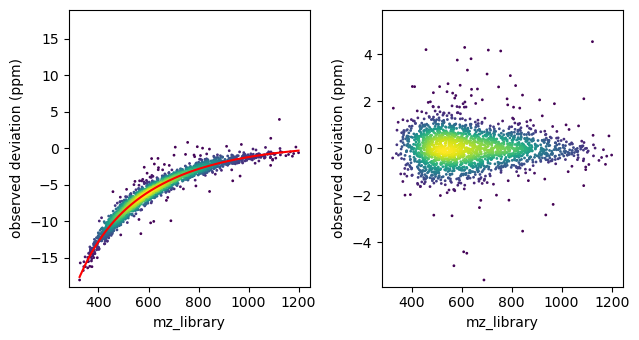

0:14:40.031488  INFO: calibration group: precursor, fitting rt estimator 


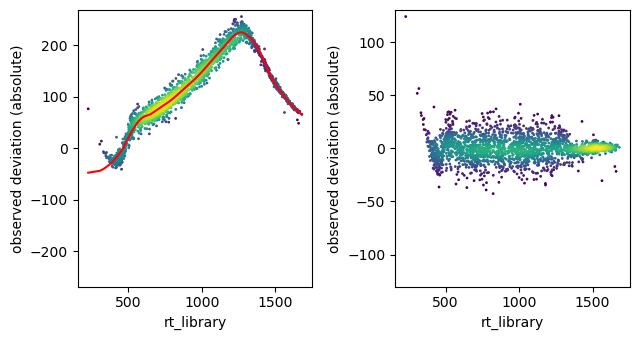

0:14:40.173067  INFO: calibration group: precursor, fitting mobility estimator 


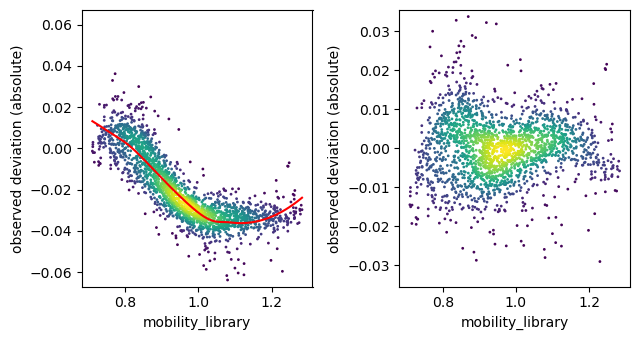

0:14:40.321807  INFO: calibration group: fragment, fitting mz estimator 


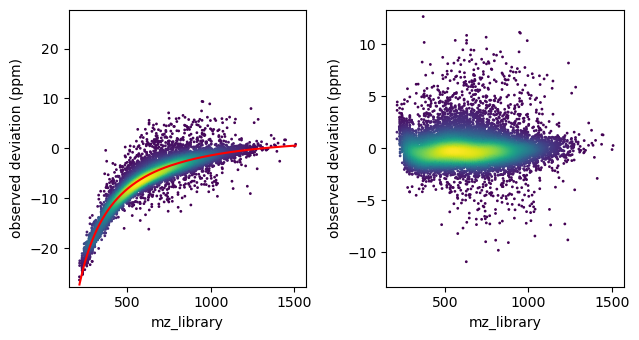

0:14:41.617635  INFO: calibration group: precursor, predicting mz
0:14:41.659298  INFO: calibration group: precursor, predicting rt
0:14:41.699561  INFO: calibration group: precursor, predicting mobility
0:14:41.714988  INFO: calibration group: fragment, predicting mz
0:14:42.016932  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:14:42.023752  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:14:42.031091  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:14:42.031448  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:14:42.031687  INFO: FWHM in RT is 4.02 seconds, sigma is 2.50
0:14:42.032041  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 6.14


7844


100%|██████████| 13058/13058 [00:01<00:00, 10393.13it/s]
0:15:12.825754  INFO: Scored 13058 candidates
0:15:12.831541  INFO: 0.46% of targets failed, 0.60% of decoys failed
0:15:13.012709  INFO: number of dfs in features: 1, total number of features: 12989


(12989, 25)
(12989,)


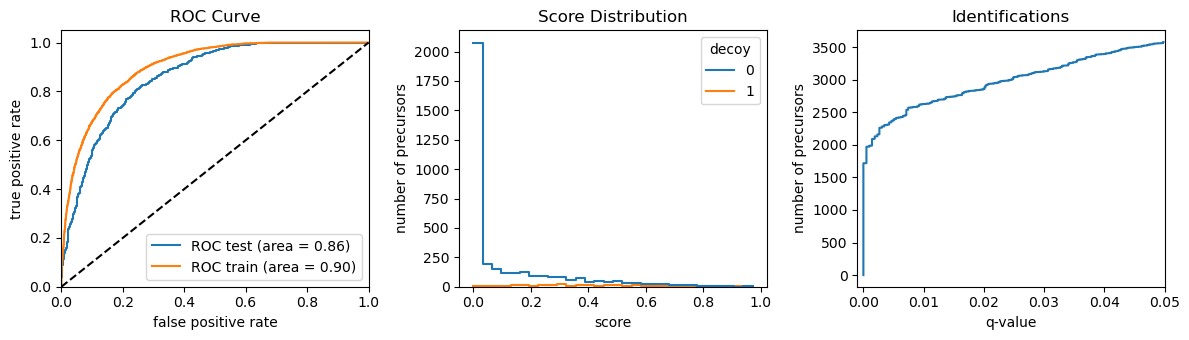

0:15:14.376658  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:15:14.377070  PROGRESS: Accumulated precursors: 3,899, 0.01 FDR: 2,629, 0.001 FDR: 1,973
0:15:14.378077  INFO: calibration group: precursor, fitting mz estimator 


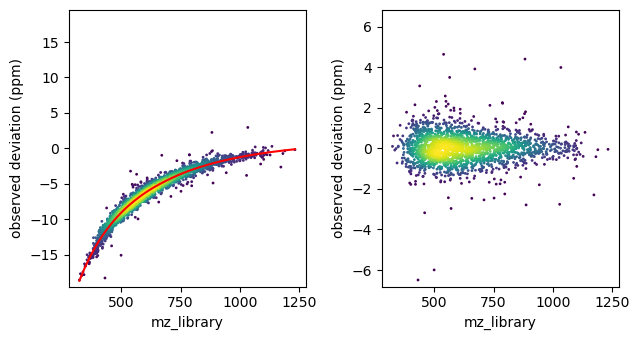

0:15:14.511326  INFO: calibration group: precursor, fitting rt estimator 


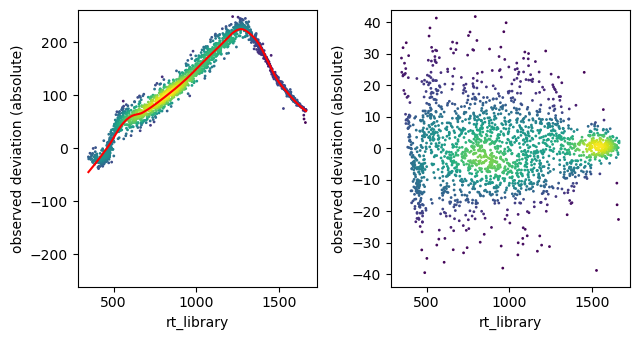

0:15:14.697856  INFO: calibration group: precursor, fitting mobility estimator 


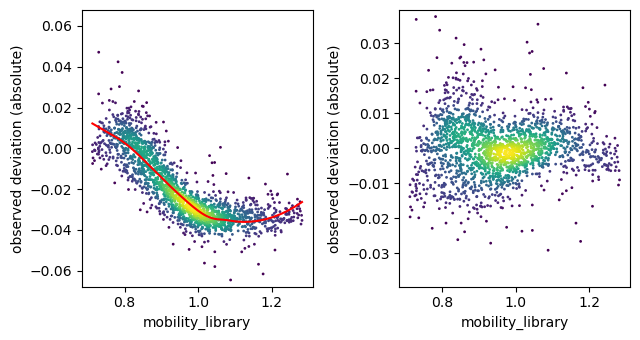

0:15:14.841119  INFO: calibration group: fragment, fitting mz estimator 


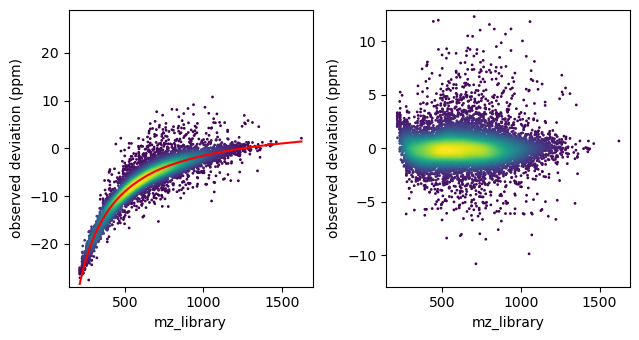

0:15:16.060156  INFO: calibration group: precursor, predicting mz
0:15:16.073813  INFO: calibration group: precursor, predicting rt
0:15:16.125782  INFO: calibration group: precursor, predicting mobility
0:15:16.146725  INFO: calibration group: fragment, predicting mz
0:15:16.461341  INFO: calibration group: precursor, predicting mz
0:15:16.472142  INFO: calibration group: precursor, predicting rt
0:15:16.498404  INFO: calibration group: precursor, predicting mobility
0:15:16.514229  INFO: calibration group: fragment, predicting mz


In [4]:
plan = Plan(raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.04,
                    'target_rt_tolerance': 40,
                    'target_ms1_tolerance': 10,
                    'min_epochs': 3,
                }
            }
        )
plan.from_spec_lib_base(test_lib)
for dia_data, precursors_flat, fragments_flat in plan.get_run_data():
    
    reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

    workflow = Workflow(
        plan.config, 
        dia_data, 
        reference_flat, 
        fragments_flat
    )

    workflow.calibration()


0:10:29.937423  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:10:29.957405  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:10:29.957848  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:10:29.958147  INFO: FWHM in RT is 4.06 seconds, sigma is 2.53
0:10:29.958634  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 6.23


91732


100%|██████████| 328090/328090 [00:32<00:00, 9992.51it/s] 
0:18:15.856002  INFO: Scored 328090 candidates
0:18:15.963042  INFO: 0.44% of targets failed, 0.68% of decoys failed


(326267, 25)
(326267,)


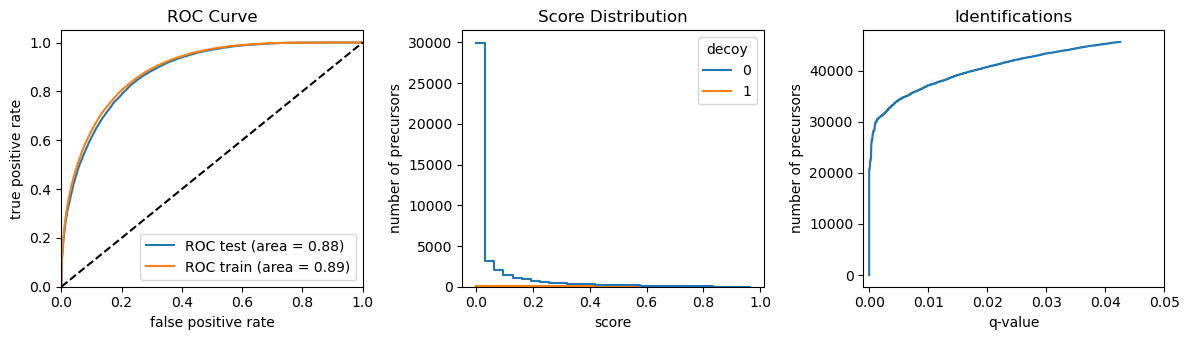

0:18:47.833863  PROGRESS: === extraction finished, 0.05 FDR: 43,733, 0.01 FDR: 36,747, 0.001 FDR: 29,504 ===


In [5]:
df_d0 = workflow.extraction()

In [8]:
precursors_flat[['mz_library','mz_calibrated']]

mz_library  mz_calibrated
0       402.242340     402.237007
1       410.221605     410.216340
2       445.260728     445.255755
3       476.766180     476.761463
4       476.766178     476.761460
...            ...            ...
91727  1129.089165    1129.088551
91728   939.208835     939.207257
91729   751.568523     751.565801
91730   932.201015     932.199398
91731   745.962267     745.959506

[91732 rows x 2 columns]

In [9]:
fragments_flat[['mz_library','mz_calibrated']]

mz_library  mz_calibrated
0         628.377686     628.373943
1         263.139008     263.133187
2         541.345642     541.341365
3         271.176453     271.170671
4         345.224487     345.219085
...              ...            ...
2909992  2087.022705    2087.027976
2909993  1985.974976    1985.979595
2909994  1928.953491    1928.957745
2909995  1829.885010    1829.888632
2909996  1714.858154    1714.861047

[2909997 rows x 2 columns]

In [77]:
workflow.calibration_manager.predict(precursors_flat, 'precursor')
workflow.calibration_manager.predict(fragments_flat, 'fragment')


4:59:02.943944  INFO: calibration group: precursor, predicting mz
4:59:02.966219  INFO: calibration group: precursor, predicting rt
4:59:03.024065  INFO: calibration group: precursor, predicting mobility
4:59:03.052504  INFO: calibration group: fragment, predicting mz


In [9]:
#df_d0.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_d0.tsv', index=False, sep='\t')


In [10]:
#precursors_flat.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_precursors_flat.tsv', index=False, sep='\t')
#fragments_flat.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_fragments_flat.tsv', index=False, sep='\t')

In [74]:
df_d0 = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_d0.tsv', sep='\t')
precursors_flat = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_precursors_flat.tsv', sep='\t')
fragments_flat = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_fragments_flat.tsv', sep='\t')

In [76]:
precursors_flat

elution_group_idx  precursor_idx  decoy  flat_frag_start_idx  \
0                       0              0      0                    0   
1                    3180              3      0              1204269   
2                    3180              2      0               622286   
3                    3180              1      0                40303   
4                   32481              4      0               995005   
...                   ...            ...    ...                  ...   
229328               5788         229325      1              2909814   
229329               5788         229328      0              1237721   
229330               5788         229329      0              1819704   
229331               5785         229331      0              1819646   
229332               5785         229332      1              2909846   

        flat_frag_stop_idx  charge  rt_library  mobility_library  mz_library  \
0                        6       2  881.258845          0.770291  402.242340   
1                  1204276       2  734.785154          0.780428  380.267066   
2                   622293       2  734.785154          0.780428  378.257434   
3                    40310       2  734.785154          0.780428  376.244882   
4                   995012       2  650.698147          0.847025  441.275133   
...                    ...     ...         ...               ...         ...   
229328             2909846       4  498.426790          1.120423  939.208835   
229329             1237753       4  498.426790          1.120423  936.223195   
229330             1819736       4  498.426790          1.120423  938.237296   
229331             1819665       5  499.320052          1.095016  750.791292   
229332             2909865       5  499.320052          1.095016  751.568523   

                                                 sequence  ...       i_1  \
0                                                 FSPVLGR  ...  0.285548   
1                                                 APGIIPR  ...  0.274394   
2                                                 APGIIPR  ...  0.274394   
3                                                 APGIIPR  ...  0.274394   
4                                                 LEADLEK  ...  0.284730   
...                                                   ...  ...       ...   
229328  ALSAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAASK  ...  0.260841   
229329  AASAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAATK  ...  0.260841   
229330  AASAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAATK  ...  0.260841   
229331  AASAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAATK  ...  0.260841   
229332  ALSAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAASK  ...  0.260841   

             i_2       i_3       i_4       i_5  nAA  \
0       0.074148  0.014007  0.002118  0.000000    7   
1       0.066189  0.011620  0.001632  0.000000    7   
2       0.066189  0.011620  0.001632  0.000000    7   
3       0.066189  0.011620  0.001632  0.000000    7   
4       0.080972  0.017144  0.002958  0.000000    7   
...          ...       ...       ...       ...  ...   
229328  0.256465  0.177225  0.096112  0.043393   49   
229329  0.256465  0.177225  0.096112  0.043393   49   
229330  0.256465  0.177225  0.096112  0.043393   49   
229331  0.256465  0.177225  0.096112  0.043393   49   
229332  0.256465  0.177225  0.096112  0.043393   49   

                                                 raw_name  mz_calibrated  \
0       20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...     402.236974   
1       20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...     380.261527   
2       20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...     378.251880   
3       20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...     376.239311   
4       20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...     441.270070   
...                                                   ...            ...   
229328  20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...     939.207270   


In [75]:
df_d0

precursor_idx  elution_group_idx  charge  rank  scan_start  scan_stop  \
0             227978              36328       4     0         350        391   
1             221844              12953       3     0         553        590   
2             223932              42379       3     0         401        472   
3             215195              42308       2     0         104        179   
4             228434               8231       4     0         366        405   
...              ...                ...     ...   ...         ...        ...   
43710         215142              39174       3     1         500        538   
43711         180597              25809       4     0         708        741   
43712          45895              11371       3     0         895        912   
43713         228002              28243       4     1         498        517   
43714          10253                644       2     0         729        748   

       scan_center  frame_start  frame_stop  frame_center  ...   rt_library  \
0              370         8194        8257          8224  ...   827.285867   
1              571         5845        5932          5887  ...   608.433631   
2              437        14332       14413         14371  ...  1508.473607   
3              141        10180       10255         10216  ...  1035.862283   
4              385        13825       13870         13846  ...  1360.950265   
...            ...          ...         ...           ...  ...          ...   
43710          521        11788       11827         11809  ...  1169.607031   
43711          731        12082       12163         12145  ...  1147.336032   
43712          903         2335        2356          2344  ...   260.334909   
43713          500        14365       14410         14386  ...  1474.816617   
43714          739         5692        5779          5734  ...   607.353346   

       rt_calibrated   rt_error  mobility_library  mobility_calibrated  \
0         927.992395   7.993689          1.089667             1.053493   
1         669.176164   1.008956          0.950775             0.927191   
2        1629.054462   6.051129          1.035596             1.000864   
3        1196.404217 -33.853680          1.231819             1.200048   
4        1566.537068   8.849895          1.081993             1.046058   
...              ...        ...               ...                  ...   
43710    1371.613265 -27.889999          0.991463             0.961308   
43711    1341.972113  39.963189          0.857546             0.850735   
43712     246.346449  20.883928          0.714786             0.725514   
43713    1612.256392  24.554766          0.964555             0.938640   
43714     667.974850 -15.192135          0.855681             0.849208   

       mobility_error  proteins  channel         proba      qval  
0            0.007283    Q8NC51        0  6.537099e-07  0.000000  
1            0.003628  Q01844-3        0  1.132043e-06  0.000000  
2            0.016593    P07437        0  1.409624e-06  0.000000  
3            0.008788  P68363-2        0  1.428332e-06  0.000000  
4            0.005020    O43169        0  1.563868e-06  0.000000  
...               ...       ...      ...           ...       ...  
43710        0.001839    Q8N3U4        0  9.188597e-01  0.042758  
43711       -0.023364    Q15738        0  9.233086e-01  0.042803  
43712       -0.009350    Q13144        0  9.318497e-01  0.042824  
43713        0.038084    O15067        0  9.321650e-01  0.042824  
43714       -0.027010    P60709        0  9.408060e-01  0.042846  

[43715 rows x 53 columns]

In [68]:
from alphadia.extraction import hybridselection, scoring, quadrupole

In [69]:
from alphadia.extraction import validate
class Multiplexer():

    def __init__(self,
        precursors_flat: pd.DataFrame,
        fragments_flat: pd.DataFrame,
        psm_df: pd.DataFrame,
        mz_column: str = 'mz_calibrated',
        ) -> None:

        self.precursors_flat = precursors_flat
        self.fragments_flat = fragments_flat
        self.psm_df = psm_df

        self.mz_column = mz_column

    def __call__(self):
        # make sure input psm's have all required columns
        self.psm_df = self.psm_df[self.psm_df['decoy'] == 0].copy()
        anchor_ids = self.psm_df[['elution_group_idx', 'scan_start' ,'scan_stop', 'scan_center', 'frame_start', 'frame_stop', 'frame_center','rank']]
        
        candidates_df = self.precursors_flat[(precursors_flat['decoy'] == 0)]
        candidates_df = candidates_df[candidates_df['elution_group_idx'].isin(anchor_ids['elution_group_idx'])]
        candidates_df = candidates_df[['precursor_idx', 'elution_group_idx', 'channel', 'decoy','flat_frag_start_idx','flat_frag_stop_idx','charge',self.mz_column]+utils.get_isotope_column_names(candidates_df.columns)]

        candidates_df = candidates_df.merge(anchor_ids, on='elution_group_idx', how='outer')
        candidates_df = candidates_df.sort_values('precursor_idx')
        validate.candidates(candidates_df)
        return candidates_df

In [78]:
sig_egs = df_d0[df_d0['qval'] <= 0.01]

In [79]:
sig_egs

precursor_idx  elution_group_idx  charge  rank  scan_start  scan_stop  \
0             227978              36328       4     0         350        391   
1             221844              12953       3     0         553        590   
2             223932              42379       3     0         401        472   
3             215195              42308       2     0         104        179   
4             228434               8231       4     0         366        405   
...              ...                ...     ...   ...         ...        ...   
36181         123142                201       4     0         824        857   
36182         183002              22297       2     2         304        363   
36183         119214               1866       3     1         724        759   
36184         225975              37804       4     0         423        476   
36185         111536              40250       3     0         771        810   

       scan_center  frame_start  frame_stop  frame_center  ...   rt_library  \
0              370         8194        8257          8224  ...   827.285867   
1              571         5845        5932          5887  ...   608.433631   
2              437        14332       14413         14371  ...  1508.473607   
3              141        10180       10255         10216  ...  1035.862283   
4              385        13825       13870         13846  ...  1360.950265   
...            ...          ...         ...           ...  ...          ...   
36181          840         8377        8464          8419  ...   834.482948   
36182          333         7843        7900          7870  ...   794.813165   
36183          741        10945       11032         10987  ...  1068.033157   
36184          449        10678       10765         10720  ...  1080.278734   
36185          787         6589        6691          6646  ...   679.107784   

       rt_calibrated   rt_error  mobility_library  mobility_calibrated  \
0         927.992395   7.993689          1.089667             1.053493   
1         669.176164   1.008956          0.950775             0.927191   
2        1629.054462   6.051129          1.035596             1.000864   
3        1196.404217 -33.853680          1.231819             1.200048   
4        1566.537068   8.849895          1.081993             1.046058   
...              ...        ...               ...                  ...   
36181     937.094553  21.070792          0.741488             0.749770   
36182     887.378554   8.345751          1.113332             1.076731   
36183    1238.604914  11.633001          0.821654             0.821022   
36184    1254.612457 -34.740753          1.041968             1.006976   
36185     747.548072   8.966943          0.807363             0.808868   

       mobility_error  proteins  channel         proba      qval  
0            0.007283    Q8NC51        0  6.537099e-07  0.000000  
1            0.003628  Q01844-3        0  1.132043e-06  0.000000  
2            0.016593    P07437        0  1.409624e-06  0.000000  
3            0.008788  P68363-2        0  1.428332e-06  0.000000  
4            0.005020    O43169        0  1.563868e-06  0.000000  
...               ...       ...      ...           ...       ...  
36181        0.007126  Q9UG63-2        0  1.420080e-01  0.009976  
36182        0.007967  O00255-2        0  1.420576e-01  0.009976  
36183       -0.000117  Q9Y4X0-3        0  1.420651e-01  0.009976  
36184        0.002722    Q2TAY7        0  1.420800e-01  0.009976  
36185       -0.017704  Q13428-3        0  1.421233e-01  0.009976  

[36186 rows x 53 columns]

In [71]:
precursors_flat[precursors_flat['elution_group_idx'] == 30647][['elution_group_idx','precursor_idx','decoy','channel','sequence','charge']]

elution_group_idx  precursor_idx  decoy  channel  sequence  charge
21720              30647          21720      0        8  MYEEFLSK       2
21721              30647          21721      0        4  MYEEFLSK       2
21722              30647          21722      0        0  MYEEFLSK       2
21723              30647          21723      0       12  MYEEFLSK       2
21724              30647          21724      1        0  MSEEFLTK       2

In [72]:
precursors_sample = precursors_flat[precursors_flat['elution_group_idx'].isin(sig_egs)].copy()

In [73]:
precursors_sample

Empty DataFrame
Columns: [elution_group_idx, precursor_idx, decoy, flat_frag_start_idx, flat_frag_stop_idx, charge, rt_library, mobility_library, mz_library, sequence, genes, proteins, channel, i_0, i_1, i_2, i_3, i_4, i_5, nAA, raw_name, mz_calibrated, rt_calibrated, mobility_calibrated]
Index: []

[0 rows x 24 columns]

In [15]:
config = hybridselection.HybridCandidateConfig()
config.update(workflow.config['extraction']['HybridCandidateConfig'])
config.update({
    'rt_tolerance': 40,
    'mobility_tolerance': 0.04,
    'precursor_mz_tolerance': 10,
    'fragment_mz_tolerance': 15,
    'sigma_scale_mobility': 2.,
    'sigma_scale_rt': 0.3,
    'candidate_count': 2,
    'center_fraction': 0.5,
    'max_cardinality':10,
})

extraction = hybridselection.HybridCandidateSelection(
    dia_data,
    precursors_flat,
    fragments_flat,
    config.jitclass(),
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    fwhm_rt = 5.,
    fwhm_mobility = 0.01,
    thread_count=10,
    debug=False
)
candidates_df = extraction()

0:20:36.201096  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:20:36.202166  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:20:36.203059  INFO: FWHM in RT is 5.00 seconds, sigma is 1.87
0:20:36.203791  INFO: FWHM in mobility is 0.010 1/K_0, sigma is 13.14


91732


100%|██████████| 91732/91732 [03:32<00:00, 430.73it/s]


In [16]:
candidates_df

elution_group_idx  score_group_idx  precursor_idx  rank     score  \
0                      0                0              0     0  4.080282   
1                      0                0              0     1  2.792472   
15394               4449             8898              1     0  5.838447   
15395               4449             8898              1     1  3.544432   
35106              10096            20192              2     1  4.468409   
...                  ...              ...            ...   ...       ...   
20057               5785            11570          91729     1  3.036490   
20070               5788            11577          91730     1  3.253911   
20069               5788            11577          91730     0  3.728797   
20059               5785            11571          91731     1  4.455366   
20058               5785            11571          91731     0  5.006064   

       precursor_mz  decoy  channel  scan_center  scan_start  ...  \
0        402.237000      0        0          817         795  ...   
1        402.237000      0        0          753         748  ...   
15394    380.246857      0        0          810         795  ...   
15395    380.246857      0        0          798         782  ...   
35106    417.244110      0        0          775         757  ...   
...             ...    ...      ...          ...         ...  ...   
20057    746.160217      0        0          384         371  ...   
20070    939.458130      1        0          289         280  ...   
20069    939.458130      1        0          276         272  ...   
20059    751.766479      1        0          385         358  ...   
20058    751.766479      1        0          383         369  ...   

       mobility_calibrated  flat_frag_start_idx  flat_frag_stop_idx  charge  \
0                 0.776441                    0                   6       2   
1                 0.776441                    0                   6       2   
15394             0.775668                56489               56495       2   
15395             0.775668                56489               56495       2   
35106             0.810549               127362              127367       2   
...                    ...                  ...                 ...     ...   
20057             1.059300                73697               73716       5   
20070             1.084339              2909814             2909846       4   
20069             1.084339              2909814             2909846       4   
20059             1.059300              2909846             2909865       5   
20058             1.059300              2909846             2909865       5   

            i_0       i_1       i_2       i_3       i_4       i_5  
0      0.624179  0.285548  0.074148  0.014007  0.002118  0.000000  
1      0.624179  0.285548  0.074148  0.014007  0.002118  0.000000  
15394  0.647466  0.271007  0.067331  0.012361  0.001835  0.000000  
15395  0.647466  0.271007  0.067331  0.012361  0.001835  0.000000  
35106  0.604334  0.268816  0.096670  0.025063  0.005116  0.000000  
...         ...       ...       ...       ...       ...       ...  
20057  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393  
20070  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393  
20069  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393  
20059  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393  
20058  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393  

[159419 rows x 29 columns]

In [17]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates_df,
    q,
    precursor_mz_tolerance=10,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=False
)
psm_old, fragments = scoring_workflow() 

100%|██████████| 159419/159419 [00:15<00:00, 10195.73it/s]
0:26:27.392294  INFO: Scored 159419 candidates
0:26:27.436586  INFO: 0.48% of targets failed, 0.69% of decoys failed


(158494, 25)
(158494,)


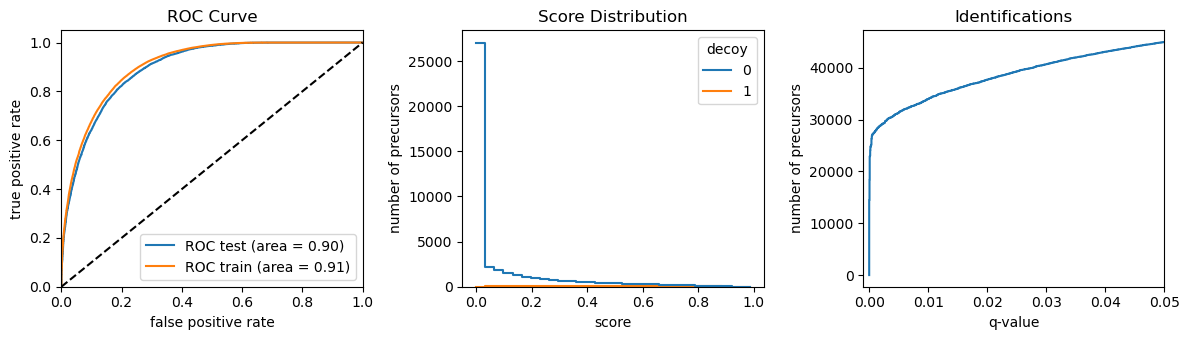

precursor_idx  elution_group_idx  charge  rank  scan_start  scan_stop  \
150994          87082               3645       2     0         191        256   
157042          90736              13824       3     0         305        372   
136002          78245              44450       2     0         199        236   
157792          91231              36328       4     0         350        391   
158455          91705               4655       4     0          55        106   
...               ...                ...     ...   ...         ...        ...   
158202          91524              37549       4     1         409        428   
155143          89569              11004       3     1         426        440   
142235          81891              24065       3     1         496        524   
126552          72700              31240       4     1         770        787   
18820           10755              36794       2     0         646        669   

        scan_center  frame_start  frame_stop  frame_center  ...   rt_library  \
150994          223         5053        5128          5089  ...   551.880913   
157042          334        14596       14629         14611  ...  1566.384737   
136002          217         9187        9274          9229  ...   935.004788   
157792          370         8194        8257          8224  ...   827.285867   
158455           80        10921       11002         10960  ...  1084.567669   
...             ...          ...         ...           ...  ...          ...   
158202          411        11902       11929         11914  ...  1170.910306   
155143          428        10228       10255         10240  ...  1009.907796   
142235          507        14311       14350         14329  ...  1422.305719   
126552          778         1624        1645          1633  ...   250.654764   
18820           657         6244        6313          6277  ...   625.780974   

        rt_calibrated   rt_error  mobility_library  mobility_calibrated  \
150994     596.928637 -17.498888          1.185024             1.150336   
157042    1665.316608  -2.915973          1.099026             1.063218   
136002    1064.503985 -14.212725          1.191137             1.156755   
157792     928.309644   7.676440          1.089667             1.054094   
158455    1260.451681 -13.283957          1.267206             1.239125   
...               ...        ...               ...                  ...   
158202    1373.226448 -17.560798          1.029744             0.995952   
155143    1162.451317   2.828346          1.017891             0.985130   
142235    1592.683894  37.645940          0.964780             0.939362   
126552     171.951624  14.415976          0.799976             0.802623   
18820      688.569135  25.976398          0.903681             0.888635   

        mobility_error  proteins  channel     proba      qval  
150994        0.005483    P80723        0  0.000003  0.000000  
157042        0.020834  P21333-2        0  0.000003  0.000000  
136002        0.002944    O75436        0  0.000003  0.000000  
157792        0.006682    Q8NC51        0  0.000004  0.000000  
158455        0.009151    Q14444        0  0.000004  0.000000  
...                ...       ...      ...       ...       ...  
158202        0.038316  Q969G3-2        0  0.957143  0.054695  
155143        0.038146  P29692-2        0  0.967197  0.054695  
142235        0.032837  Q9NZM1-6        0  0.973016  0.054695  
126552       -0.005640  Q9Y520-4        0  0.984804  0.054718  
18820        -0.013419    Q9H9B4        0  0.985311  0.054742  

[45568 rows x 53 columns]

In [18]:
scoring.fdr_correction(psm_old)

In [353]:
do_sig = df_d0[df_d0['qval'] <= 0.01]

In [354]:
do_sig

precursor_idx  elution_group_idx  charge  rank  scan_start  scan_stop  \
52748           90588               7434       3     0         391        428   
290325          86974              40803       3     0         500        535   
258489          91231              36328       4     0         350        391   
301550          89777              42379       3     0         403        472   
220095          88334              30961       3     0         440        475   
...               ...                ...     ...   ...         ...        ...   
295361          72375              41512       2     0         295        334   
20239           88957               2871       3     0         204        272   
141493          38222              19911       2     1         570        619   
140807          75929              19815       3     1         555        592   
1944            49699                277       2     0         392        431   

        scan_center  frame_start  frame_stop  frame_center  ...   rt_library  \
52748           409        14254       14317         14284  ...  1510.300654   
290325          517         8710        8779          8743  ...   876.482625   
258489          370         8194        8257          8224  ...   827.285867   
301550          437        14332       14413         14371  ...  1508.473607   
220095          457        13510       13561         13534  ...  1334.126176   
...             ...          ...         ...           ...  ...          ...   
295361          314        10834       10921         10876  ...  1070.725090   
20239           233        14644       14680         14662  ...  1600.301539   
141493          597         7288        7375          7333  ...   755.760100   
140807          573         6292        6379          6334  ...   634.194618   
1944            411         9157        9181          9169  ...   886.011092   

        rt_calibrated   rt_error  mobility_library  mobility_calibrated  \
52748     1629.822141  -4.612180          1.060460             1.025421   
290325     990.809918   4.212970          0.992449             0.962585   
258489     928.330851   7.655233          1.089667             1.054039   
301550    1628.722330   6.383261          1.035596             1.001143   
220095    1549.165649  -9.261108          1.033117             0.998804   
...               ...        ...               ...                  ...   
295361    1241.978924  -4.365764          1.131846             1.095646   
20239     1687.633351 -19.432423          1.167705             1.132136   
141493     839.156438  -4.506658          0.931331             0.911591   
140807     698.721204  22.306750          0.929109             0.909759   
1944      1002.907292  40.561458          1.066755             1.031674   

        mobility_error  proteins  channel         proba      qval  
52748         0.010139  P31327-3        0  1.603897e-08  0.000000  
290325        0.003148  P29401-2        0  4.361914e-08  0.000000  
258489        0.006736    Q8NC51        0  4.888490e-08  0.000000  
301550        0.016314    P07437        0  5.062141e-08  0.000000  
220095        0.005722    Q9UMS4        0  5.573355e-08  0.000000  
...                ...       ...      ...           ...       ...  
295361        0.001337  O43399-5        0  1.427158e-01  0.009957  
20239         0.017217  P08243-2        0  1.427316e-01  0.009957  
141493        0.002418    Q8N9T8        0  1.427397e-01  0.009957  
140807        0.019767    P50748        0  1.427651e-01  0.009957  
1944          0.002593  Q12979-2        0  1.428235e-01  0.009957  

[36455 rows x 53 columns]

In [19]:
from alphadia.extraction import utils

In [80]:
multiplex = Multiplexer(precursors_flat, fragments_flat, sig_egs.copy())
candidates_df = multiplex()


In [81]:
candidates_df = utils.calculate_score_groups(candidates_df, True).copy()

In [82]:
candidates_df

precursor_idx  elution_group_idx  channel  decoy  flat_frag_start_idx  \
0                   0                  0        0      0                    0   
1               13052                  0       12      0              1745949   
2               13053                  0        4      0               581983   
3               13059                  0        8      0              1163966   
4              122622                  1       12      0              1745955   
...               ...                ...      ...    ...                  ...   
144739         212905              45864        0      0               581933   
144740         192016              45865        4      0              1163938   
144741         192029              45865        8      0              1745921   
144742         192015              45865        0      0               581955   
144743         192030              45865       12      0              2327904   

        flat_frag_stop_idx  charge  mz_calibrated       i_0       i_1  ...  \
0                        6       2     402.237007  0.624179  0.285548  ...   
1                  1745955       2     408.273344  0.624179  0.285548  ...   
2                   581989       2     404.249576  0.624179  0.285548  ...   
3                  1163972       2     406.259225  0.624179  0.285548  ...   
4                  1745970       3     489.013179  0.425945  0.352398  ...   
...                    ...     ...            ...       ...       ...  ...   
144739              581955       3     880.417600  0.220170  0.298107  ...   
144740             1163951       2     892.505808  0.353573  0.352783  ...   
144741             1745934       2     896.525095  0.353573  0.352783  ...   
144742              581968       2     888.480682  0.353573  0.352783  ...   
144743             2327917       2     900.553321  0.353573  0.352783  ...   

             i_4       i_5  scan_start  scan_stop  scan_center  frame_start  \
0       0.002118  0.000000         795        840          817         8704   
1       0.002118  0.000000         795        840          817         8704   
2       0.002118  0.000000         795        840          817         8704   
3       0.002118  0.000000         795        840          817         8704   
4       0.012347  0.002565         702        790          763        13129   
...          ...       ...         ...        ...          ...          ...   
144739  0.066017  0.026431         354        375          364        14608   
144740  0.022337  0.005686         273        322          297        11668   
144741  0.022337  0.005686         273        322          297        11668   
144742  0.022337  0.005686         273        322          297        11668   
144743  0.022337  0.005686         273        322          297        11668   

        frame_stop  frame_center  rank  score_group_idx  
0             8773          8737     0                0  
1             8773          8737     0                0  
2             8773          8737     0                0  
3             8773          8737     0                0  
4            13222         13162     0                1  
...            ...           ...   ...              ...  
144739       14629         14617     3            36184  
144740       11701         11683     1            36185  
144741       11701         11683     1            36185  
144742       11701         11683     1            36185  
144743       11701         11683     1            36185  

[144744 rows x 22 columns]

In [83]:
import numba as nb
import alphatims
from alphadia.extraction import plotting
import numba as nb
from tqdm import tqdm
from matplotlib import patches

In [84]:
def assemble_fragments(fragments_flat, fragment_mz_column='mz_calibrated'):
            
    # set cardinality to 1 if not present
    if 'cardinality' in fragments_flat.columns:
        pass
    
    else:
        logging.warning('Fragment cardinality column not found in fragment dataframe. Setting cardinality to 1.')
        fragments_flat['cardinality'] = np.ones(len(fragments_flat), dtype=np.uint8)
    
    # validate dataframe schema and prepare jitclass compatible dtypes
    validate.fragments_flat(fragments_flat)

    return fragments.FragmentContainer(
        fragments_flat['mz_library'].values,
        fragments_flat[fragment_mz_column].values,
        fragments_flat['intensity'].values,
        fragments_flat['type'].values,
        fragments_flat['loss_type'].values,
        fragments_flat['charge'].values,
        fragments_flat['number'].values,
        fragments_flat['position'].values,
        fragments_flat['cardinality'].values
    )

In [85]:
from alphadia.extraction.numba import fragments
from alphadia.extraction import features

In [86]:
from alphadia.extraction.numba import config

@nb.experimental.jitclass()
class CandidateConfigJIT:
     
    score_grouped: nb.boolean
    max_cardinality: nb.uint8
    top_k_fragments: nb.uint32
    top_k_isotopes: nb.uint32
    reference_channel: nb.int16
    
    precursor_mz_tolerance: nb.float32
    fragment_mz_tolerance: nb.float32


    def __init__(self,
            score_grouped: nb.boolean,
            max_cardinality: nb.uint8,
            top_k_fragments: nb.uint32,
            top_k_isotopes: nb.uint32,
            reference_channel: nb.int16,

            precursor_mz_tolerance: nb.float32,
            fragment_mz_tolerance: nb.float32
        ) -> None:

        self.score_grouped = score_grouped
        self.max_cardinality = max_cardinality
        self.top_k_fragments = top_k_fragments
        self.top_k_isotopes = top_k_isotopes
        self.reference_channel = reference_channel

        self.precursor_mz_tolerance = precursor_mz_tolerance
        self.fragment_mz_tolerance = fragment_mz_tolerance

candidate_config_type = CandidateConfigJIT.class_type.instance_type

class CandidateConfig(config.JITConfig):

    jit_container = CandidateConfigJIT

    def __init__(self):
        self.score_grouped = True
        self.max_cardinality = 10
        self.top_k_fragments = 16
        self.top_k_isotopes = 4
        self.reference_channel = 0

        self.precursor_mz_tolerance = 10
        self.fragment_mz_tolerance = 15
    
    def validate(self):
        assert self.max_cardinality > 0, 'max_cardinality must be greater than 0'
        assert self.top_k_fragments > 0, 'top_k_fragments must be greater than 0'
        assert self.top_k_isotopes > 0, 'top_k_isotopes must be greater than 0'
        assert self.reference_channel >= -1, 'reference_channel must be greater than or equal to -1'
        assert not (self.score_grouped == True and self.reference_channel == -1), 'for grouped scoring, reference_channel must be set to a valid channel'

        assert self.precursor_mz_tolerance >= 0, 'precursor_mz_tolerance must be greater than or equal to 0'
        assert self.precursor_mz_tolerance < 200, 'precursor_mz_tolerance must be less than 200'
        assert self.fragment_mz_tolerance >= 0, 'fragment_mz_tolerance must be greater than or equal to 0'
        assert self.fragment_mz_tolerance < 200, 'fragment_mz_tolerance must be less than 200'

@nb.experimental.jitclass()
class Candidate:

    """
    __init__ will be called single threaded, initialize will later be called multithreaded.
    Therefore as much as possible should be done in initialize.

    """
    failed: nb.boolean

    # input columns
    precursor_idx: nb.uint32
    channel: nb.uint8

    frag_start_idx: nb.uint32
    frag_stop_idx: nb.uint32

    scan_start: nb.int64
    scan_stop: nb.int64
    scan_center: nb.int64
    frame_start: nb.int64
    frame_stop: nb.int64
    frame_center: nb.int64

    charge: nb.uint8
    precursor_mz: nb.float32
    isotope_intensity: nb.float32[::1]
    
    #calculated properties
    isotope_mz: nb.float32[::1]
    
    # object properties
    fragments: fragments.FragmentContainer.class_type.instance_type
    features: nb.types.DictType(nb.types.unicode_type, nb.float32)
    fragment_feature_dict: nb.types.DictType(nb.types.unicode_type, nb.float32[:])

    dense_fragments : nb.float32[:, :, :, :, ::1]
    dense_precursors : nb.float32[:, :, :, :, ::1]

    fragments_frame_profile : nb.float32[:, :, ::1]
    fragments_scan_profile : nb.float32[:, :, ::1]

    template_frame_profile : nb.float32[:, ::1]
    template_scan_profile : nb.float32[:, ::1]

    observation_importance : nb.float32[::1]
    template : nb.float32[:, :, ::1]

    def __init__(
            self,
            precursor_idx: nb.uint32,
            channel: nb.uint8,

            frag_start_idx: nb.uint32,
            frag_stop_idx: nb.uint32,

            scan_start: nb.int64,
            scan_stop: nb.int64,
            scan_center: nb.int64,
            frame_start: nb.int64,
            frame_stop: nb.int64,
            frame_center: nb.int64,

            charge: nb.uint8,
            precursor_mz: nb.float32,
            isotope_intensity: nb.float32[::1]
        ) -> None:

        self.precursor_idx = precursor_idx
        self.channel = channel

        self.frag_start_idx = frag_start_idx
        self.frag_stop_idx = frag_stop_idx

        self.scan_start = scan_start
        self.scan_stop = scan_stop
        self.scan_center = scan_center
        self.frame_start = frame_start
        self.frame_stop = frame_stop
        self.frame_center = frame_center

        self.charge = charge
        self.precursor_mz = precursor_mz
        self.isotope_intensity = isotope_intensity

        self.failed = False

    def __str__(self):
        string = 'Candidate Object ('
        string += 'precursor_idx: ' + str(self.precursor_idx)
        string += ', channel: ' + str(self.channel) + ')'
        return string        
    
    def initialize(
            self,
            fragment_container,
            config
        ):
        
        self.features = nb.typed.Dict.empty(
            key_type=nb.types.unicode_type,
            value_type=nb.types.float32,
        )

        self.fragments = fragment_container.slice(np.array([[self.frag_start_idx, self.frag_stop_idx, 1]]))
        self.fragments.filter_by_cardinality(config.max_cardinality)
        self.fragments.filter_top_k(config.top_k_fragments)
        self.fragments.sort_by_mz()

        self.assemble_isotope_mz()

    def assemble_isotope_mz(self):
        """
        Assemble the isotope m/z values from the precursor m/z and the isotope
        offsets.
        """
        offset = np.arange(self.isotope_intensity.shape[0]) * 1.0033548350700006 / self.charge
        self.isotope_mz = offset.astype(nb.float32) + self.precursor_mz

    def build_profiles(
        self,
        dense_fragments,
        template
    ):
        
        # (n_fragments, n_observations, n_frames)
        self.fragments_frame_profile = features.or_envelope_2d(features.frame_profile_2d(dense_fragments[0]))
        
        # (n_observations, n_frames)
        self.template_frame_profile = features.or_envelope_1d(features.frame_profile_1d(template))

        # (n_fragments, n_observations, n_scans)
        self.fragments_scan_profile = features.or_envelope_2d(features.scan_profile_2d(dense_fragments[0]))

        # (n_observations, n_scans)
        self.template_scan_profile = features.or_envelope_1d(features.scan_profile_1d(template))
    

    def process(
        self,
        jit_data,
        config,
        quadrupole_calibration,
        debug
    ) -> None:
        
        frame_limit = np.array(
            [[
                self.frame_start,
                self.frame_stop,
                1
            ]], dtype=np.uint64
        )

        scan_limit = np.array(
            [[
                self.scan_start,
                self.scan_stop,
                1
            ]],dtype=np.uint64
        )

        quadrupole_limit = np.array(
            [[
                np.min(self.isotope_mz)-0.5,
                np.max(self.isotope_mz)+0.5
            ]], dtype=np.float32
        )

        if debug:
            self.visualize_window(
                quadrupole_calibration.cycle_calibrated,
                self.scan_start, self.scan_stop,
                quadrupole_limit[0,0], quadrupole_limit[0,1]
                )
            
        dense_fragments, frag_precursor_index = jit_data.get_dense(
            frame_limit,
            scan_limit,
            self.fragments.mz,
            config.fragment_mz_tolerance,
            quadrupole_limit,
            absolute_masses = True
        )

        self.dense_fragments = dense_fragments

        # check if an empty array is returned
        # scan and quadrupole limits of the fragments candidate are outside the acquisition range
        if dense_fragments.shape[-1] == 0:
            self.failed = True
            return
        
        # only one fragment is found
        if dense_fragments.shape[1] <= 1:
            self.failed = True
            return

        dense_precursors, prec_precursor_index = jit_data.get_dense(
            frame_limit,
            scan_limit,
            self.isotope_mz,
            config.precursor_mz_tolerance,
            np.array([[-1.,-1.]]),
            absolute_masses = True
        )

        self.dense_precursors = dense_precursors

        if debug:
            #self.visualize_precursor(dense_precursors)
            self.visualize_fragments(dense_fragments, self.fragments)

        # (n_isotopes, n_observations, n_scans)
        qtf = quadrupole.quadrupole_transfer_function_single(
            quadrupole_calibration,
            frag_precursor_index,
            np.arange(int(self.scan_start), int(self.scan_stop)),
            self.isotope_mz
        )

        # (n_observation, n_scans, n_frames)
        template = quadrupole.calculate_template_single(
            qtf,
            dense_precursors,
            self.isotope_intensity
        )

        if debug:
            self.visualize_template(
                dense_precursors,
                qtf,
                template,
                self.isotope_intensity
            )

        observation_importance = quadrupole.calculate_observation_importance_single(
            template,
        )
        
        self.observation_importance = observation_importance
        self.template = template

        self.build_profiles(
            dense_fragments,
            template
        )

        if dense_fragments.shape[0] == 0:
            self.failed = True
            return
        
        if dense_precursors.shape[0] == 0:
            self.failed = True
            return

        if debug:
            self.visualize_profiles(
                template,
                self.fragments_scan_profile,
                self.fragments_frame_profile,
                self.template_frame_profile,
                self.template_scan_profile,
            )
        
        
        self.features.update(
            features.location_features(
                jit_data,
                self.scan_start,
                self.scan_stop,
                self.scan_center,
                self.frame_start,
                self.frame_stop,
                self.frame_center,
            )
        )
        
        self.features.update(
            features.precursor_features(
                self.isotope_mz, 
                self.isotope_intensity, 
                dense_precursors, 
                observation_importance,
                template
            )
        )
        
        feature_dict, self.fragment_feature_dict = features.fragment_features(
                dense_fragments,
                observation_importance,
                template,
                self.fragments
            )

        self.features.update(
            feature_dict
        )
        
        
        self.features.update(
            features.profile_features(
                jit_data,
                self.fragments.intensity,
                self.fragments.type,
                observation_importance,
                self.fragments_scan_profile,
                self.fragments_frame_profile,
                self.template_scan_profile,
                self.template_frame_profile,
                self.scan_start,
                self.scan_stop,
                self.frame_start,
                self.frame_stop,
            )
        )
        
        
    def process_reference_channel(
        self,
        reference_candidate
        ):
        
        self.features.update(
            features.reference_features(
                reference_candidate.observation_importance,
                reference_candidate.fragments_scan_profile,
                reference_candidate.fragments_frame_profile,
                reference_candidate.template_scan_profile,
                reference_candidate.template_frame_profile,
                self.observation_importance,
                self.fragments_scan_profile,
                self.fragments_frame_profile,
                self.template_scan_profile,
                self.template_frame_profile,
                self.fragments.intensity,
            )
        )

    def visualize_window(
            self,
            *args
        ):
        with nb.objmode:
            plotting.plot_dia_window(
                *args
            )

    def visualize_precursor(
            self,
            *args
        ):

        with nb.objmode:
            plotting.plot_precursor(
                *args
            )

    def visualize_fragments(
            self,
            *args
        ):
        with nb.objmode:
            plotting.plot_fragments(
                *args
            )

    def visualize_template(
        self,
        *args
    ):
        with nb.objmode:
            plotting.plot_template(
                *args
            )

    def visualize_profiles(
        self,
        *args
    ):
        with nb.objmode:
            plotting.plot_fragment_profile(
                *args
            )


candidate_type = Candidate.class_type.instance_type

@nb.experimental.jitclass()
class ScoreGroup:
    elution_group_idx: nb.uint32
    score_group_idx: nb.uint32

    candidates: nb.types.ListType(candidate_type)

    def __init__(self,
            elution_group_idx: nb.uint32,
            score_group_idx: nb.uint32
        ) -> None:

        self.elution_group_idx = elution_group_idx
        self.score_group_idx = score_group_idx

        self.candidates = nb.typed.List.empty_list(candidate_type)

    def __getitem__(self, idx):
            return self.candidates[idx]

    def __len__(self):
        return len(self.candidates)
    
    def process(
        self,
        fragment_container,
        jit_data,
        config,
        quadrupole_calibration,
        debug
    ) -> None:
        
        # get refrerence channel index
        if config.reference_channel >= 0:

            reference_channel_idx = -1
            for idx, candidate in enumerate(self.candidates):
                if candidate.channel == config.reference_channel:
                    reference_channel_idx = idx
                    break
            
            # return if reference channel not found
            if reference_channel_idx == -1:
                print('reference channel not found', self.elution_group_idx, self.score_group_idx)
                return

        # process candidates
        for candidate in self.candidates:
            candidate.initialize(
                fragment_container,
                config
            )
            candidate.process(
                jit_data,
                config,
                quadrupole_calibration,
                debug
            )

        # process reference channel features
        if config.reference_channel >= 0:
        
            for idx, candidate in enumerate(self.candidates):
                if idx == reference_channel_idx:
                    continue
                candidate.process_reference_channel(
                    self.candidates[reference_channel_idx]
                )

                # update rank features

                candidate.features.update(
                    features.rank_features(idx, self.candidates)
                )
    
score_group_type = ScoreGroup.class_type.instance_type

@nb.experimental.jitclass()
class ScoreGroupContainer:
        
        """
        Container for managing the scoring of precursors with defined boundaries.

        The `ScoreGroupContainer` contains all precursors that are to be scored.
        It consists of a list of `ScoreGroup` objects, which in turn contain a list of `Candidate` objects.

        For single channel experiments, each `ScoreGroup` contains a single `Candidate` object.
        For multi channel experiments, each `ScoreGroup` contains a `Candidate` object for each channel, including decoy channels.

        Structure:
        ```
        ScoreGroupContainer
            ScoreGroup
                Candidate
                Candidate
                Candidate
                Candidate
            ScoreGroup
                Candidate
                Candidate
                Candidate
                Candidate
        ```

        The `ScoreGroupContainer` is initialized by passing the validated columns of a candidate dataframe to the `build_from_df` method.

        
        Attributes
        ----------

        score_groups : nb.types.ListType(score_group_type)
            List of score groups.

        """
    
        score_groups: nb.types.ListType(score_group_type)
    
        def __init__(
                self,
            ) -> None:

            """
            Initialize the `ScoreGroupContainer` object without any score groups.
            """

            self.score_groups = nb.typed.List.empty_list(score_group_type)

        def __getitem__(self, idx):
            """
            Get a score group by index.
            """

            return self.score_groups[idx]

        def __len__(self):
            """
            Get the number of score groups.
            """
            return len(self.score_groups)
        
        def build_from_df(
            self,
            elution_group_idx : nb.uint32,
            score_group_idx : nb.uint32,
            precursor_idx : nb.uint32,
            channel : nb.uint8,
            flat_frag_start_idx : nb.uint32,
            flat_frag_stop_idx : nb.uint32,

            scan_start : nb.uint32,
            scan_stop : nb.uint32,
            scan_center : nb.uint32,
            frame_start : nb.uint32,
            frame_stop : nb.uint32,
            frame_center : nb.uint32,

            precursor_charge : nb.uint8,
            precursor_mz : nb.float32,
            precursor_isotopes : nb.float32[:,::1]
        ):
            
            """
            Build the `ScoreGroupContainer` from a candidate dataframe.
            All relevant columns of the candidate dataframe are passed to this method as numpy arrays.

            Note
            ----

            All columns of the candidate_df need to be validated for the correct type using the `extraction.validate.candidates` schema.
            columns musst be sorted by `score_group_idx` in ascending order.

            Parameters
            ----------

            """
            idx = 0
            current_score_group_idx = -1

            # iterate over all candidates
            # whenever a new score group is encountered, create a new score group
            for idx in range(len(score_group_idx)):

                if score_group_idx[idx] != current_score_group_idx:

                    self.score_groups.append(ScoreGroup(
                        elution_group_idx[idx],
                        score_group_idx[idx]
                    ))

                    # update current score group
                    current_score_group_idx = score_group_idx[idx]

                if len(precursor_isotopes[idx]) == 0:
                    raise ValueError('precursor isotopes empty')

                self.score_groups[-1].candidates.append(Candidate(
                    precursor_idx[idx],
                    channel[idx],
                    flat_frag_start_idx[idx],
                    flat_frag_stop_idx[idx],

                    scan_start[idx],
                    scan_stop[idx],
                    scan_center[idx],
                    frame_start[idx],
                    frame_stop[idx],
                    frame_center[idx],

                    precursor_charge[idx],
                    precursor_mz[idx],
                    precursor_isotopes[idx].copy()
                ))

                idx += 1

        def collect_to_df(
            self,
        ):
            for score_group in self.score_groups:
                for candidate in score_group.candidates:
                    yield score_group.elution_group_idx, score_group.score_group_idx, candidate.precursor_idx, candidate.channel

        
        
@alphatims.utils.pjit()
def _executor(
        i,
        sg_container,
        fragment_container,
        
        jit_data,
        config,
        quadrupole_calibration,
        debug
    ):
    """
    Helper function.
    Is decorated with alphatims.utils.pjit to enable parallel execution of HybridElutionGroup.process.
    """

    sg_container[i].process(
        fragment_container,
        jit_data,
        config,
        quadrupole_calibration,
        debug
    )

import alphatims.utils

In [87]:
from alphadia.extraction import validate, utils, calibration

In [88]:
validate.candidates(candidates_df)

In [89]:
candidates_df

precursor_idx  elution_group_idx  channel  decoy  flat_frag_start_idx  \
0                   0                  0        0      0                    0   
1               13052                  0       12      0              1745949   
2               13053                  0        4      0               581983   
3               13059                  0        8      0              1163966   
4              122622                  1       12      0              1745955   
...               ...                ...      ...    ...                  ...   
144739         212905              45864        0      0               581933   
144740         192016              45865        4      0              1163938   
144741         192029              45865        8      0              1745921   
144742         192015              45865        0      0               581955   
144743         192030              45865       12      0              2327904   

        flat_frag_stop_idx  charge  mz_calibrated       i_0       i_1  ...  \
0                        6       2     402.237007  0.624179  0.285548  ...   
1                  1745955       2     408.273344  0.624179  0.285548  ...   
2                   581989       2     404.249576  0.624179  0.285548  ...   
3                  1163972       2     406.259225  0.624179  0.285548  ...   
4                  1745970       3     489.013179  0.425945  0.352398  ...   
...                    ...     ...            ...       ...       ...  ...   
144739              581955       3     880.417600  0.220170  0.298107  ...   
144740             1163951       2     892.505808  0.353573  0.352783  ...   
144741             1745934       2     896.525095  0.353573  0.352783  ...   
144742              581968       2     888.480682  0.353573  0.352783  ...   
144743             2327917       2     900.553321  0.353573  0.352783  ...   

             i_4       i_5  scan_start  scan_stop  scan_center  frame_start  \
0       0.002118  0.000000         795        840          817         8704   
1       0.002118  0.000000         795        840          817         8704   
2       0.002118  0.000000         795        840          817         8704   
3       0.002118  0.000000         795        840          817         8704   
4       0.012347  0.002565         702        790          763        13129   
...          ...       ...         ...        ...          ...          ...   
144739  0.066017  0.026431         354        375          364        14608   
144740  0.022337  0.005686         273        322          297        11668   
144741  0.022337  0.005686         273        322          297        11668   
144742  0.022337  0.005686         273        322          297        11668   
144743  0.022337  0.005686         273        322          297        11668   

        frame_stop  frame_center  rank  score_group_idx  
0             8773          8737     0                0  
1             8773          8737     0                0  
2             8773          8737     0                0  
3             8773          8737     0                0  
4            13222         13162     0                1  
...            ...           ...   ...              ...  
144739       14629         14617     3            36184  
144740       11701         11683     1            36185  
144741       11701         11683     1            36185  
144742       11701         11683     1            36185  
144743       11701         11683     1            36185  

[144744 rows x 22 columns]

In [91]:
candidates_df = utils.calculate_score_groups(candidates_df, group_channels=True)

In [92]:
score_group_container = ScoreGroupContainer()

In [93]:
score_group_container.build_from_df(
    candidates_df['elution_group_idx'].values.astype(np.uint32),
    candidates_df['score_group_idx'].values.astype(np.uint32),
    candidates_df['precursor_idx'].values.astype(np.uint32),
    candidates_df['channel'].values.astype(np.uint8),
    candidates_df['flat_frag_start_idx'].values.astype(np.uint32),
    candidates_df['flat_frag_stop_idx'].values.astype(np.uint32),

    candidates_df['scan_start'].values,
    candidates_df['scan_stop'].values,
    candidates_df['scan_center'].values,
    candidates_df['frame_start'].values,
    candidates_df['frame_stop'].values,
    candidates_df['frame_center'].values,

    candidates_df['charge'].values,
    candidates_df['mz_calibrated'].values.astype(np.float32),
    candidates_df[utils.get_isotope_column_names(candidates_df.columns)].values.astype(np.float32),
)

In [94]:
from alphadia.extraction.numba import fragments

In [95]:
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)
fragment_container = assemble_fragments(fragments_flat)

In [96]:
config = CandidateConfig()
config.max_cardinality = 1
config.score_grouped = True

alphatims.utils.set_threads(10)

_executor(
    range(len(score_group_container)), 
    score_group_container,
    fragment_container,
    dia_data,
    config.jitclass(),
    q.jit,
    False
)

100%|██████████| 36186/36186 [01:05<00:00, 548.35it/s] 


In [106]:
dict_list = []
precursor_idx_list = []
channel_list = []


for elem in tqdm(score_group_container):
    for i, candidate in enumerate(elem.candidates):
        if (len(candidate.features) > 0): #and (candidate.channel != 0):
            
            precursor_idx_list.append(candidate.precursor_idx)
            dict_list.append(candidate.features)
            channel_list.append(candidate.channel)


100%|██████████| 36186/36186 [00:01<00:00, 24170.94it/s]


In [107]:
df = pd.DataFrame(dict_list)
df['precursor_idx'] = precursor_idx_list
df['channel'] = channel_list

df = df.merge(
    precursors_flat[['precursor_idx', 'decoy', ]],
    on='precursor_idx',
    how='left'
)

In [108]:
df

base_width_mobility  base_width_rt  cycle_fwhm  \
0                       NaN            NaN         NaN   
1                       NaN            NaN         NaN   
2                       NaN            NaN         NaN   
3                  0.056250      10.469944    2.415358   
4                  0.056250      10.469944    5.302311   
...                     ...            ...         ...   
143563             0.012931       2.281718    0.676380   
143564             0.031034       3.646345    0.919253   
143565             0.031034       3.646345    3.362898   
143566             0.031034       3.646345    1.940832   
143567             0.031034       3.646345    1.240745   

        diff_b_y_ion_intensity  fragment_frame_correlation  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                    -0.587536                   -0.017276   
4                     0.000462                    0.449328   
...                        ...                         ...   
143563                8.437934                   -0.024216   
143564                0.080194                    0.072615   
143565                0.311109                    0.222892   
143566                0.229832                   -0.072570   
143567                0.403179                   -0.302908   

        fragment_frame_correlation_rank  fragment_scan_correlation  \
0                              1.000000                        NaN   
1                              0.000000                        NaN   
2                              0.000000                        NaN   
3                              0.000000                   0.143474   
4                                   NaN                   0.132064   
...                                 ...                        ...   
143563                         0.333333                  -0.090699   
143564                         0.666667                   0.001288   
143565                              NaN                   0.354265   
143566                         0.333333                  -0.020908   
143567                         0.000000                   0.045848   

        height_correlation  height_fraction  height_fraction_weighted  ...  \
0                      NaN              NaN                       NaN  ...   
1                      NaN              NaN                       NaN  ...   
2                      NaN              NaN                       NaN  ...   
3                 0.313026         0.777778                  0.977042  ...   
4                 0.278995         1.000000                  1.000000  ...   
...                    ...              ...                       ...  ...   
143563            0.017235         0.909091                  0.959451  ...   
143564            0.009400         0.923077                  0.986210  ...   
143565            0.557203         1.000000                  1.000000  ...   
143566            0.079814         0.846154                  0.974389  ...   
143567           -0.153711         0.538462                  0.470109  ...   

        top_ms1_intensity  weighted_mass_deviation  weighted_mass_error  \
0                     NaN                      NaN                  NaN   
1                     NaN                      NaN                  NaN   
2                     NaN                      NaN                  NaN   
3                 10698.0                -0.325747             0.325747   
4                 45243.0                -0.841515             0.841515   
...                   ...                      ...                  ...   
143563              311.0                -2.411698             2.411698   
143564             1726.0                -0.139011             0.139011   
143565            39648.0                -0.619946             0.619946   
143566            22383.0             

In [113]:
df = df[list(set(df.columns) - set(['top3_b_ion_correlation','top3_y_ion_correlation','top3_reference_template_scan_cosine','top3_reference_template_frame_cosine']))]

In [114]:
score_columns = list(set(df.columns) - set(['precursor_idx', 'decoy']))

In [115]:
df = df[df['channel'] != 0]

In [116]:
validate.check_critical_values(df)

5:48:28.422688  WARNING: weighted_mass_error has 3528 NaNs ( 3.25 % out of 108558)
5:48:28.425027  WARNING: mz_observed has 3528 NaNs ( 3.25 % out of 108558)
5:48:28.426233  WARNING: sum_b_ion_intensity has 3528 NaNs ( 3.25 % out of 108558)
5:48:28.429993  WARNING: diff_b_y_ion_intensity has 3528 NaNs ( 3.25 % out of 108558)
5:48:28.432253  WARNING: cycle_fwhm has 3528 NaNs ( 3.25 % out of 108558)
5:48:28.434687  WARNING: template_scan_correlation has 3536 NaNs ( 3.26 % out of 108558)
5:48:28.436478  WARNING: weighted_ms1_height has 3528 NaNs ( 3.25 % out of 108558)
5:48:28.438198  WARNING: isotope_intensity_correlation has 3535 NaNs ( 3.26 % out of 108558)
5:48:28.440580  WARNING: template_frame_correlation has 3536 NaNs ( 3.26 % out of 108558)
5:48:28.441839  WARNING: base_width_mobility has 3528 NaNs ( 3.25 % out of 108558)
5:48:28.443850  WARNING: mono_ms1_height has 3528 NaNs ( 3.25 % out of 108558)
5:48:28.445787  WARNING: sum_y_ion_intensity has 3528 NaNs ( 3.25 % out of 108558)

(159045, 37)
(159045,)


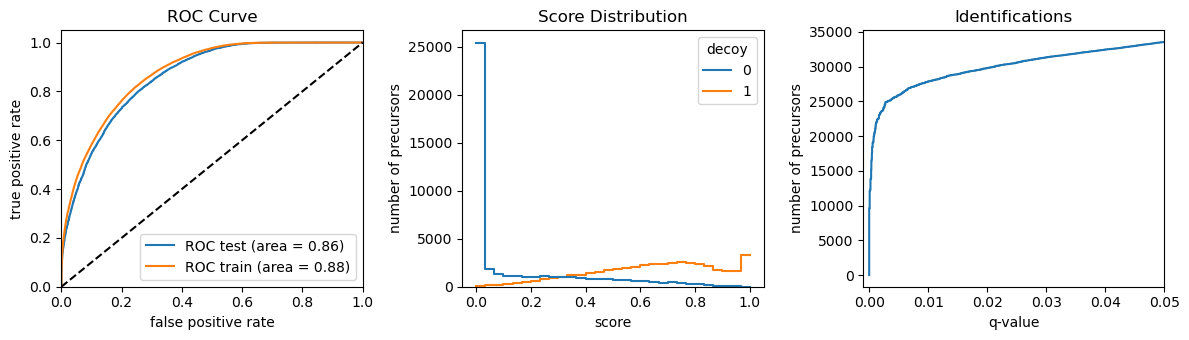

In [61]:
sig = scoring.fdr_correction(df, score_columns, index_group='precursor_idx')

In [65]:
sig.columns

Index(['base_width_rt', 'intensity_fraction', 'n_observations',
       'weighted_mass_error', 'height_fraction', 'mz_observed',
       'height_fraction_weighted', 'top3_scan_correlation',
       'height_correlation', 'mean_observation_score', 'sum_b_ion_intensity',
       'sum_ms1_intensity', 'diff_b_y_ion_intensity',
       'weighted_mass_deviation', 'cycle_fwhm', 'template_scan_correlation',
       'weighted_ms1_height', 'isotope_intensity_correlation', 'decoy',
       'base_width_mobility', 'template_frame_correlation', 'mono_ms1_height',
       'sum_y_ion_intensity', 'top_ms1_intensity', 'precursor_idx',
       'mz_library', 'mobility_fwhm', 'sum_ms1_height',
       'top3_frame_correlation', 'mobility_observed', 'rt_observed',
       'intensity_correlation', 'weighted_ms1_intensity',
       'intensity_fraction_weighted', 'fragment_frame_correlation',
       'isotope_height_correlation', 'fragment_scan_correlation',
       'mono_ms1_intensity', 'top_ms1_height', 'proba', 'qval'],
  

In [63]:
sig = sig[sig['decoy'] == 0]
sig = sig[sig['qval'] < 0.01]

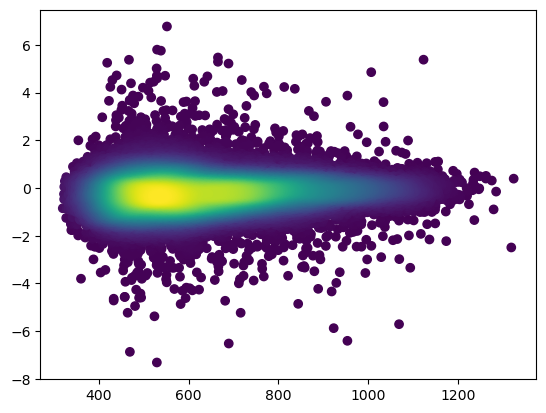

In [66]:
calibration.density_scatter(sig['mz_observed'].values, sig['weighted_mass_deviation'].values, )

In [78]:
@nb.njit()
def get_known_features(
    score_group_container
):
    """
    Iterates over all candidates in all score groups and returns a list of all features that were encountered and the total number of candidates.

    Parameters
    ----------

    score_group_container : ScoreGroupContainer
        The score group container to iterate over.

    Returns
    -------

    known_keys : List[str]
        A list of all features that were encountered.

    n : int
        The total number of candidates.
    
    """
    known_lengths = nb.typed.List.empty_list(nb.int64)
    known_keys = nb.typed.List.empty_list(nb.types.unicode_type)
    n = 0
    for i_sg in range(len(score_group_container)):
        score_group = score_group_container[i_sg]
        for i_c in range(len(score_group.candidates)):
            candidate = score_group.candidates[i_c]
            if len(candidate.features) > 0:
                n += 1
                if len(candidate.features) not in known_lengths:
                    known_lengths.append(len(candidate.features))
                    features = list(candidate.features.keys())
                    for feature in features:
                        if feature not in known_keys:
                            known_keys.append(feature)

    return known_keys, n

f32_array_type = nb.types.float32[:]

@nb.njit()
def assemble_features(
    score_group_container
):
    """
    Iterates over all score groups and candidates and assembles a dictionary of all features.

    Parameters
    ----------
    score_group_container : ScoreGroupContainer
        The score group container to iterate over.

    Returns
    -------
    output_dict : Dict[str, np.ndarray]
        A dictionary of all features.

    precursor_idx : List[int]
        A list of precursor indices.
    
    """

    feature_keys, n = get_known_features(score_group_container)
    output_dict = nb.typed.Dict.empty(
        key_type=nb.types.unicode_type,
        value_type=f32_array_type,
    )
    # initialize all arrays with NaNs
    for key in feature_keys:
        output_dict[key] = np.zeros(n, dtype=np.float32)
        output_dict[key].fill(np.nan)

    precursor_idx = []
    n = 0
    for i_sg in range(len(score_group_container)):
        score_group = score_group_container[i_sg]
        for i_c in range(len(score_group.candidates)):
            candidate = score_group.candidates[i_c]
            if len(candidate.features) > 0:
                n += 1
                precursor_idx.append(candidate.precursor_idx)
                for key in candidate.features:
                    output_dict[key][n] = candidate.features[key]

    return output_dict, precursor_idx

class ScoringWorkflow():
    def __init__(
            self, 
            dia_data, 
            precursors_flat,
            fragments_flat,
            candidates_df,
            quadrupole_calibration, 
            config,
            rt_column = 'rt_library',
            mobility_column = 'mobility_library',
            precursor_mz_column = 'mz_library',
            fragment_mz_column = 'mz_library',
            thread_count = 10

    ):
        self.dia_data = dia_data
        self.precursors_flat = precursors_flat.sor_values('precursor_idx')
        self.fragments_flat = fragments_flat
        self.candidates_df = candidates_df
        self.quadrupole_calibration = quadrupole_calibration
        self.config = config

        self.rt_column = rt_column
        self.mobility_column = mobility_column
        self.precursor_mz_column = precursor_mz_column
        self.fragment_mz_column = fragment_mz_column

        self.thread_count = thread_count

    def _assemble_score_group_container(self):
        score_group_container = ScoreGroupContainer()

        self.candidates_df = utils.calculate_score_groups(self.candidates_df)

        validate.candidates(self.candidates_df)

        score_group_container.build_from_df(
            candidates_df['elution_group_idx'].values.astype(np.uint32),
            candidates_df['score_group_idx'].values.astype(np.uint32),
            candidates_df['precursor_idx'].values.astype(np.uint32),
            candidates_df['channel'].values.astype(np.uint8),
            candidates_df['flat_frag_start_idx'].values.astype(np.uint32),
            candidates_df['flat_frag_stop_idx'].values.astype(np.uint32),

            self.candidates_df['scan_start'].values,
            self.candidates_df['scan_stop'].values,
            self.candidates_df['scan_center'].values,
            self.candidates_df['frame_start'].values,
            self.candidates_df['frame_stop'].values,
            self.candidates_df['frame_center'].values,

            self.candidates_df['charge'].values,
            self.candidates_df['mz_calibrated'].values.astype(np.float32),
            self.candidates_df[utils.get_isotope_column_names(self.candidates_df.columns)].values.astype(np.float32),
        )
        
        return score_group_container
    
    def _assemble_fragments(self):
            
        # set cardinality to 1 if not present
        if 'cardinality' in self.fragments_flat.columns:
            pass
        else:
            logging.warning('Fragment cardinality column not found in fragment dataframe. Setting cardinality to 1.')
            fragments_flat['cardinality'] = np.ones(len(self.fragments_flat), dtype=np.uint8)
        
        # validate dataframe schema and prepare jitclass compatible dtypes
        validate.fragments_flat(fragments_flat)

        return fragments.FragmentContainer(
            fragments_flat['mz_library'].values,
            fragments_flat[self.fragment_mz_column].values,
            fragments_flat['intensity'].values,
            fragments_flat['type'].values,
            fragments_flat['loss_type'].values,
            fragments_flat['charge'].values,
            fragments_flat['number'].values,
            fragments_flat['position'].values,
            fragments_flat['cardinality'].values
        )

    def _collect(self, score_group_container):

        features_dict, precursor_idx = assemble_features(score_group_container)

        df = pd.DataFrame(precursor_idx, columns=['precursor_idx'])
        for key in features_dict:
            df[key] = features_dict[key]

        df = df[df.isna().sum(axis=1) < df.shape[1] -1]
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        validate.check_critical_values(df)

        return df

    def process(self, debug = False):

        score_group_container = self._assemble_score_group_container()
        fragment_container = self._assemble_fragments()

        # if debug mode, only iterate over 10 elution groups
        iterator_len = min(10,len(score_group_container)) if debug else len(score_group_container)
        thread_count = 1 if debug else self.thread_count
        alphatims.utils.set_threads(thread_count)

        _executor(
            range(iterator_len), 
            score_group_container,
            fragment_container,
            dia_data,
            config.jitclass(),
            q.jit,
            debug
        )

        return self._collect(score_group_container)


In [79]:
candidates_df.sort_values(['score'])

elution_group_idx  score_group_idx  precursor_idx  rank     score  \
60953               17536            60953           1650     1  0.808103   
37979               10925            37979          36700     1  0.849844   
100410              28880           100410          76891     1  0.880179   
147383              42384           147383          64965     1  0.933923   
56146               16153            56146          23247     1  0.993740   
...                   ...              ...            ...   ...       ...   
120262              34576           120262          50264     0  9.685683   
99698               28674            99698          12347     0  9.726214   
120678              34699           120678          22009     0  9.755956   
120209              34561           120209          90048     0  9.761986   
40077               11533            40077          67221     0  9.794260   

        precursor_mz  decoy  channel  scan_center  scan_start  ...  \
60953     422.271118      0        0          761         748  ...   
37979     466.594360      0        0          846         833  ...   
100410    846.978088      0        0          329         308  ...   
147383    830.432495      0        0          358         337  ...   
56146     530.812500      0        0          640         629  ...   
...              ...    ...      ...          ...         ...  ...   
120262    742.947510      0        0          388         372  ...   
99698     507.816528      0        0          674         650  ...   
120678    583.361328      0        0          586         564  ...   
120209    980.862793      0        0          163         142  ...   
40077     881.988647      0        0          235         219  ...   

        mobility_calibrated  flat_frag_start_idx  flat_frag_stop_idx  charge  \
60953              0.830101               223211              223219       2   
37979              0.772058               137795              137809       3   
100410             1.088542               367192              367211       2   
147383             1.068631               537359              537374       2   
56146              0.880305               204852              204859       2   
...                     ...                  ...                 ...     ...   
120262             1.072260               439139              439154       2   
99698              0.868936               364635              364644       2   
120678             0.923689               440818              440830       2   
120209             1.185571               438927              438959       3   
40077              1.146165               145565              145579       2   

             i_0       i_1       i_2       i_3       i_4       i_5  
60953   0.598832  0.300183  0.082341  0.016140  0.002505  0.000000  
37979   0.426658  0.352288  0.156805  0.049421  0.012281  0.002547  
100410  0.384317  0.351564  0.177208  0.064046  0.018415  0.004451  
147383  0.385720  0.333461  0.178761  0.071335  0.022991  0.006254  
56146   0.545493  0.320330  0.104798  0.024726  0.004652  0.000000  
...          ...       ...       ...       ...       ...       ...  
120262  0.428312  0.347607  0.156910  0.051033  0.013244  0.002895  
99698   0.542905  0.322539  0.105338  0.024642  0.004576  0.000000  
120678  0.485929  0.340568  0.129590  0.035069  0.007502  0.001342  
120209  0.196491  0.303245  0.250656  0.146087  0.066974  0.025605  
40077   0.356915  0.353465  0.189382  0.072003  0.021624  0.005430  

[159458 rows x 29 columns]

In [80]:
candidates_df['rank'].value_counts()

0    90950
1    68508
Name: rank, dtype: int64

In [81]:
q = quadrupole.SimpleQuadrupole(dia_data.cycle)

config = CandidateConfig()
config.max_cardinality = 1
config.score_grouped = False



features = ScoringWorkflow(
    dia_data, 
    precursors_flat,
    fragments_flat,
    candidates_df,
    q,
    config,
    rt_column = 'rt_calibrated',
    mobility_column = 'mobility_calibrated',
    precursor_mz_column = 'mz_calibrated',
    fragment_mz_column = 'mz_calibrated',
)

features_df = features.process(debug=False)

100%|██████████| 159458/159458 [00:55<00:00, 2897.28it/s]


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mUnknown attribute 'decoy' of type instance.jitclass.Candidate#157fee070<failed:bool,precursor_idx:uint32,channel:uint8,frag_start_idx:uint32,frag_stop_idx:uint32,scan_start:int64,scan_stop:int64,scan_center:int64,frame_start:int64,frame_stop:int64,frame_center:int64,charge:uint8,precursor_mz:float32,isotope_intensity:array(float32, 1d, C),isotope_mz:array(float32, 1d, C),fragments:instance.jitclass.FragmentContainer#2854aceb0<mz_library:array(float32, 1d, C),mz:array(float32, 1d, C),intensity:array(float32, 1d, C),type:array(uint8, 1d, C),loss_type:array(uint8, 1d, C),charge:array(uint8, 1d, C),number:array(uint8, 1d, C),position:array(uint8, 1d, C),precursor_idx:array(uint32, 1d, C),cardinality:array(uint8, 1d, C)>,features:DictType[unicode_type,float32]<iv=None>,fragment_feature_dict:DictType[unicode_type,array(float32, 1d, A)]<iv=None>,dense_fragments:array(float32, 5d, C),dense_precursors:array(float32, 5d, C),fragments_frame_profile:array(float32, 3d, C),fragments_scan_profile:array(float32, 3d, C),template_frame_profile:array(float32, 2d, C),template_scan_profile:array(float32, 2d, C),observation_importance:array(float32, 1d, C),template:array(float32, 3d, C)>
[1m
File "../../../../../../../../../var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_50713/358781126.py", line 86:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m
[0m[1mDuring: typing of get attribute at /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_50713/358781126.py (86)[0m
[1m
File "../../../../../../../../../var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_50713/358781126.py", line 86:[0m
[1m<source missing, REPL/exec in use?>[0m


In [55]:
features_df = features._collect(score_group_container)

0:55:58.915058  WARNING: isotope_intensity_correlation has 8 NaNs ( 0.01 % out of 159107)
0:55:58.916051  WARNING: isotope_height_correlation has 8 NaNs ( 0.01 % out of 159107)
0:55:58.923069  WARNING: template_scan_correlation has 5 NaNs ( 0.00 % out of 159107)
0:55:58.923979  WARNING: template_frame_correlation has 5 NaNs ( 0.00 % out of 159107)
0:55:58.924805  WARNING: top3_b_ion_correlation has 123564 NaNs ( 77.66 % out of 159107)
0:55:58.925839  WARNING: top3_y_ion_correlation has 79242 NaNs ( 49.80 % out of 159107)


In [ ]:
features_df = features_df[set(features_df.columns) - set(['top3_b_ion_correlation','top3_y_ion_correlation'])].copy()


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_50713/2892365419.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_df = features_df[set(features_df.columns) - set(['top3_b_ion_correlation','top3_y_ion_correlation'])].copy()


In [67]:
from alphadia.extraction import scoring

In [68]:
features_df = features_df.sort_values(by=['precursor_idx'])
precursors_flat = precursors_flat.sort_values(by=['precursor_idx'])

precursor_pidx = precursors_flat['precursor_idx'].values
candidate_pidx = features_df['precursor_idx'].values
precursor_flat_lookup = np.searchsorted(precursor_pidx, candidate_pidx, side='left')

features_df['decoy'] = precursors_flat['decoy'].values[precursor_flat_lookup]
features_df['elution_group_idx'] = precursors_flat['elution_group_idx'].values[precursor_flat_lookup]

In [69]:
features_df.groupby(['elution_group_idx']).size().value_counts()

4    25808
3    16367
2     3348
1       78
dtype: int64

In [70]:
features_df.head(10)

mono_ms1_intensity  isotope_intensity_correlation  mobility_observed  \
15357             148284.0                       0.998527           0.776293   
15356                762.0                      -0.255860           1.069828   
35013              14933.0                       0.141812           0.997414   
35014             364105.0                       0.999239           0.819612   
35015              48683.0                       0.194948           0.798922   
123966             82702.0                       0.676686           0.828017   
123965             24603.0                      -0.567611           0.875216   
123881            616071.0                       0.998548           0.819612   
123880             10447.0                      -0.371023           0.829957   
35035              79206.0                       0.991282           0.835129   

        weighted_ms1_intensity  weighted_mass_error  height_fraction_weighted  \
15357            112186.695312             0.122431                  1.000000   
15356              1879.823608             1.012345                  0.116555   
35013            180719.734375             2.022022                  1.000000   
35014            275995.156250             0.653470                  1.000000   
35015            860097.750000             3.673399                  1.000000   
123966            59265.781250             3.601806                  1.000000   
123965            86564.773438             1.540347                  1.000000   
123881           478730.625000             0.014944                  1.000000   
123880            10596.508789             1.680055                  1.000000   
35035             61887.226562             1.066133                  1.000000   

        mono_ms1_height  template_frame_correlation  mobility_fwhm  \
15357        296.556244                    0.864729       0.010499   
15356         66.095772                    0.115736       0.002317   
35013        114.250473                   -0.204569       0.005033   
35014        651.030151                    0.921106       0.012149   
35015        144.833008                   -0.041358       0.012735   
123966      3166.554688                    0.342648       0.008408   
123965       103.374115                    0.032883       0.011219   
123881       755.116089                    0.010311       0.012302   
123880        82.656517                   -0.309753       0.010653   
35035        176.596588                    0.690900       0.005248   

        mz_library  ...  intensity_fraction  n_observations  \
15357   380.246948  ...              1.0000             1.0   
15356   827.775757  ...              0.4375             1.0   
35013   726.356934  ...              1.0000             1.0   
35014   417.244202  ...              1.0000             1.0   
35015   417.244202  ...              1.0000             1.0   
123966  473.784973  ...              1.0000             1.0   
123965  500.754059  ...              1.0000             1.0   
123881  415.747620  ...              1.0000             1.0   
123880  449.732239  ...              1.0000             1.0   
35035   428.276093  ...              1.0000             1.0   

        fragment_scan_correlation  sum_ms1_height  sum_ms1_intensity  \
15357                    0.532509      816.807800           219479.0   
15356                   -0.069056      348.889496            14135.0   
35013                    0.071425     2479.905518           976532.0   
35014                    0.386159     1584.444458           666048.0   
35015                   -0.132361     7828.904297          3498880.0   
123966                  -0.035678     5817.713379           200447.0   
123965                  -0.029233     3690.830566          1419242.0   
123881                  -0.064550     1764.350708          1129533.0   
123880                   0.393902     1678.411499          1478228.0   
35035                    0.685183      669.341309 

(159097, 37)
(159097,)


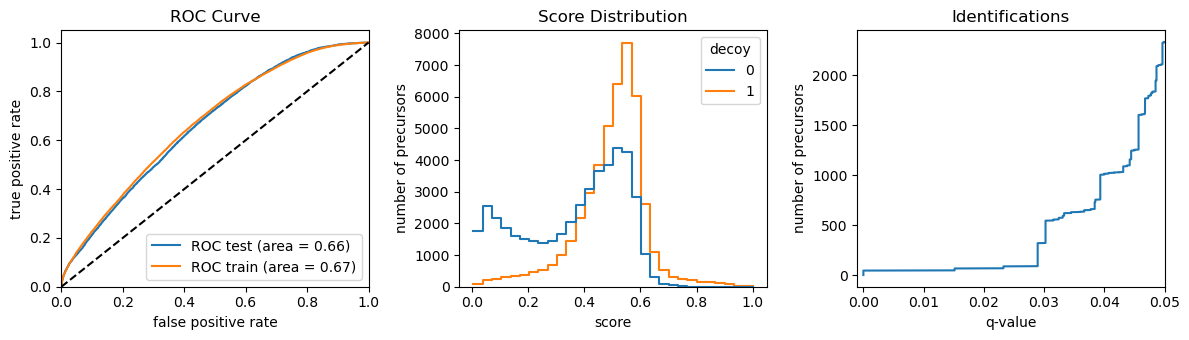

mono_ms1_intensity  isotope_intensity_correlation  mobility_observed  \
108435           3081699.0                       0.999612           0.845474   
111575           2928553.0                       0.999937           0.868750   
79560            2559498.0                       0.999963           0.778233   
142723           2642464.0                       0.999873           0.907543   
51148            3350667.0                       0.999864           0.975431   
...                    ...                            ...                ...   
156868             77967.0                       0.991296           1.075647   
122520            499299.0                       0.997743           1.042672   
158434            188255.0                       0.999385           1.080819   
4908            12785033.0                       0.998439           0.833190   
40833           40581836.0                       0.997155           0.737500   

        weighted_ms1_intensity  weighted_mass_error  height_fraction_weighted  \
108435            2.420232e+06             0.825590                       1.0   
111575            2.348890e+06             0.247928                       1.0   
79560             1.973373e+06             1.771366                       1.0   
142723            2.269510e+06             1.263907                       1.0   
51148             2.569650e+06             0.042757                       1.0   
...                        ...                  ...                       ...   
156868            9.811437e+04             0.270317                       1.0   
122520            3.787791e+05             0.151229                       1.0   
158434            3.032213e+05             0.255157                       1.0   
4908              9.492178e+06             0.969222                       1.0   
40833             2.965698e+07             0.648312                       1.0   

        mono_ms1_height  template_frame_correlation  mobility_fwhm  \
108435      2758.794434                    0.984942       0.011785   
111575      3031.498291                    0.985312       0.010398   
79560       2582.265625                    0.969967       0.012618   
142723      2611.386475                    0.979661       0.011818   
51148       3063.172119                    0.972964       0.012394   
...                 ...                         ...            ...   
156868        92.786926                    0.881560       0.018946   
122520       188.684448                    0.885766       0.031077   
158434       105.184883                    0.897898       0.020551   
4908        2294.140137                    0.923817       0.013975   
40833       9245.730469                    0.993168       0.030969   

         mz_library  ...  fragment_scan_correlation  sum_ms1_height  \
108435   498.614838  ...                   0.969897     6760.565430   
111575   554.941895  ...                   0.972969     8318.803711   
79560    457.601471  ...                   0.932737     6225.098633   
142723   740.992493  ...                   0.967104     9363.575195   
51148    641.323792  ...                   0.901370     7002.105469   
...             ...  ...                        ...             ...   
156868  1029.156982  ...                   0.664578      539.798462   
122520   815.434753  ...                   0.648455      700.276123   
158434   976.201599  ...                   0.549350      749.070129   
4908     429.278992  ...                   0.750399     4405.990723   
40833    354.207947  ...                   0.975790    16279.230469   

        sum_ms1_intensity  weighted_ms1_height  top3_frame_correlation  \
108435          7318116.0          2145.677734                0.988253   
111575          7614348.0          2469.776123                0.990134   
79560           5747833.0          2020.293701                0.974234   
142723          9054288.0          2296.776123                0.992750   
51148     

In [72]:
scoring.fdr_correction(features_df, feature_columns=list(set(features_df.columns)-{'decoy','precursor_idx','elution_group_idx'}), index_group='precursor_idx')

In [697]:
features_df.columns

Index(['intensity_correlation', 'height_correlation', 'n_observations',
       'mono_ms1_intensity', 'base_width_rt', 'rt_observed',
       'weighted_ms1_intensity', 'base_width_mobility', 'mz_library',
       'mono_ms1_height', 'isotope_height_correlation', 'weighted_mass_error',
       'intensity_fraction', 'height_fraction_weighted', 'top_ms1_height',
       'mobility_fwhm', 'weighted_ms1_height', 'sum_b_ion_intensity',
       'mobility_observed', 'diff_b_y_ion_intensity',
       'template_frame_correlation', 'template_scan_correlation',
       'weighted_mass_deviation', 'sum_y_ion_intensity',
       'intensity_fraction_weighted', 'mz_observed',
       'isotope_intensity_correlation', 'sum_ms1_height',
       'top3_frame_correlation', 'top_ms1_intensity', 'sum_ms1_intensity',
       'fragment_frame_correlation', 'cycle_fwhm', 'fragment_scan_correlation',
       'height_fraction', 'mean_observation_score', 'top3_scan_correlation',
       'precursor_idx', 'decoy', 'elution_group_idx']

<AxesSubplot:>

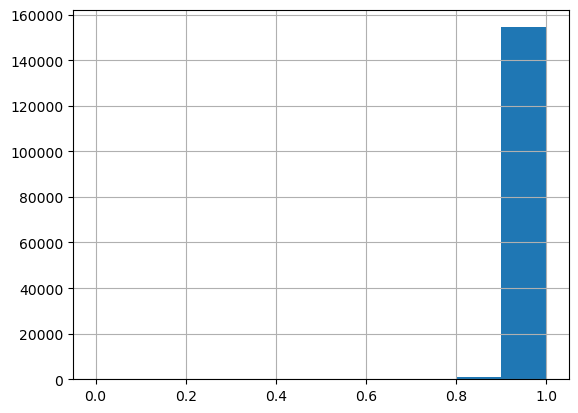

In [698]:
features_df['mean_observation_score'].hist()

In [651]:

def check_critical_values(input_df):

    for col in input_df.columns:
        nan_count = input_df[col].isna().sum()
        inf_count = np.isinf(input_df[col]).sum()

        if nan_count > 0:
            nan_percentage = nan_count / len(input_df) * 100
            logger.warning(f'{col} has {nan_count} NaNs ( {nan_percentage:.2f} % out of {len(input_df)})')

        if inf_count > 0:
            inf_percentage = inf_count / len(input_df) * 100
            logger.warning(f'{col} has {inf_count} Infs ( {inf_percentage:.2f} % out of {len(input_df)})')

validate_features(features_df)

1 day, 22:22:54.032150  WARNING: height_correlation has 2 NaNs ( 0.01 % out of 16979)
1 day, 22:22:54.033156  WARNING: intensity_correlation has 2 NaNs ( 0.01 % out of 16979)
1 day, 22:22:54.034825  WARNING: isotope_height_correlation has 6 NaNs ( 0.04 % out of 16979)
1 day, 22:22:54.035500  WARNING: isotope_intensity_correlation has 6 NaNs ( 0.04 % out of 16979)
1 day, 22:22:54.038171  WARNING: template_frame_correlation has 3 NaNs ( 0.02 % out of 16979)
1 day, 22:22:54.038752  WARNING: template_scan_correlation has 3 NaNs ( 0.02 % out of 16979)
1 day, 22:22:54.039445  WARNING: top3_b_ion_correlation has 3841 NaNs ( 22.62 % out of 16979)
1 day, 22:22:54.039671  WARNING: top3_b_ion_correlation has 6155 Infs ( 36.25 % out of 16979)
1 day, 22:22:54.040757  WARNING: top3_y_ion_correlation has 2377 NaNs ( 14.00 % out of 16979)
1 day, 22:22:54.040974  WARNING: top3_y_ion_correlation has 4306 Infs ( 25.36 % out of 16979)


In [520]:
features_df['channel'] = channel_list
features_df['precursor_idx'] = precursor_idx_list
features_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [521]:
precursors_proteins = precursors_flat[['precursor_idx','proteins','elution_group_idx']]

In [522]:
features_df = features_df.merge(precursors_proteins, on='precursor_idx', how='left')

In [523]:
features_filtered_df = features_df[set(features_df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])]

/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_43884/3418165122.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_filtered_df = features_df[set(features_df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])]


In [524]:
rank_feature_columns = features_filtered_df.columns[features_filtered_df.columns.str.contains('rank')]
all_feature_columns = list(set(features_filtered_df.columns) - set(['channel', 'precursor_idx','proteins']))

In [525]:
for col in tqdm(all_feature_columns):
    # count Nan values
    nan_count = features_filtered_df[col].isna().sum()
    print(col, nan_count, flush=True)

  0%|          | 0/61 [00:00<?, ?it/s]

elution_group_idx 0
intensity_correlation 3552
n_observations 3538
mean_reference_scan_cosine_rank 35276
base_width_rt 3538
rt_observed 3538
mean_reference_frame_cosine 35276
base_width_mobility 3538
mean_reference_template_frame_cosine_rank 35276
top3_y_ion_correlation_rank 35276
isotope_height_correlation 3546
isotope_pattern_correlation_rank 35276
intensity_fraction 3538
height_fraction_weighted 3538
top_ms1_height 3538
mean_reference_template_scan_cosine 35276
mobility_fwhm 3538
sum_b_ion_intensity 3538
top3_reference_frame_cosine_rank 35276
mean_reference_scan_cosine 35276
mean_reference_template_frame_cosine 35276
template_frame_correlation 3548
weighted_mass_deviation 3538
intensity_fraction_weighted 3538
isotope_intensity_correlation 3546
top_ms1_intensity 3538
sum_ms1_intensity 3538
cycle_fwhm 3538
fragment_frame_correlation_rank 35276
top3_reference_frame_cosine 35276
height_fraction 3538
top3_scan_correlation 3538
height_correlation 3547
mono_ms1_intensity 3538
top3_referenc

100%|██████████| 61/61 [00:00<00:00, 1742.50it/s]


In [117]:
features_filtered_df = df
all_feature_columns = list(set(features_filtered_df.columns) - set(['channel', 'precursor_idx','proteins']))

/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_51925/76433279.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))


(70002, 61)
(70002,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_51925/76433279.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


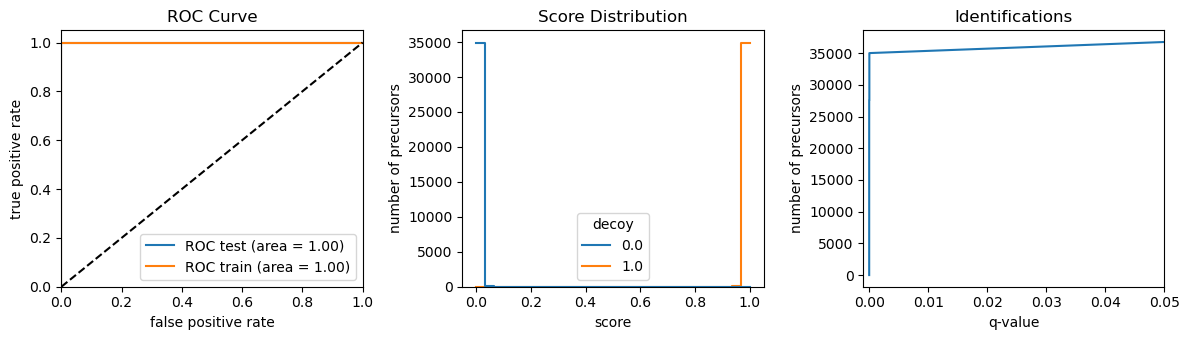

35355


KeyError: 'proteins'

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier

from alphadia.library import fdr_to_q_values

output_dfs = []

for channel in [4,8]:
    channel_df = features_filtered_df[features_filtered_df['channel'].isin([channel, 12])]
    channel_df['decoy'] = np.zeros(len(channel_df))
    channel_df.loc[channel_df['channel'] == 12, 'decoy'] = 1

    channel_df = channel_df.dropna()

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('GBC',MLPClassifier(hidden_layer_sizes=(50, 25, 5), max_iter=1000, alpha=0.1, learning_rate='adaptive', learning_rate_init=0.001, early_stopping=True, tol=1e-6))
    ])

    X = channel_df[all_feature_columns].values
    y = channel_df['decoy'].values

    
    

    print(X.shape)
    print(y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    pipeline.fit(X_train, y_train)
    

    y_test_proba = pipeline.predict_proba(X_test)[:,1]
    y_test_pred = np.round(y_test_proba)

    y_train_proba = pipeline.predict_proba(X_train)[:,1]
    y_train_pred = np.round(y_train_proba)

    channel_df['proba'] = pipeline.predict_proba(X)[:,1]
    # subset to the best candidate for every precursor
    channel_df = channel_df.sort_values(by=['proba'], ascending=True)
    features_best_df = channel_df


    # ROC curve
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    roc_auc_test = auc(fpr_test, tpr_test)

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    roc_auc_train = auc(fpr_train, tpr_train)

    
    
    # plotting

    fig, axs = plt.subplots(ncols=3, figsize=(12,3.5))

    axs[0].plot(fpr_test, tpr_test,label="ROC test (area = %0.2f)" % roc_auc_test)
    axs[0].plot(fpr_train, tpr_train,label="ROC train (area = %0.2f)" % roc_auc_train)

    axs[0].plot([0, 1], [0, 1], color="k", linestyle="--")
    axs[0].set_xlim([0.0, 1.0])
    axs[0].set_ylim([0.0, 1.05])
    axs[0].set_xlabel("false positive rate")
    axs[0].set_ylabel("true positive rate")
    axs[0].set_title("ROC Curve")
    axs[0].legend(loc="lower right")
    
    sns.histplot(data=features_best_df, x='proba', hue='decoy', bins=30, element="step", fill=False, ax=axs[1])
    axs[1].set_xlabel('score')
    axs[1].set_ylabel('number of precursors')
    axs[1].set_title("Score Distribution")

    features_best_df = features_best_df.sort_values(['proba'], ascending=True)
    target_values = 1-features_best_df['decoy'].values
    decoy_cumsum = np.cumsum(features_best_df['decoy'].values)
    target_cumsum = np.cumsum(target_values)
    fdr_values = decoy_cumsum/target_cumsum
    features_best_df['qval'] = fdr_to_q_values(fdr_values)
    q_val = features_best_df[features_best_df['qval'] <0.05 ]['qval'].values

    ids = np.arange(0, len(q_val), 1)
    axs[2].plot(q_val, ids)
    axs[2].set_xlim(-0.001, 0.05)
    axs[2].set_xlabel('q-value')
    axs[2].set_ylabel('number of precursors')
    axs[2].set_title("Identifications")
    
    fig.tight_layout()
    plt.show()

    print(len(features_best_df[features_best_df['qval'] <=0.01 ]['qval']))
    #print(features_best_df[features_best_df['qval'] <=0.01 ]['proteins'].nunique())


    output_dfs.append(features_best_df[features_best_df['qval'] <=0.01])



In [416]:
output_dfs[1]['elution_group_idx']

84346     35246
83995     35097
83552     34913
38489     16099
82033     34331
          ...  
47051     19623
27446     11504
99228     41525
15406      6476
105274    44098
Name: elution_group_idx, Length: 16736, dtype: int64

In [417]:
for df in output_dfs:
    print(df['proteins'].nunique())

4245
3540


In [498]:
merged_df = output_dfs[0][['elution_group_idx', 'weighted_ms1_height','weighted_ms1_intensity', 'qval']].merge(output_dfs[1][['elution_group_idx', 'weighted_ms1_height','weighted_ms1_intensity', 'qval']], on='elution_group_idx', suffixes=('_4', '_8'), how='inner')

In [499]:

merged_df

elution_group_idx  weighted_ms1_height_4  weighted_ms1_intensity_4  \
0                  16416            7666.241699              1.955397e+07   
1                  34284             106.128654              3.041960e+04   
2                  30504             246.987198              8.520016e+04   
3                   3663              79.110237              8.016205e+03   
4                  34343             104.366196              3.334354e+04   
...                  ...                    ...                       ...   
15651              44019              60.675987              1.503926e+03   
15652               6528              74.418488              5.334027e+03   
15653              17757             131.172195              1.144738e+03   
15654              38803             133.619324              6.499219e+02   
15655              27174             123.798347              2.427288e+04   

         qval_4  weighted_ms1_height_8  weighted_ms1_intensity_8    qval_8  
0      0.000000             184.829346             256847.687500  0.006419  
1      0.000000             103.237030              28048.109375  0.000317  
2      0.000000             207.850006              70438.687500  0.000317  
3      0.000000              72.712860               5831.319824  0.000000  
4      0.000000              98.306267              28145.125000  0.000317  
...         ...                    ...                       ...       ...  
15651  0.009781              73.294868               1627.281616  0.004988  
15652  0.009883              69.030640               3707.766113  0.008936  
15653  0.009883             107.327179               1122.975098  0.005077  
15654  0.009883              48.418755                250.677521  0.008532  
15655  0.009913              71.653397               4330.724121  0.009409  

[15656 rows x 7 columns]

In [500]:
merged_df['weighted_ms1_height_4'] = np.log10(merged_df['weighted_ms1_height_4'])
merged_df['weighted_ms1_height_8'] = np.log10(merged_df['weighted_ms1_height_8'])
merged_df['weighted_ms1_intensity_4'] = np.log10(merged_df['weighted_ms1_intensity_4'])
merged_df['weighted_ms1_intensity_8'] = np.log10(merged_df['weighted_ms1_intensity_8'])


In [501]:
merged_df['qval'] = merged_df['qval_4'] + merged_df['qval_8']

In [502]:
print(merged_df.shape)

(15656, 8)


In [503]:
from alphadia.extraction import calibration

In [504]:
print(np.corrcoef(merged_df['weighted_ms1_intensity_4'], merged_df['weighted_ms1_intensity_8']))

[[1.         0.78423321]
 [0.78423321 1.        ]]


<AxesSubplot:xlabel='weighted_ms1_intensity_4', ylabel='weighted_ms1_intensity_8'>

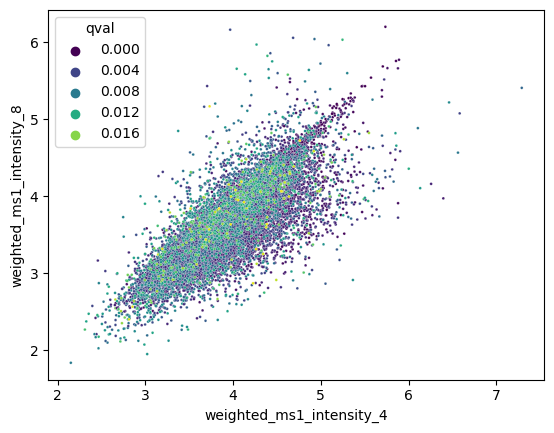

In [515]:
sns.scatterplot(data=merged_df, x='weighted_ms1_intensity_4', y='weighted_ms1_intensity_8', hue='qval', palette='viridis', s=4)

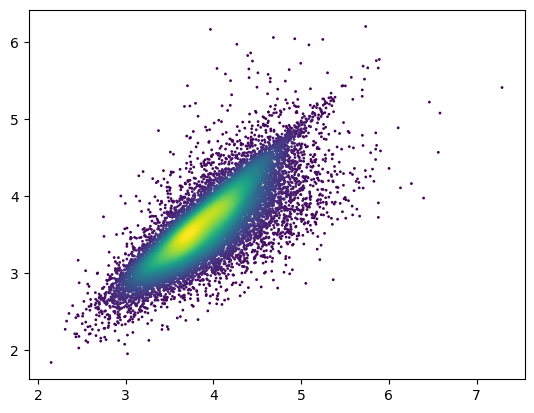

In [516]:
calibration.density_scatter(merged_df['weighted_ms1_intensity_4'].values, merged_df['weighted_ms1_intensity_8'].values, s=1)



In [316]:
for col in features_filtered_df.columns:
    print(col, np.isinf(features_filtered_df[col]).sum())

mean_observation_score 0
reference_intensity_correlation 0
mean_fragment_intensity_ratio 18
weighted_mass_error 0
mean_reference_scan_cosine_rank 0
base_width_mobility 0
reference_intensity_correlation_rank 0
top3_reference_frame_cosine 0
mean_reference_template_scan_cosine 0
top3_frame_correlation 0
mean_reference_frame_cosine 0
top3_reference_scan_cosine_rank 0
sum_y_ion_intensity 0
height_fraction_weighted 0
intensity_fraction_weighted 0
intensity_correlation 0
isotope_intensity_correlation 0
top3_reference_scan_cosine 0
sum_b_ion_intensity 0
height_fraction 0
weighted_ms1_intensity 0
top3_scan_correlation 0
mean_reference_template_frame_cosine 0
height_correlation 0
top3_reference_frame_cosine_rank 0
base_width_rt 0
weighted_ms1_height 0
top_ms1_intensity 0
channel 0
mean_reference_template_scan_cosine_rank 0
cycle_fwhm 0
mz_observed 0
diff_b_y_ion_intensity 0
mobility_fwhm 0
mobility_observed 0
fragment_scan_correlation 0
template_scan_correlation 0
isotope_height_correlation 0
su

In [280]:
print(len(features_filtered_df))

104088


In [279]:
features_filtered_df.dropna(inplace=True)

/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_33891/2367345906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_filtered_df.dropna(inplace=True)


In [190]:
config = CandidateConfig()
config.max_cardinality = 1

for elem in score_group_container:

    reference_idx = np.argmin([candidate.channel for candidate in elem.candidates])

    print('elution group idx ', elem.elution_group_idx)

    for candidate in elem.candidates:
        if candidate.channel == elem.candidates[reference_idx].channel:
            continue

        print(elem.candidates[reference_idx].channel)
        print(candidate.channel)

        features.reference_features(
            elem.candidates[reference_idx].observation_importance,
            elem.candidates[reference_idx].fragments_scan_profile,
            elem.candidates[reference_idx].fragments_frame_profile,
            elem.candidates[reference_idx].template_scan_profile,
            elem.candidates[reference_idx].template_frame_profile,
            candidate.fragments_scan_profile,
            candidate.fragments_frame_profile,
            candidate.template_scan_profile,
            candidate.template_frame_profile,
            candidate.fragments.intensity,

        )
        

elution group idx  0
0
12


ZeroDivisionError: division by zero

In [76]:
for elem in score_group_container:
    for c in elem:
        print(c.features)

{base_width_mobility: 0.02715517207980156, base_width_rt: 4.3296332359313965, rt_observed: 1624.5277099609375, mobility_observed: 1.0387930870056152, mono_ms1_intensity: 4645.0, top_ms1_intensity: 3596.0, sum_ms1_intensity: 20256.0, weighted_ms1_intensity: 3491.5908203125, weighted_mass_error: -0.7054408192634583, mz_library: 959.477783203125, mz_observed: 959.4771118164062, mono_ms1_height: 77.87284088134766, top_ms1_height: 83.84857940673828, sum_ms1_height: 452.5541687011719, weighted_ms1_height: 77.102783203125, isotope_intensity_correlation: 0.3801707327365875, isotope_height_correlation: 0.7872637510299683, n_observations: 1.0, intensity_correlation: -0.24705521762371063, height_correlation: -0.3224771022796631, intensity_fraction: 1.0, height_fraction: 1.0, intensity_fraction_weighted: 0.9999998807907104, height_fraction_weighted: 0.9999998807907104, mean_observation_score: 1.0, sum_b_ion_intensity: 9.086589813232422, sum_y_ion_intensity: 9.411646842956543, diff_b_y_ion_intensit

In [479]:
from alphadia.extraction import features

In [456]:
for elem in score_group_container:
    for c in elem:
        fragment_scan_correlation = features.profile_features(
        dia_data,
        c.fragments.intensity,
        c.fragments.type,
        c.observation_importance,
        c.fragments_scan_profile,
        c.fragments_frame_profile,
        c.template_scan_profile,
        c.template_frame_profile,
    )

TypeError: not enough arguments: expected 12, got 8

In [ ]:
for i, elem in enumerate(score_group_container[1434: 1435]):
    for j, c in enumerate(elem):
        print(i, c.channel)
        fragment_scan_correlation = features.profile_features(
        dia_data,
        c.fragments.intensity,
        c.fragments.type,
        c.observation_importance,
        c.fragments_scan_profile,
        c.fragments_frame_profile,
        c.template_scan_profile,
        c.template_frame_profile,
        c.scan_start,
        c.scan_stop,
        c.frame_start,
        c.frame_stop
    )
    print(fragment_scan_correlation)

0 12
0 0
0 4
0 8
{fragment_scan_correlation: 0.10965988039970398, top3_scan_correlation: 0.1657911241054535, fragment_frame_correlation: 0.2171073853969574, top3_frame_correlation: 0.27562978863716125, template_scan_correlation: 0.0890718325972557, template_frame_correlation: -0.29588934779167175, top3_b_ion_correlation: 0.0, top3_y_ion_correlation: 0.27562978863716125, cycle_fwhm: 2.042839527130127, mobility_fwhm: 0.006741540040820837}


[[0.        ]
 [0.9106993 ]
 [0.96651314]
 [0.96996887]
 [0.96540644]
 [0.        ]
 [0.97080258]
 [0.96331911]
 [0.94835788]
 [0.90039327]
 [0.95924887]] [[0.        ]
 [0.88784775]
 [0.98776018]
 [0.98834849]
 [0.9887366 ]
 [0.        ]
 [0.9853956 ]
 [0.97548074]
 [0.97011486]
 [0.9124464 ]
 [0.97820172]]


DictType[unicode_type,float32]<iv=None>({fragment_scan_correlation: 0.8737393617630005, top3_scan_correlation: 0.8868067860603333, fragment_frame_correlation: 0.9636719226837158, top3_frame_correlation: 0.9690948724746704, template_scan_correlation: 0.9232020378112793, template_frame_correlation: 0.980218768119812, top3_b_ion_correlation: 0.9690948724746704, top3_y_ion_correlation: 0.0, cycle_fwhm: 4.762497425079346, mobility_fwhm: 0.02662881463766098})

In [1180]:
# (n_fragments, n_observations, n_frames)
fragments_frame_profile = features.or_envelope_2d(features.frame_profile_2d(score_group_container[0][0].dense_fragments[0]))
print(fragments_frame_profile.shape, nb.typeof(fragments_frame_profile))
# (n_observations, n_frames)
template_frame_profile = features.or_envelope_1d(features.frame_profile_1d(score_group_container[0][0].template))
print(template_frame_profile.shape, nb.typeof(template_frame_profile))
# (n_fragments, n_observations, n_scans)
fragments_scan_profile = features.or_envelope_2d(features.scan_profile_2d(score_group_container[0][0].dense_fragments[0]))
print(fragments_scan_profile.shape, nb.typeof(fragments_scan_profile))
# (n_observations, n_scans)
template_scan_profile = features.or_envelope_1d(features.scan_profile_1d(score_group_container[0][0].template))
print(template_scan_profile.shape, nb.typeof(template_scan_profile))

(16, 1, 13) array(float32, 3d, C)
(1, 13) array(float32, 2d, C)
(16, 1, 43) array(float32, 3d, C)
(1, 43) array(float32, 2d, C)


In [1123]:
x = features.frame_profile_1d(score_group_container[0][0].template)

In [1124]:
x

array([[283.72127545, 303.62370622, 250.3906709 , 373.35327089,
        165.80072522, 321.82063127, 332.00089252, 322.83626008,
        282.43740666, 365.63079095, 161.20813197, 162.11909342,
        166.64792752]])

In [ ]:
self.build_profiles(
            dense_fragments,
            template
        )

{base_width_mobility: 0.02715517207980156, base_width_rt: 4.3296332359313965, rt_observed: 1624.5277099609375, mobility_observed: 1.0387930870056152, mono_ms1_intensity: 33928.0, top_ms1_intensity: 52204.0, sum_ms1_intensity: 181584.0, weighted_ms1_intensity: 38224.3203125, weighted_mass_error: 0.3467541038990021, mz_library: 954.1148681640625, mz_observed: 954.1151733398438, mono_ms1_height: 125.22274780273438, top_ms1_height: 160.1376495361328, sum_ms1_height: 729.435546875, weighted_ms1_height: 134.43067932128906, isotope_intensity_correlation: 0.9922327399253845, isotope_height_correlation: 0.9808178544044495, n_observations: 1.0, intensity_correlation: 0.7992156147956848, height_correlation: 0.5745990872383118, intensity_fraction: 1.0, height_fraction: 1.0, intensity_fraction_weighted: 0.9999998807907104, height_fraction_weighted: 0.9999998807907104, mean_observation_score: 1.0, sum_b_ion_intensity: 10.492578506469727, sum_y_ion_intensity: 10.318869590759277, diff_b_y_ion_intensit

In [863]:
print(len(score_group_container))
for score_group in score_group_container:
    print(len(score_group))

3
4
4
4


In [864]:
for row in candidates_df.to_dict(orient='records'):
    print(row)
    break

{'precursor_idx': 220784, 'elution_group_idx': 33594, 'channel': 8, 'decoy': 0, 'flat_frag_start_idx': 1591186, 'flat_frag_stop_idx': 1591215, 'charge': 3, 'mz_calibrated': 959.4777980394952, 'i_0': 0.1937249640325094, 'i_1': 0.2941284599093093, 'i_2': 0.2475971070506366, 'i_3': 0.149851497434286, 'i_4': 0.0721517745579305, 'i_5': 0.0291537630126528, 'scan_start': 383, 'scan_stop': 426, 'scan_center': 404, 'frame_start': 14260, 'frame_stop': 14299, 'frame_center': 14278, 'rank': 0, 'score_group_idx': 0}


  0%|          | 0/10 [00:00<?, ?it/s]

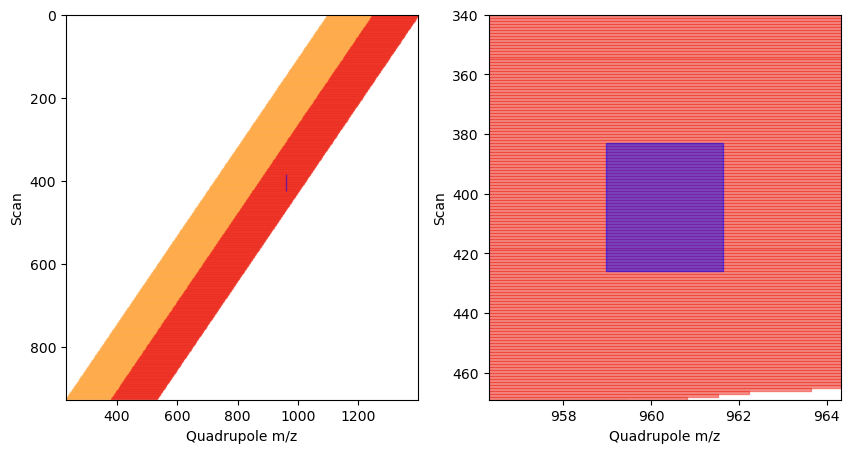

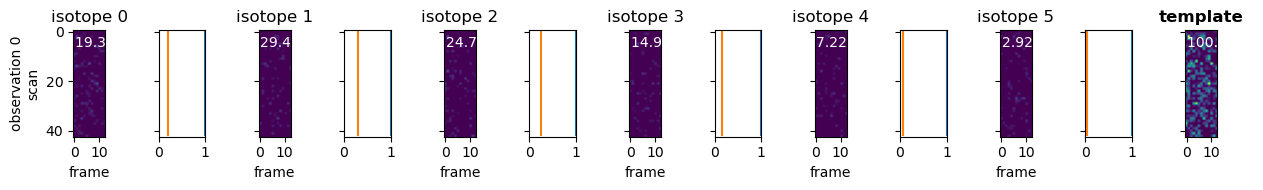

Exception in thread Thread-691:
Traceback (most recent call last):
  File "/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/plotting.py", line 248, in plot_fragment_profile
    ax[2, 0].imshow(template[i_observation])
  File "/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/matplotlib/_api/deprecation.py", line 459, in wrapper
    return func(*args, **kwargs)
  File "/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/matplotlib/__init__.py", line 1414, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/matplotlib/axes/_axes.py", line 5487, in imshow
    im.set_data(X)
  

KeyboardInterrupt: 

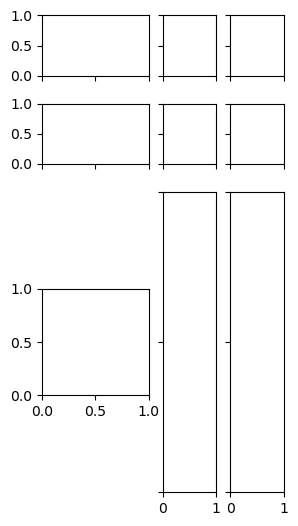

In [546]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates_df,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=True
)
container, psm, fragments = scoring_workflow()

In [49]:
container[0].

In [173]:
fragments_exclusive

mz_library  intensity  cardinality  type  loss_type  charge  number  \
0         628.377686   1.000000            4   121          0       1       6   
1         263.139008   0.015442            1    98          0       1       2   
2         541.345642   0.264511            4   121          0       1       5   
3         271.176453   0.030825            4   121          0       2       5   
4         345.224487   0.038848            4   121          0       1       3   
...              ...        ...          ...   ...        ...     ...     ...   
2909992  2087.022705   1.000000            1   121          0       1      18   
2909993  1985.974976   0.713498            1   121          0       1      17   
2909994  1928.953491   0.047048            1   121          0       1      16   
2909995  1829.885010   0.114307            1   121          0       1      15   
2909996  1714.858154   0.002081            1   121          0       1      14   

         position  mz_calibrated  
0               0       0.000000  
1               1     263.133179  
2               1       0.000000  
3               1       0.000000  
4               3       0.000000  
...           ...            ...  
2909992        28    2087.030518  
2909993        29    1985.981812  
2909994        30    1928.959717  
2909995        31    1829.890259  
2909996        32    1714.862305  

[2909997 rows x 9 columns]

  0%|          | 0/10 [00:00<?, ?it/s]

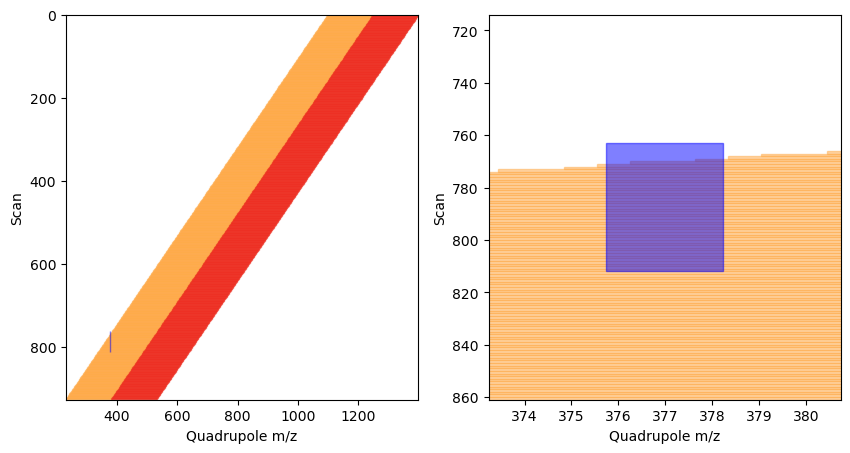

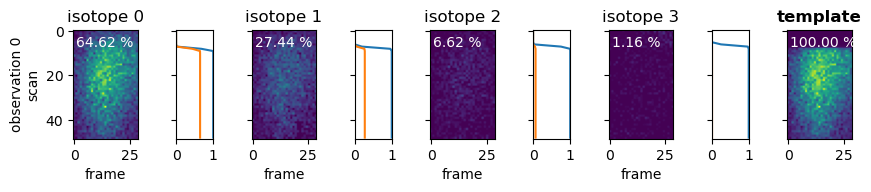

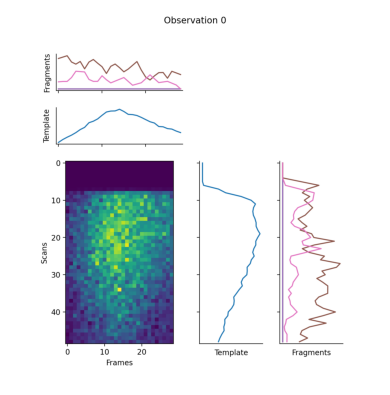

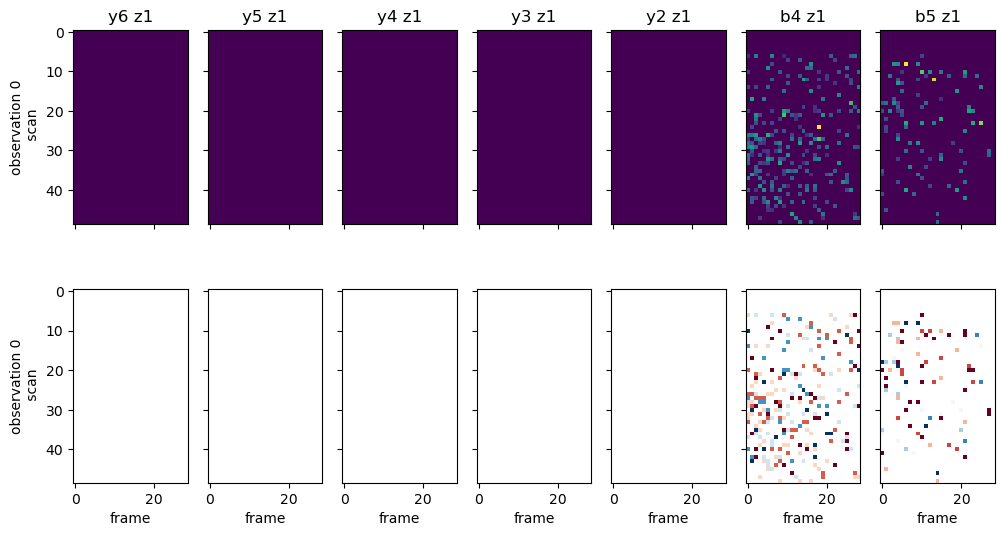

 10%|█         | 1/10 [00:03<00:29,  3.22s/it]

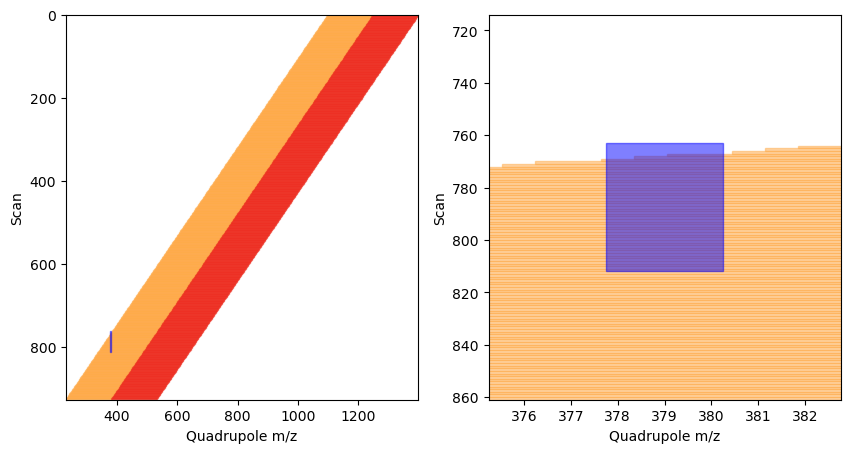

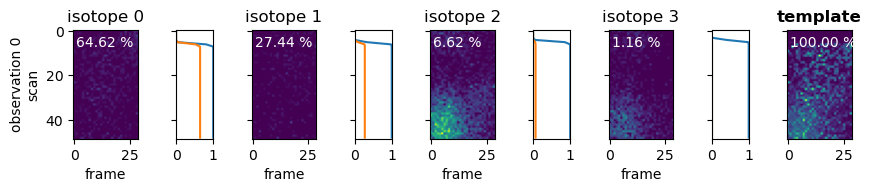

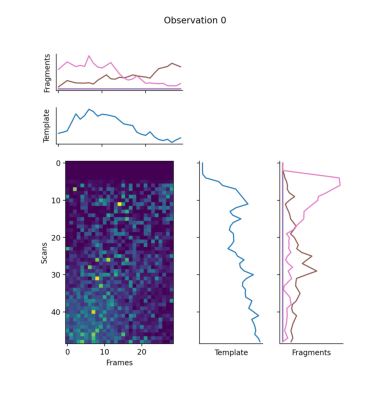

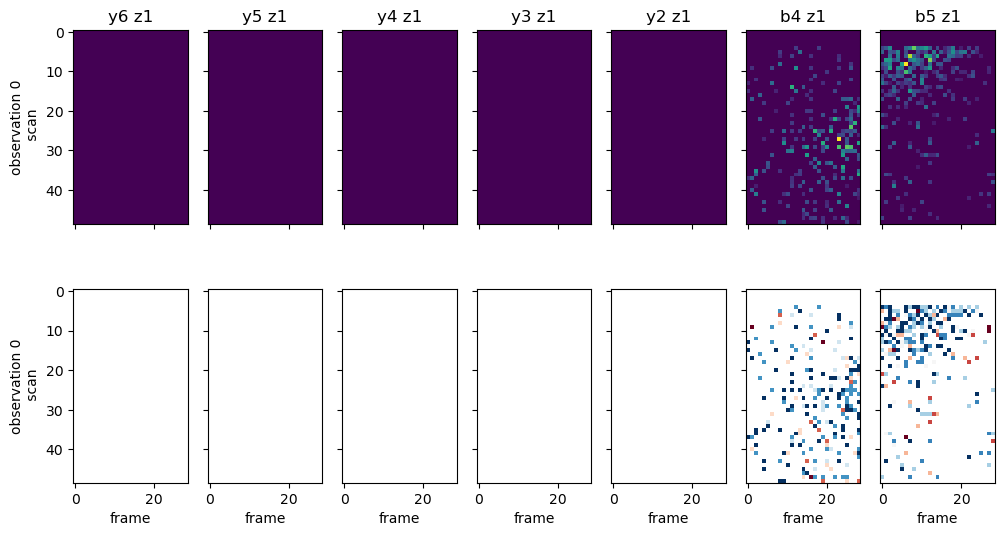

 20%|██        | 2/10 [00:06<00:26,  3.29s/it]

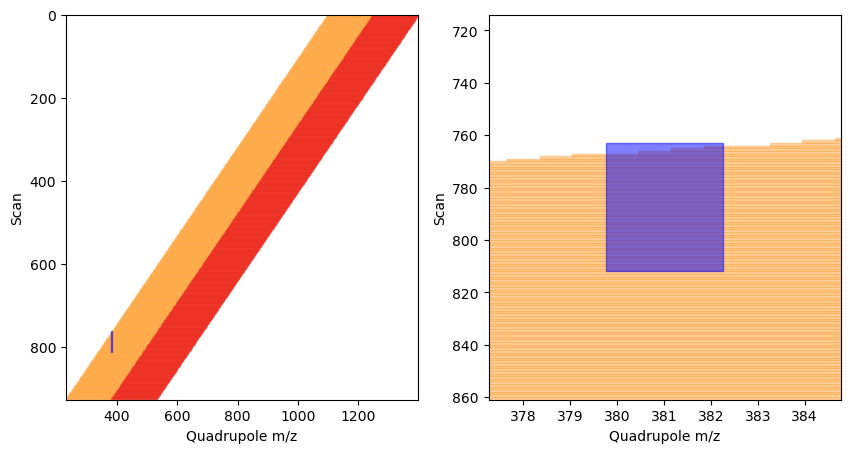

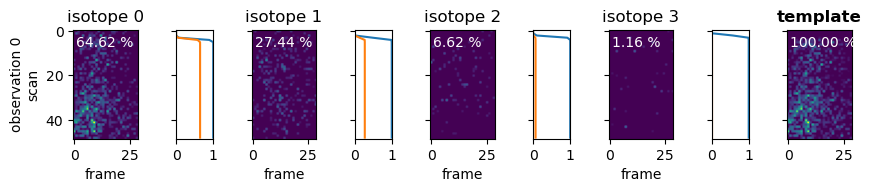

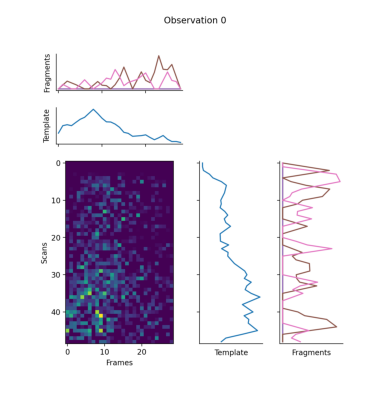

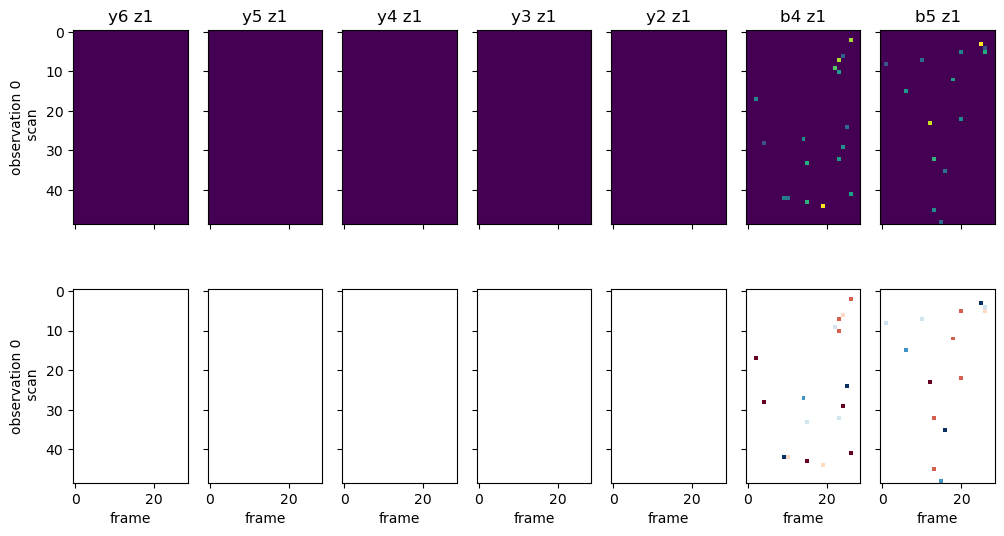

 30%|███       | 3/10 [00:09<00:20,  2.96s/it]

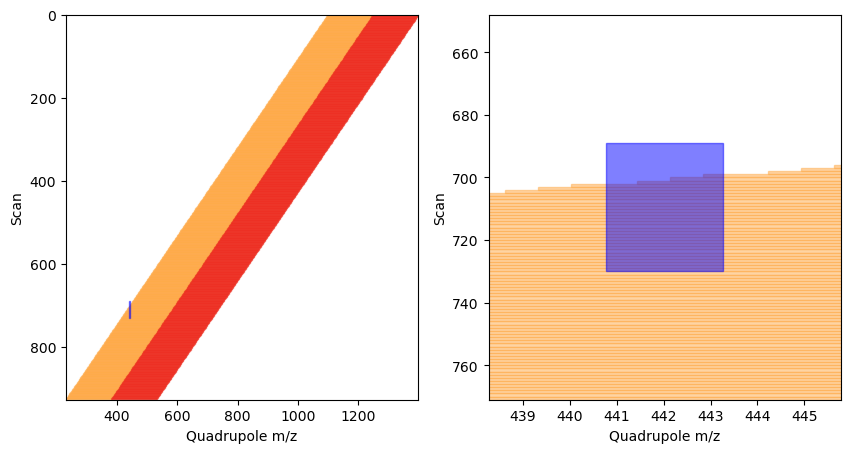

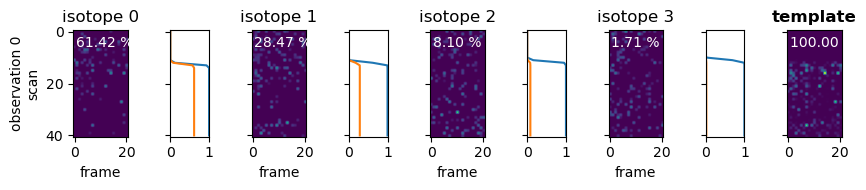

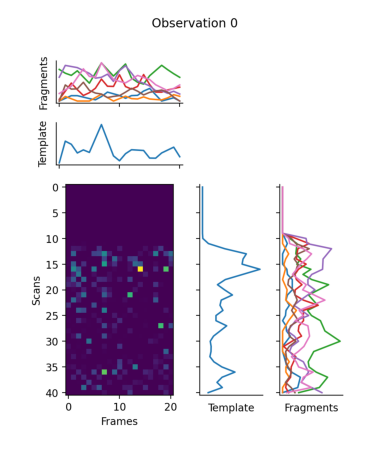

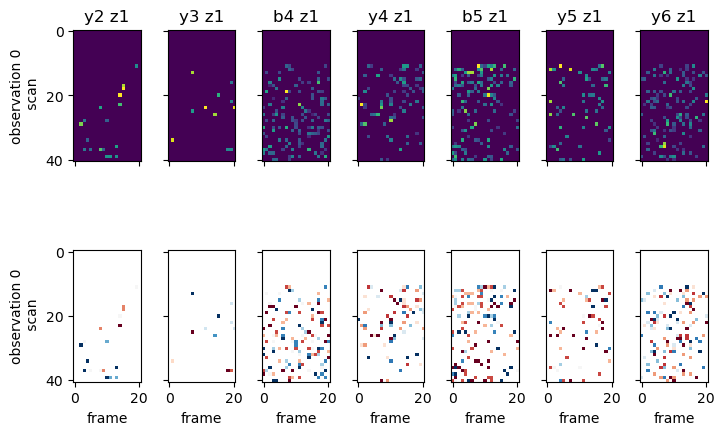

 40%|████      | 4/10 [00:12<00:18,  3.08s/it]

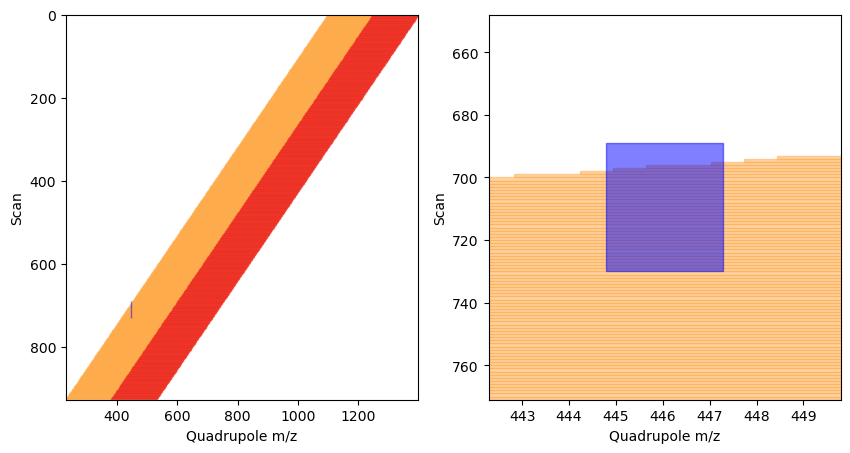

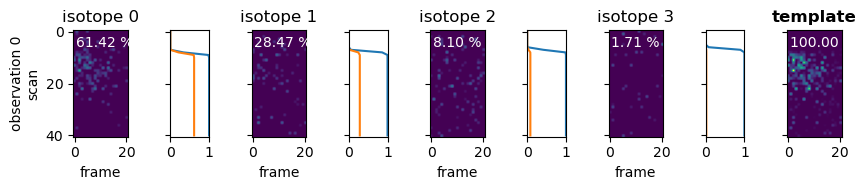

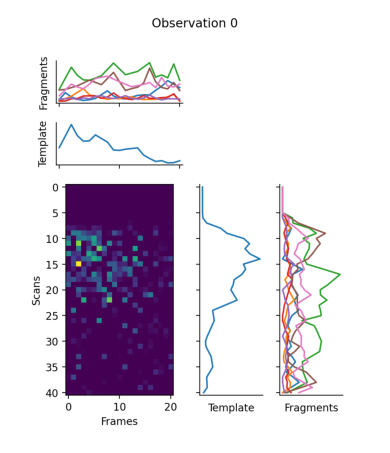

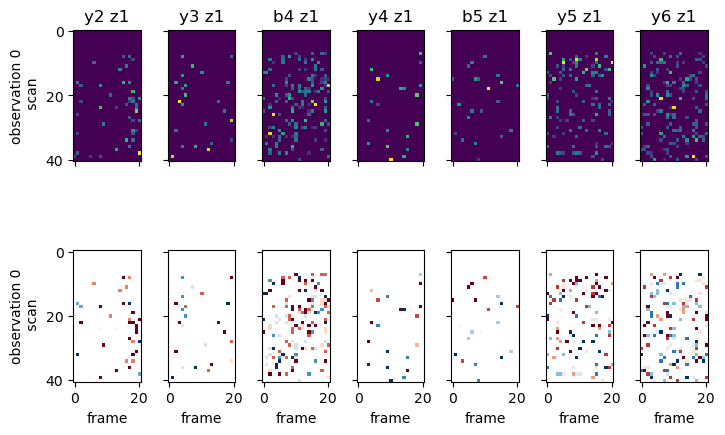

 50%|█████     | 5/10 [00:14<00:14,  2.85s/it]

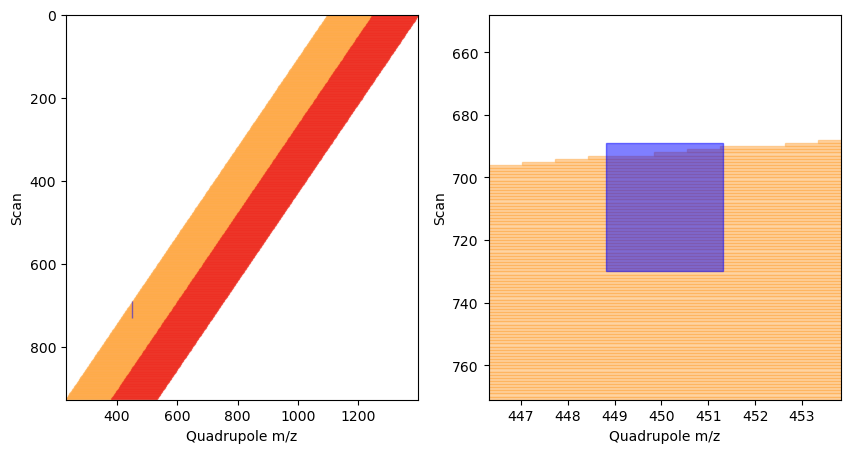

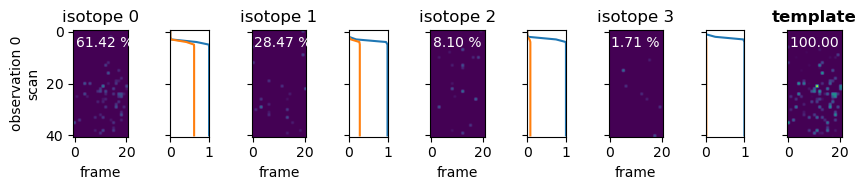

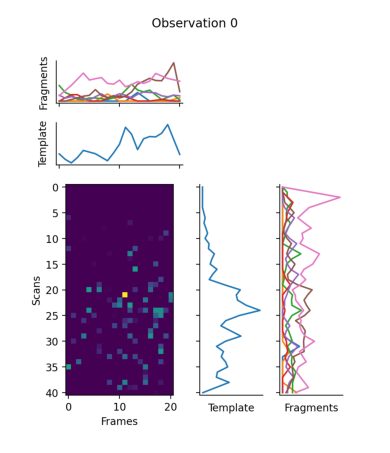

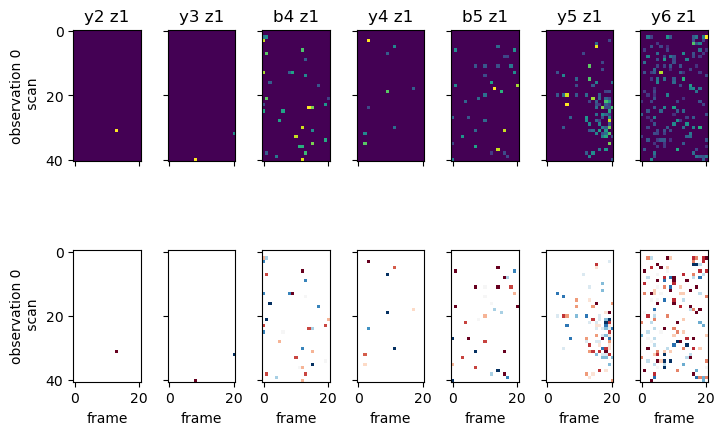

 60%|██████    | 6/10 [00:18<00:12,  3.01s/it]

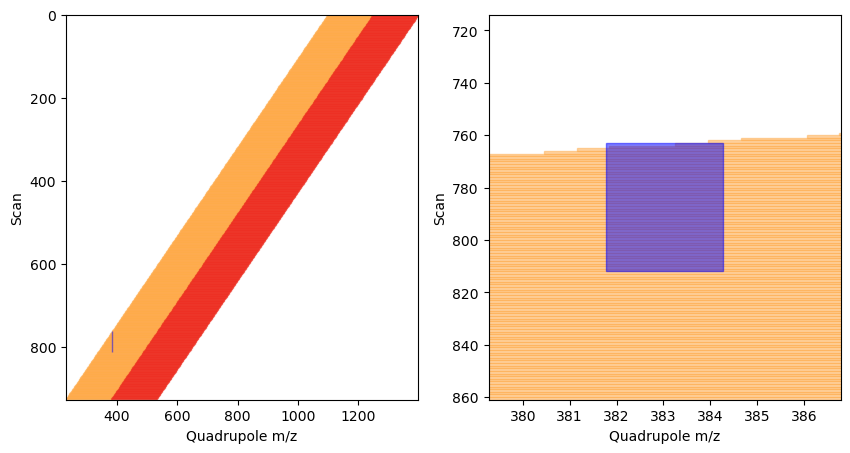

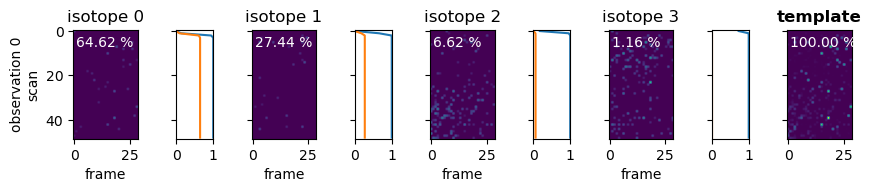

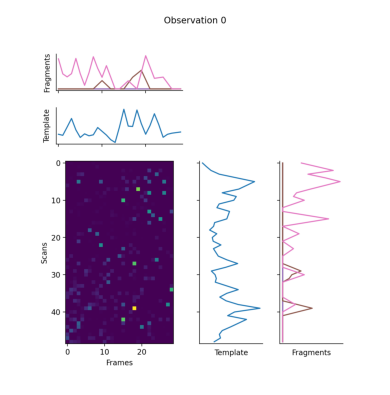

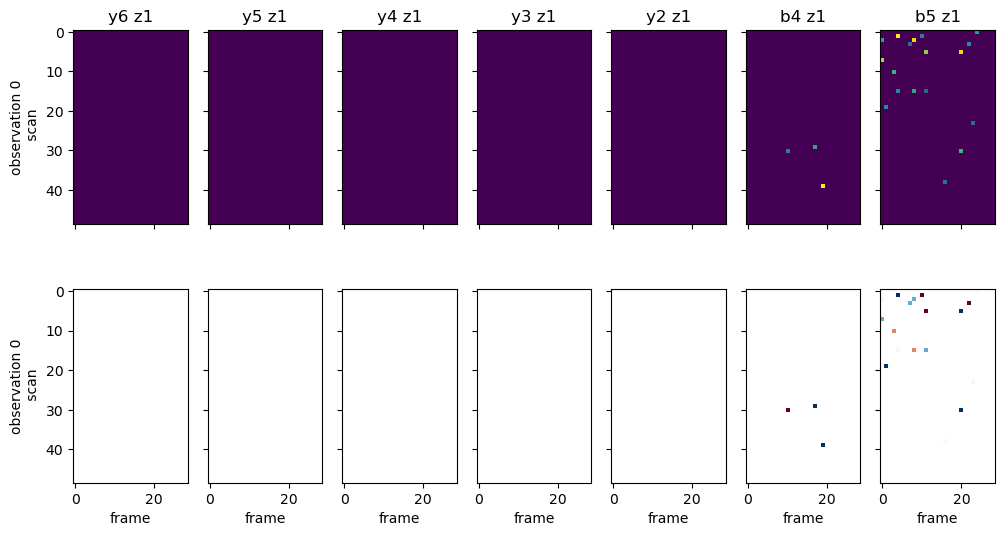

 70%|███████   | 7/10 [00:20<00:08,  2.86s/it]

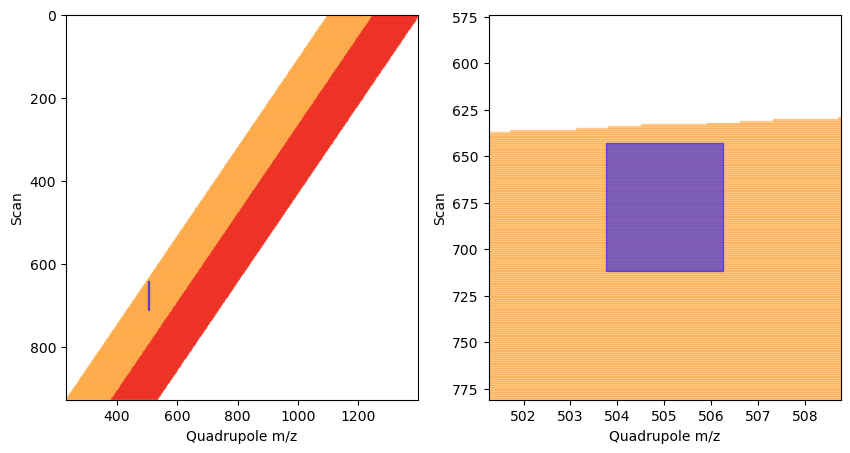

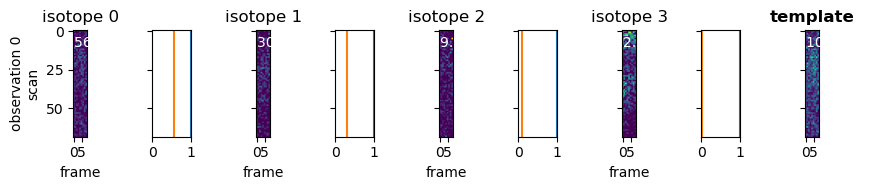

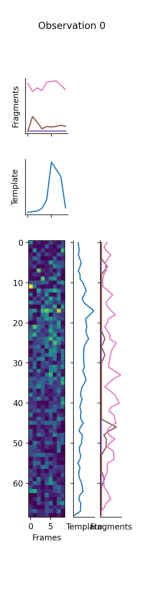

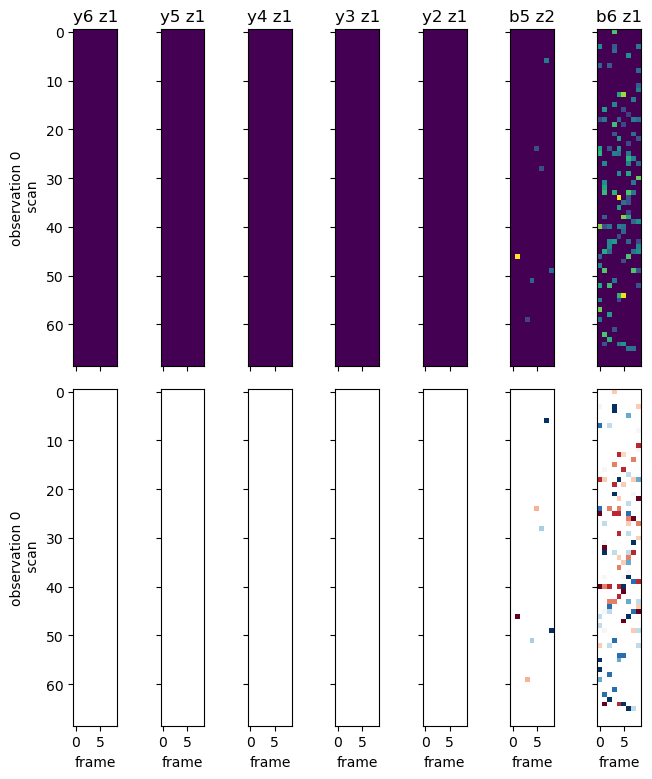

 80%|████████  | 8/10 [00:24<00:06,  3.01s/it]

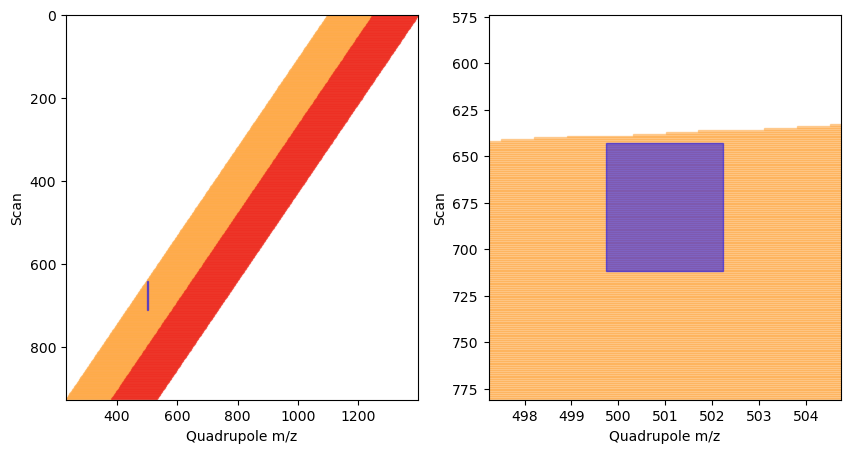

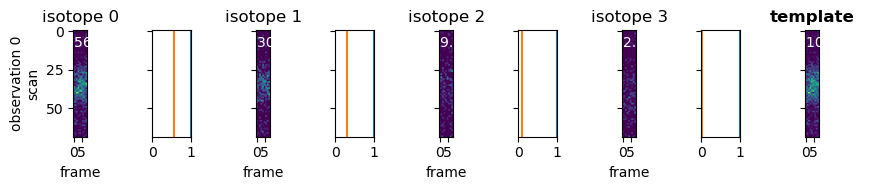

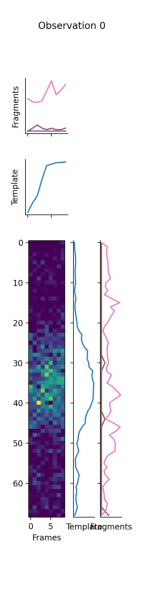

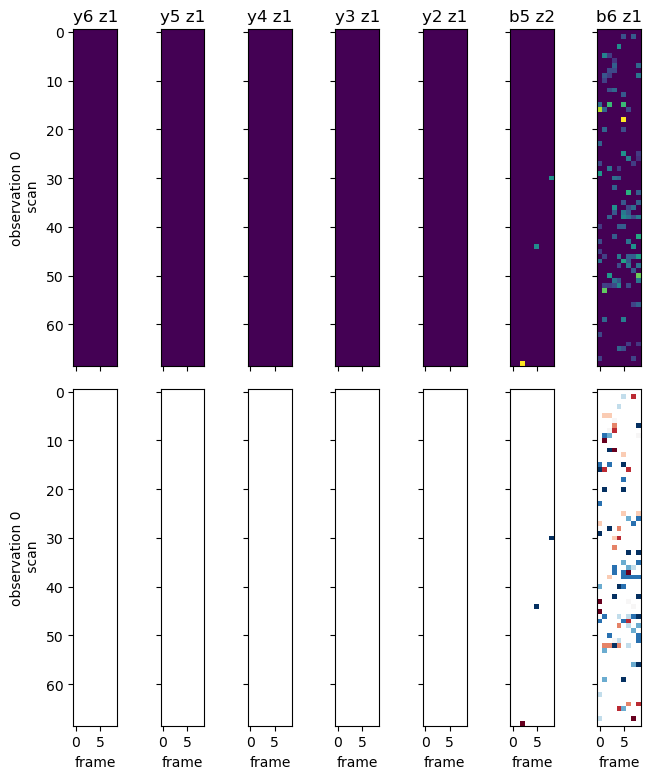

 90%|█████████ | 9/10 [00:27<00:03,  3.09s/it]

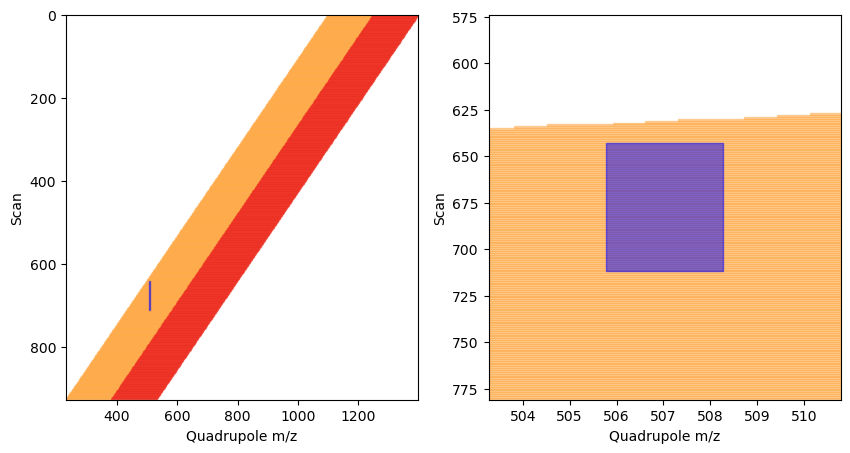

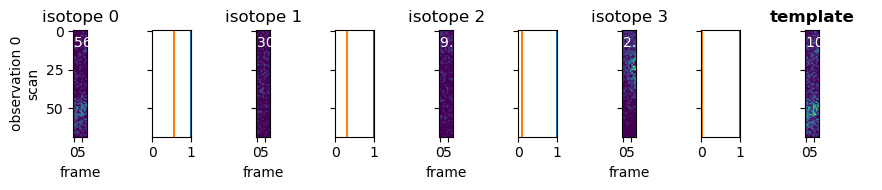

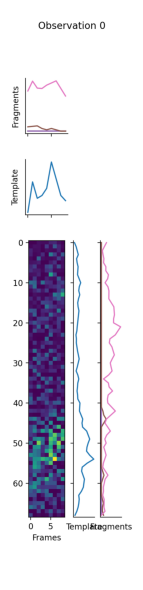

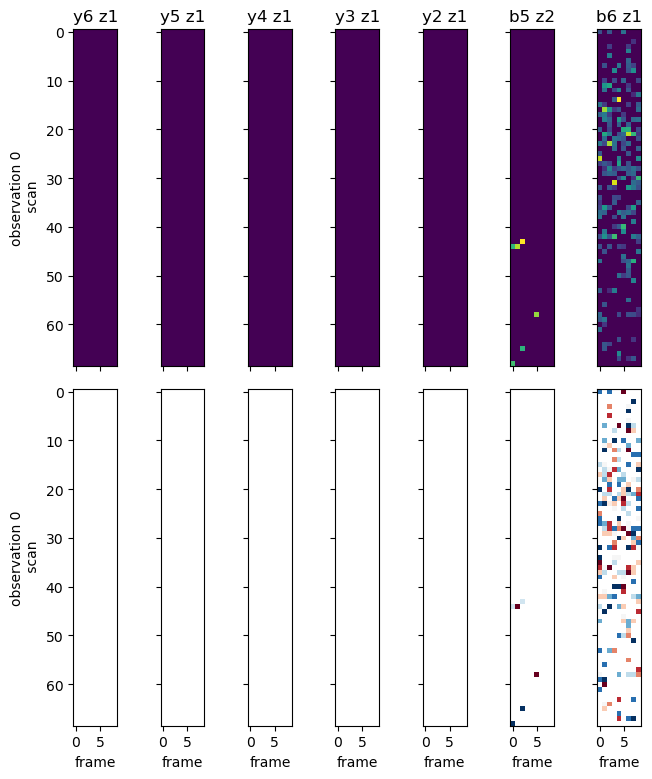

100%|██████████| 10/10 [00:29<00:00,  2.98s/it]


In [260]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_exclusive,
    candidates_df,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=True
)
psm = scoring_workflow()

In [233]:
psm_df, fragment_df = psm

In [241]:
psm_df.channel.value_counts()

0     27863
4     27735
8     27557
12    26642
Name: channel, dtype: int64

In [235]:
psm_df ['id'] = np.arange(len(psm_df))

In [236]:
psm_df = psm_df[(psm_df['decoy'] == 0) | (psm_df['channel'] == 12)].copy()

In [238]:
psm_df.loc[psm_df['channel'] == 12, 'decoy'] = 1

In [231]:
psm_df.replace([np.inf, -np.inf], np.nan, inplace=True)
psm_df.dropna(how="all", inplace=True)

In [225]:
psm_df = psm_df.dropna().reset_index(drop=True).copy()
print(len(psm_df))

57868


In [232]:
# calculate the number of NA values per column
for c in psm_df.columns:
    print(c, psm_df[c].isna().sum())

precursor_idx 0
elution_group_idx 0
charge 0
rank 0
scan_start 0
scan_stop 0
scan_center 0
frame_start 0
frame_stop 0
frame_center 0
precursor_mass_error 0
mz_library 0
mz_observed 0
precursor_isotope_correlation 0
sum_precursor_intensity 0
n_fragments_matched 0
n_fragments 0
fraction_fragments 0
intensity_correlation 0
sum_fragment_intensity 0
mean_fragment_intensity 0
mean_fragment_nonzero 0
n_observations 0
mean_observation_score 0
var_observation_score 0
fragment_coverage 0
fragment_scan_correlation 0
fragment_frame_correlation 0
template_scan_correlation 0
template_frame_correlation 0
fwhm_rt 0
fwhm_mobility 0
sum_b_ion_intensity 0
sum_y_ion_intensity 0
observed_difference_b_y 0
expected_difference_b_y 51929
aggreement_b_y 51929
base_width_mobility 0
base_width_rt 0
rt_observed 0
mobility_observed 0
decoy 0
mz_calibrated 0
rt_library 0
rt_calibrated 0
rt_error 0
mobility_library 0
mobility_calibrated 0
mobility_error 0
proteins 0
channel 0
id 0


54505


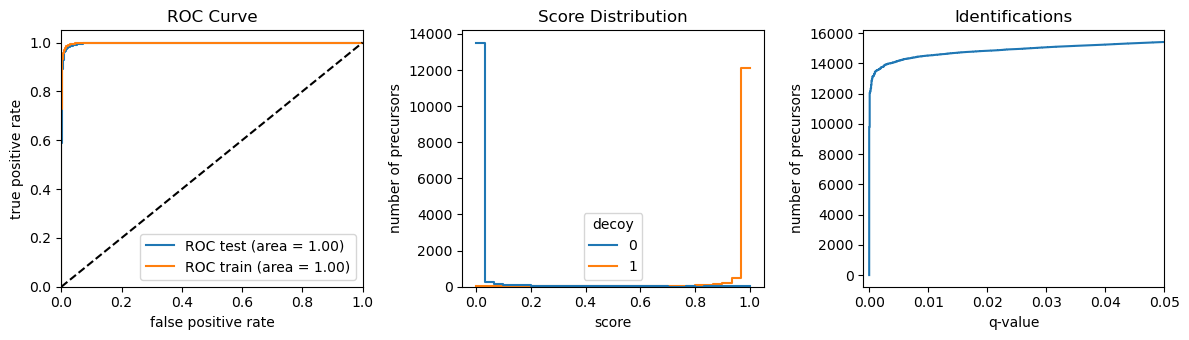

28596
(14384, 54)
3174
54377


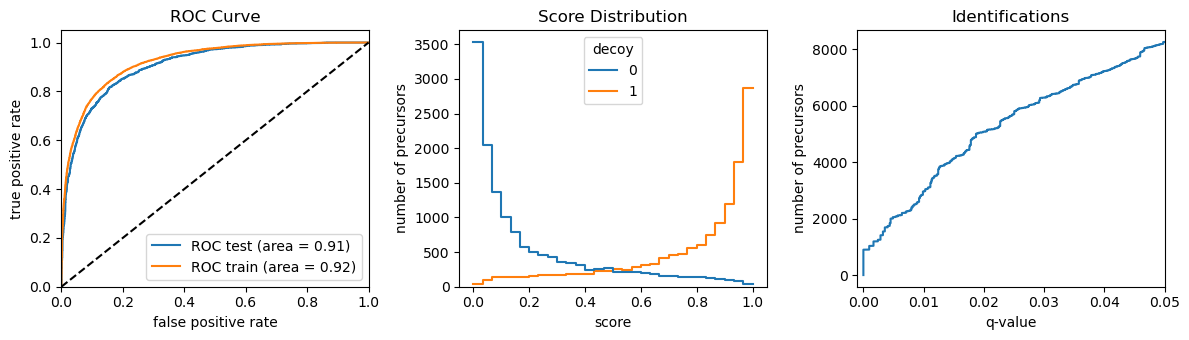

28511
(2934, 54)
1225
54199


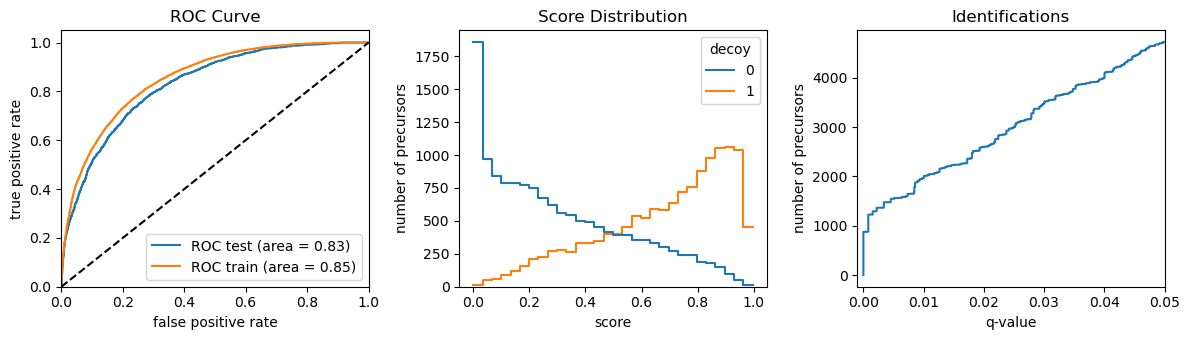

28388
(1948, 54)
818


In [240]:
from alphadia.extraction.scoring import fdr_correction

for channel in [0,4,8]:
    channel_psm_df = psm_df[psm_df['channel'].isin([channel, 12])]
    print(len(channel_psm_df))
    channel_psm_df = fdr_correction(channel_psm_df, index_group='id')
    print(len(channel_psm_df))
    print(channel_psm_df[(channel_psm_df['qval'] <= 0.01) & (channel_psm_df['decoy'] == 0)].shape)
    print(channel_psm_df[(channel_psm_df['qval'] <= 0.01) & (channel_psm_df['decoy'] == 0)]['proteins'].nunique())

In [75]:
d4_df_sig['proteins'].nunique()

1529

In [10]:
import time

performance = []

for mobility_window in [0.02, 0.03, 0.04, 0.05]:
    for rt_window in [10, 20, 30, 45, 60, 90, 120, 150, 180, 200, 250]:

        for i in range(10):

            config = hybridselection.HybridCandidateConfig()
            config.update({
                'rt_tolerance': rt_window,
                'mz_tolerance': 10.,
                'mobility_tolerance': mobility_window,
                'sigma_scale_rt': 0.5,
                'sigma_scale_mobility': 0.8,
                'f_mobility': 1.0,
                'f_rt': 0.95,
                'center_fraction': 0.01,
                'min_size_rt': 3,
                'candidate_count':3
            })

            start_time = time.time()
            selection = hybridselection.HybridCandidateSelection(
                dia_data,
                precursors_flat.sample(1000),
                fragments_flat,
                config.jitclass(),
                rt_tolerance=80,
                mz_tolerance=15,
                mobility_tolerance=0.05,
                candidate_count=1,
                thread_count=10,
                debug=False,
                group_channels=False,
                top_k_precursors=3,
                top_k_fragments=12,
                rt_column='rt_calibrated',
                precursor_mz_column='mz_calibrated',
                fragment_mz_column='mz_library',
                mobility_column='mobility_calibrated'
            )
            candidates = selection()
            stop_time = time.time()

            performance.append({
                'mobility_window': mobility_window,
                'rt_window': rt_window,
                'duration': stop_time - start_time
            })

0:17:21.478089  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:21.478498  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:21.478738  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:21.478967  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 8618.98it/s]
0:17:22.089936  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.090487  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.090732  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:22.090960  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 10741.94it/s]
0:17:22.487150  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.487524  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.487759  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80

In [17]:
performance_df = pd.DataFrame(performance)
path = '/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/slide_decks/2023_04_18_Borgwardt_Symposium/raw_data'

performance_df.to_csv(os.path.join(path, 'performance.tsv'), index=False, sep='\t')


In [22]:
performance_df['it/s'] = 1000 / performance_df['duration']
performance_df['mobility_window'] = performance_df['mobility_window']*2
performance_df['rt_window'] = performance_df['rt_window']*2

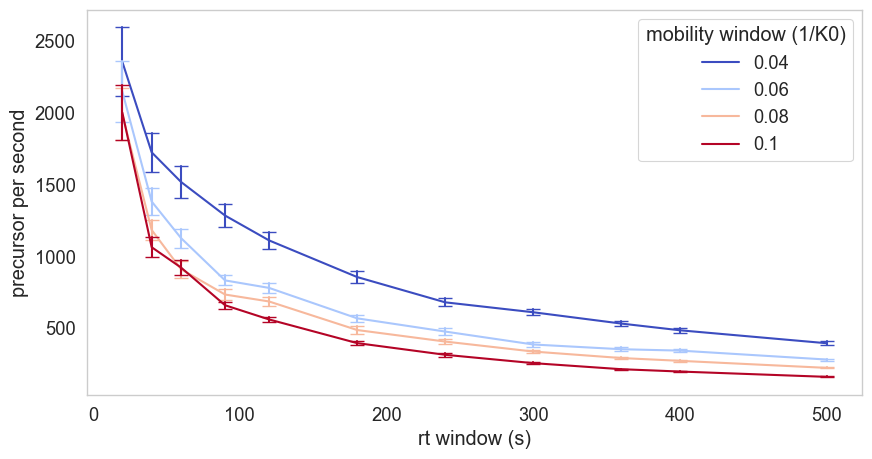

In [42]:
# plot the datapoints with error bars in seaborn
# remove the grid style
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=performance_df,
    x="rt_window",
    y="it/s",
    hue="mobility_window",
    err_style="bars", 
    errorbar=("se", 2),
    err_kws={'capsize':5},
    palette='coolwarm'
)
ax.set_xlabel('rt window (s)')
ax.set_ylabel('precursor per second')
plt.legend(title='mobility window (1/K0)')

fig.savefig(os.path.join(path, 'performance.png'), bbox_inches='tight', dpi=300)


In [15]:
size = 256*128
mflops = 4500

In [16]:
2*mflops/(5*size*np.log2(size))

0.003662109375

In [59]:
gaussian_filter = hybridselection.GaussianFilter(
            dia_data,
            kernel_size=20
        )

4:24:13.931934  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
4:24:13.932534  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
4:24:13.932885  INFO: Expected peak length in RT is 10.00 seconds, sigma is 3.61
4:24:13.933089  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20


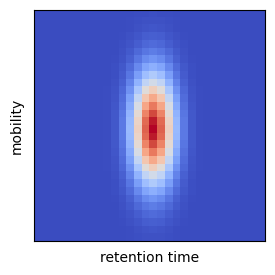

In [67]:


kernel = gaussian_filter.get_kernel()

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(kernel, cmap='coolwarm', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.ylabel('mobility')
plt.xlabel('retention time')
fig.savefig(f'{path}/kernel.png', dpi=300)
plt.show()

In [36]:
features = []
decoy = []
rank = []
pidx = []

for eg in candidates:
    for c in eg.candidates:
        features.append(c.features)
        decoy.append(c.decoy)
        rank.append(c.rank)
        pidx.append(c.precursor_idx)
        
features = np.array(features)
decoy = np.array(decoy)
rank = np.array(rank)
pidx = np.array(pidx)

In [37]:
max_pidx = pidx.max()
candidate = pidx + max_pidx * rank

In [38]:
df = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_07_v1.0.2/HeLa full proteome/alpha_psms.tsv', sep='\t')

In [39]:
candidate_df = df['precursor_idx'].values + max_pidx * df['rank'].values

In [40]:
#mask = np.isin(candidate, candidate_df)

In [58]:
np.float_

numpy.float64

In [41]:
features_masked = features#[mask]
decoy_masked = decoy#[mask]
rank_masked = rank#[mask]
pidx_masked = pidx#[mask]


In [42]:
qval_mask = np.isin(pidx_masked, df[df['qval'] < 0.01]['precursor_idx'].values)

In [35]:
pidx_masked

array([330413, 330406, 287908, ..., 113298, 162935, 287896])

In [34]:
qval_mask.shape

(58193,)

In [43]:
qval_mask.sum()
len(qval_mask)

2088871

In [25]:
decoy.sum()

1039254

1307970


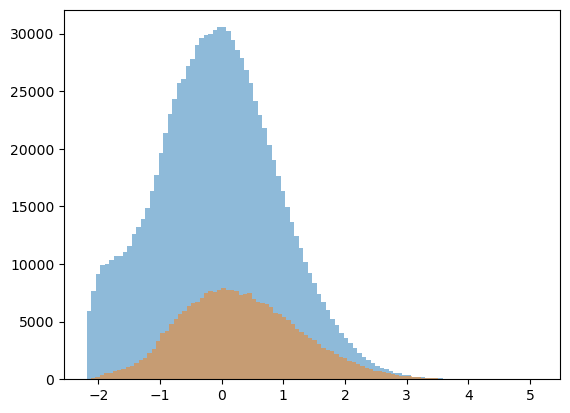

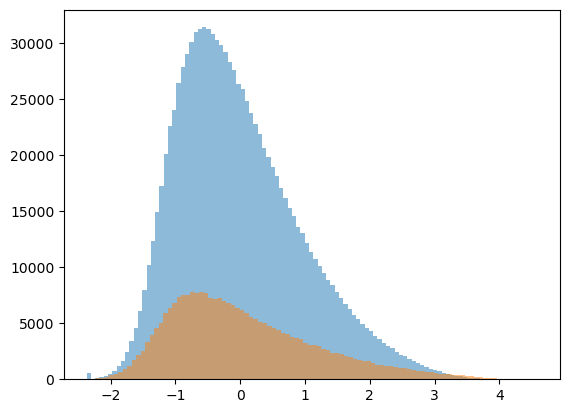

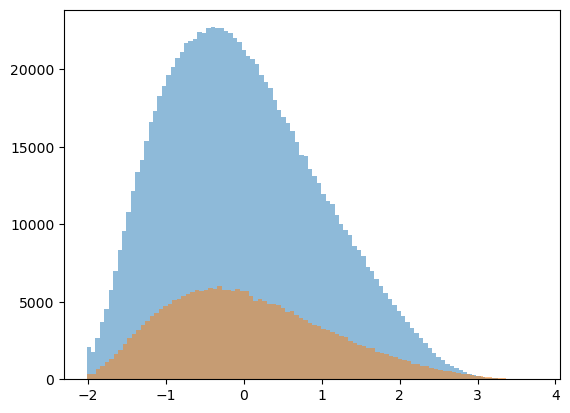

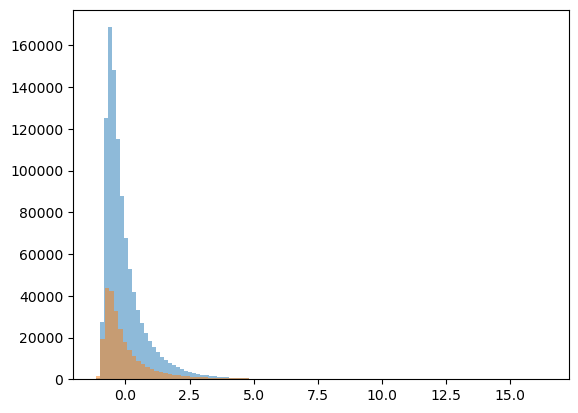

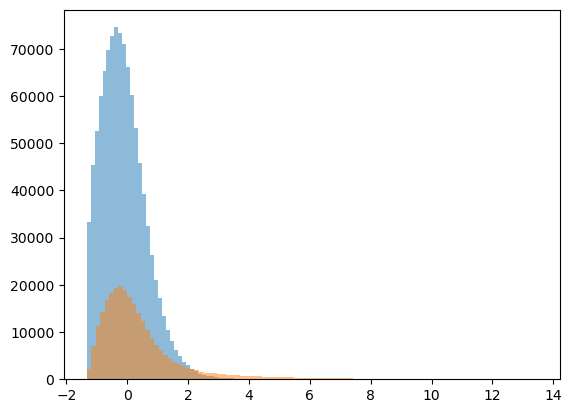

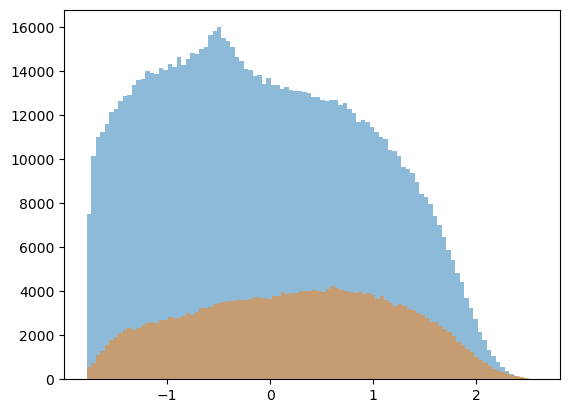

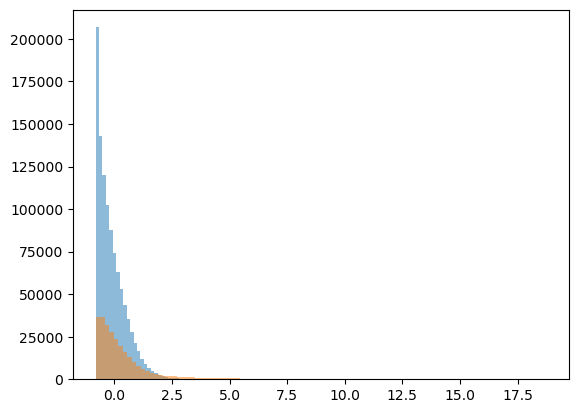

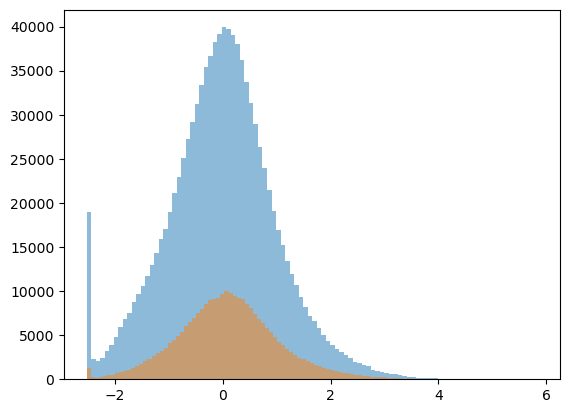

KeyboardInterrupt: 

In [45]:
from sklearn.linear_model import LogisticRegression


def train_classifier(features, decoy, qval_mask):
    # keep all decoys and targets within the qval mask
    to_keep = np.logical_or(decoy, qval_mask)
    features = features[to_keep]
    decoy = decoy[to_keep].astype(bool)

    print(len(features))

    mean = features.mean(axis=0, keepdims=True)
    std = features.std(axis=0, keepdims=True)

    # normalize features
    features = (features - mean)/std

    for i in range(features.shape[1]):
        plt.hist(features[decoy, i], bins=100, alpha=0.5, label='decoy')
        plt.hist(features[~decoy, i], bins=100, alpha=0.5, label='target')
        plt.show()

    # invert the decoy column
    decoy = ~decoy

    lr = LogisticRegression()
    lr.fit(features, decoy)
    print(lr.score(features, decoy))

    # print lr coefficients
    print(mean)
    print(std)
    print(lr.coef_)
    print(lr.intercept_)

train_classifier(features_masked, decoy_masked, qval_mask)


In [ ]:
0.7719351416881346
[[ 2.967344    1.2160938   1.426444   13.960179    0.06620345  0.44364494
   0.03138363  3.1453438 ]]
[[ 1.2583724   0.91052234  1.2126098  14.557817    0.04327635  0.24623954
   0.03225865  1.2671406 ]]
[[ 0.43898424  0.97879761  0.72262148 -0.22705527 -0.21353988  0.3174245
   0.30102549  0.44892641]]
[-0.22941813]

In [110]:
features_masked[:,3] = np.log(features_masked[:,3]+0.0001)
features_masked[:,4] = np.log(features_masked[:,4]+0.0001)

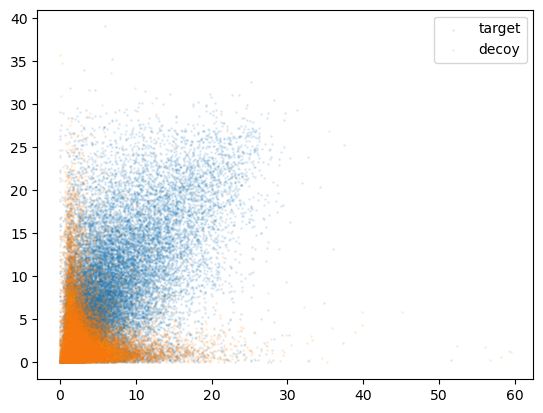

In [143]:
plt.scatter(features_masked[decoy_masked == 0,1], features_masked[decoy_masked == 0,6], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,1], features_masked[decoy_masked == 1,6], label='decoy', alpha=0.1, s=1)
plt.legend()

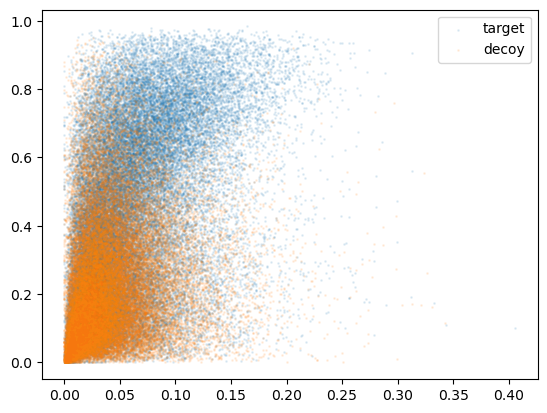

In [112]:
plt.scatter(features_masked[decoy_masked == 0,2], features_masked[decoy_masked == 0,7], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,2], features_masked[decoy_masked == 1,7], label='decoy', alpha=0.1, s=1)
plt.legend()

(array([9.400e+01, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 6.000e+00,
        3.000e+00, 8.000e+00, 6.000e+00, 5.000e+00, 1.100e+01, 9.000e+00,
        1.000e+01, 1.900e+01, 1.400e+01, 2.700e+01, 2.400e+01, 2.300e+01,
        2.000e+01, 4.200e+01, 5.200e+01, 4.000e+01, 7.000e+01, 6.500e+01,
        9.200e+01, 1.090e+02, 1.640e+02, 1.730e+02, 1.750e+02, 2.730e+02,
        3.100e+02, 3.620e+02, 4.590e+02, 5.290e+02, 6.800e+02, 7.320e+02,
        9.150e+02, 1.063e+03, 1.318e+03, 1.451e+03, 1.692e+03, 1.928e+03,
        2.043e+03, 2.197e+03, 2.228e+03, 2.228e+03, 2.273e+03, 2.162e+03,
        2.125e+03, 1.793e+03, 1.773e+03, 1.569e+03, 1.396e+03, 1.252e+03,
        1.122e+03, 9.850e+02, 8.450e+02, 6.870e+02, 6.350e+02, 5.230e+02,
        4.510e+02, 3.550e+02, 3.250e+02, 2.470e+02, 1.930e+02, 1.630e+02,
        1.410e+02, 8.500e+01, 8.300e+0

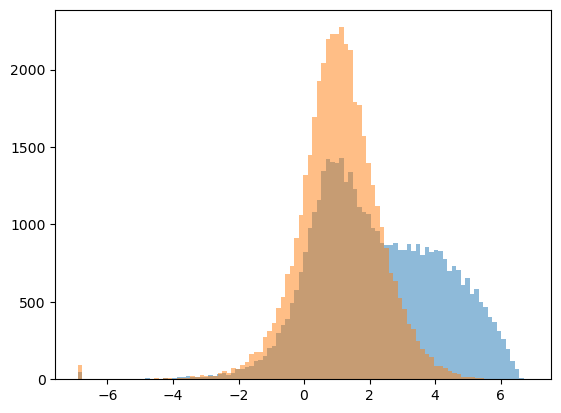

In [113]:
int_diff = np.log((features_masked[:,1] * features_masked[:,6])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

(array([178.,  83.,  53.,  49.,  59.,  58.,  59.,  59.,  52.,  63.,  41.,
         63.,  52.,  57.,  67.,  68.,  50.,  81.,  61.,  58.,  64.,  72.,
         71.,  81.,  84.,  82.,  69.,  76.,  82.,  97.,  81.,  70.,  94.,
         87., 104., 102., 116., 112., 100., 122.,  99.,  95., 104.,  91.,
         87.,  92., 109., 106.,  94., 103., 100., 101.,  83., 111.,  94.,
         91.,  92.,  79.,  76.,  79.,  56.,  61.,  64.,  66.,  55.,  59.,
         45.,  51.,  39.,  32.,  32.,  29.,  25.,  22.,  22.,  19.,  11.,
         12.,   9.,  12.,   9.,   8.,  10.,   3.,   4.,   3.,   5.,   5.,
          0.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-6.9077554, -6.854499 , -6.8012424, -6.7479854, -6.694729 ,
        -6.6414723, -6.588216 , -6.534959 , -6.4817023, -6.428446 ,
        -6.3751893, -6.3219323, -6.268676 , -6.2154193, -6.162163 ,
        -6.108906 , -6.0556493, -6.002393 , -5.9491363, -5.8958793,
        -5.8426228, -5.7893662, -5.7361097, -5

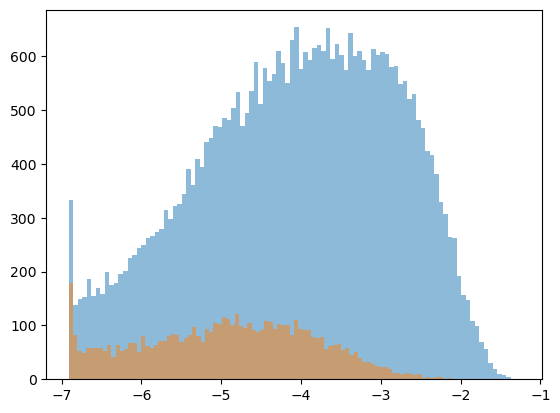

In [93]:
int_diff = np.log((features_masked[:,2] * features_masked[:,7])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

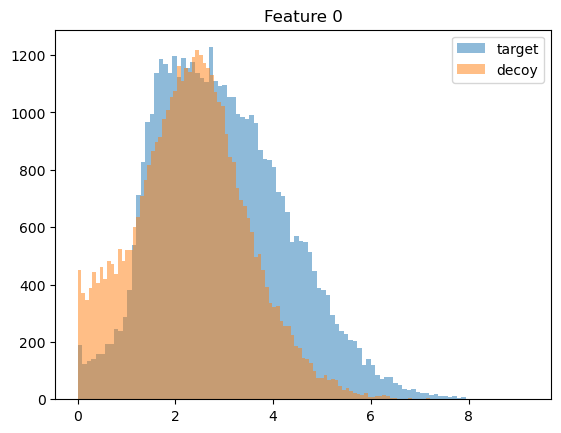

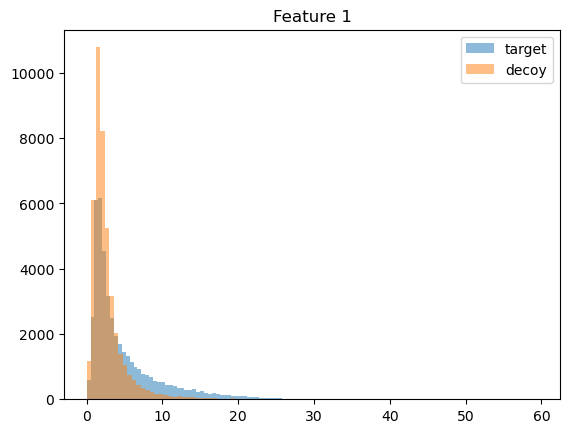

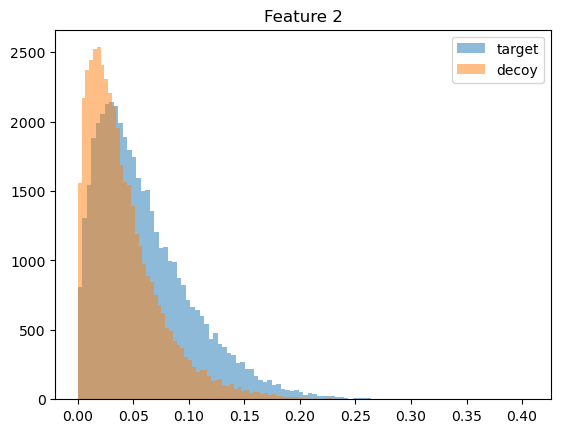

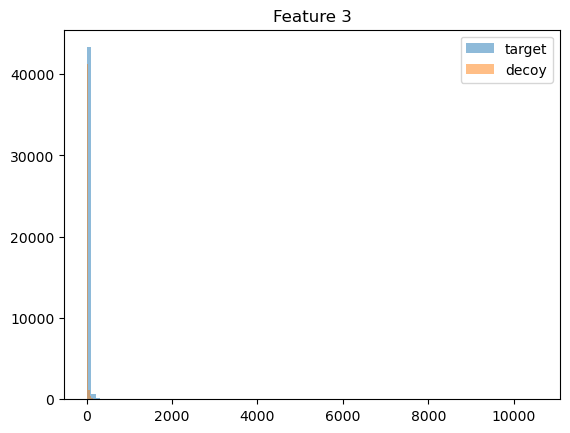

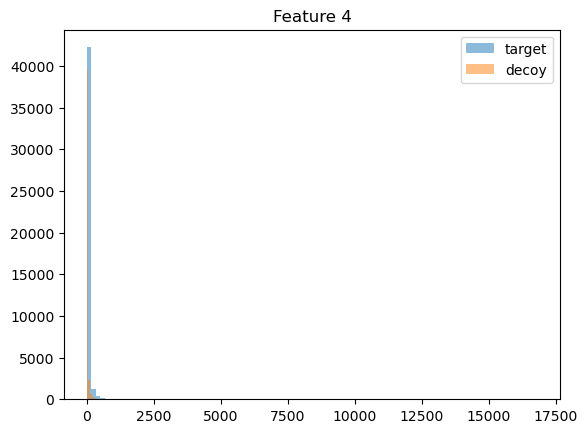

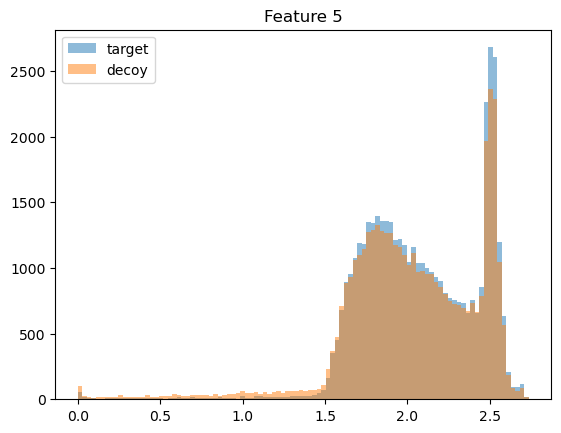

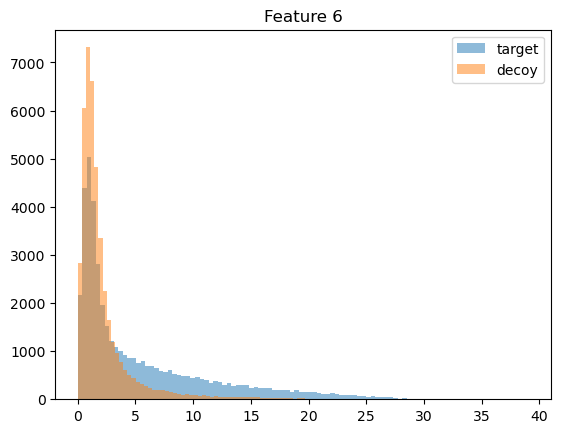

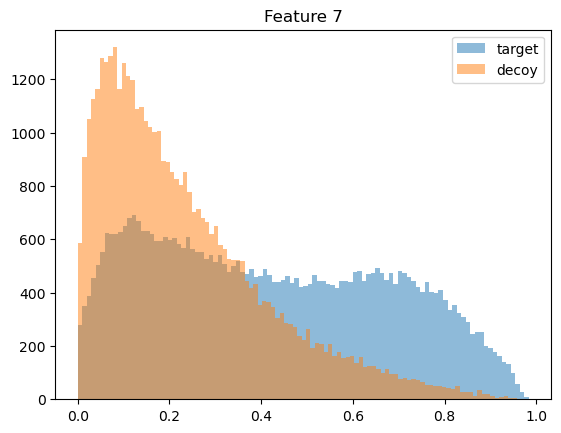

In [146]:
for i in range(features_masked.shape[1]):
    plt.figure()
    plt.hist(features_masked[decoy_masked == 0, i], label='target', bins=100, alpha=0.5)
    plt.hist(features_masked[decoy_masked == 1, i], label='decoy', bins=100, alpha=0.5)
    plt.legend()
    plt.title(f'Feature {i}')

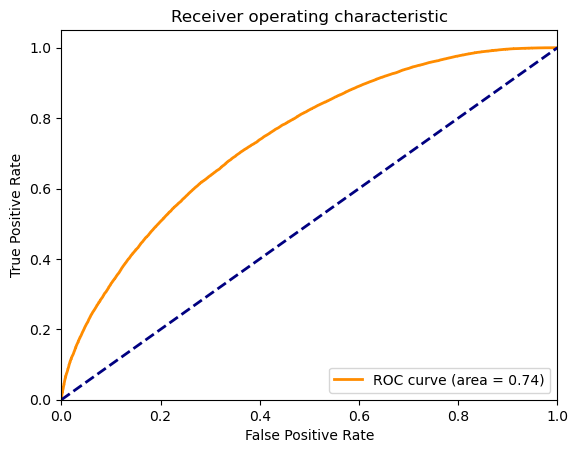

In [95]:
# train and validate a logistic regression model based on the features and decoy labels
from sklearn.linear_model import LogisticRegression
# MLP calssifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features_masked, decoy_masked, test_size=0.2, random_state=42)

sr = StandardScaler()
lr = MLPClassifier()

X_train = sr.fit_transform(X_train)
X_test = sr.transform(X_test)


lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

# evaluiate the model by plotting the score distribution for the two classes (decoy and target)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
print(features.shape)

(414938, 8)


In [108]:
from alphadia.extraction import quadrupole
q = quadrupole.SimpleQuadrupole(dia_data.cycle)

In [117]:
candidates['mz'] = candidates['precursor_mz']


  0%|          | 0/2 [00:00<?, ?it/s]

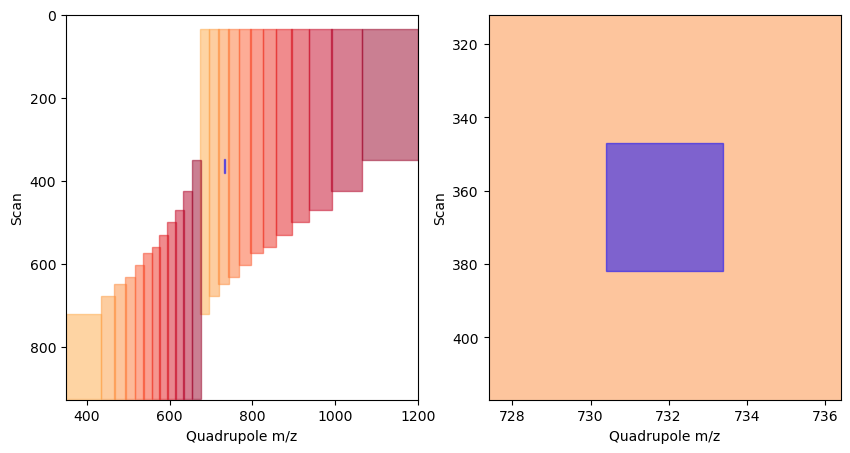

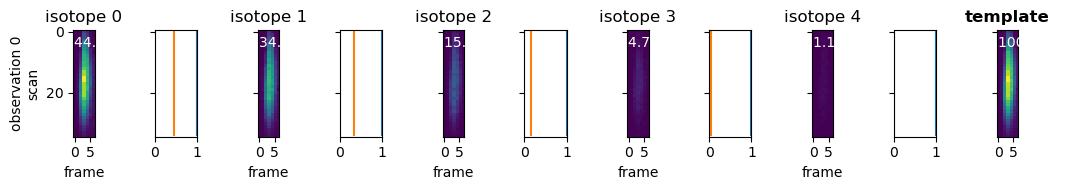

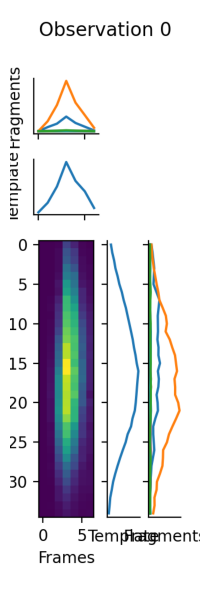

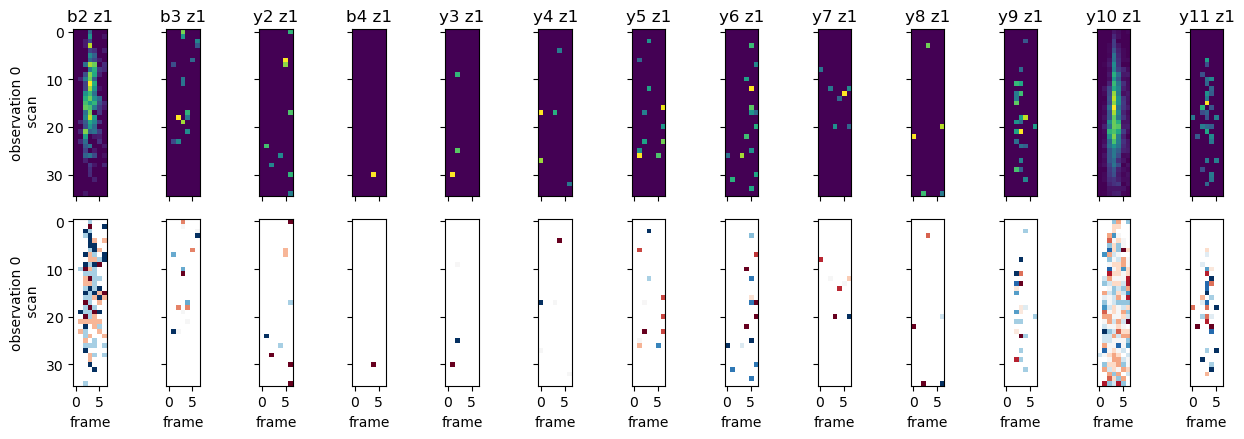

 50%|█████     | 1/2 [00:01<00:01,  1.28s/it]

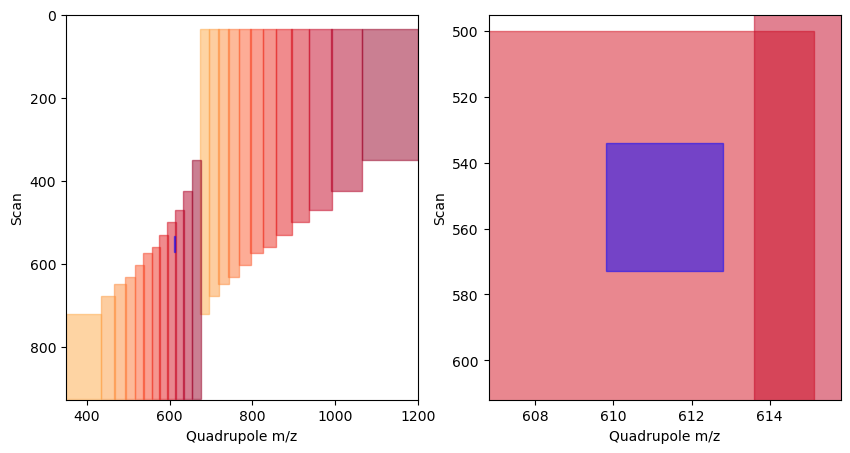

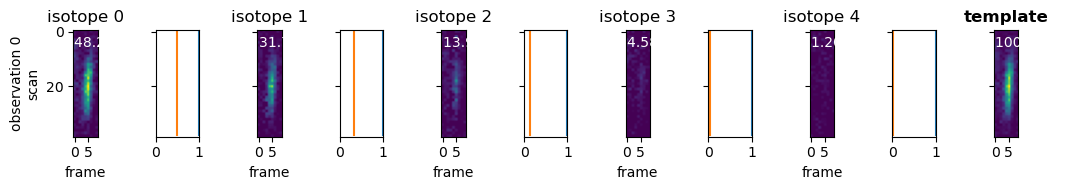

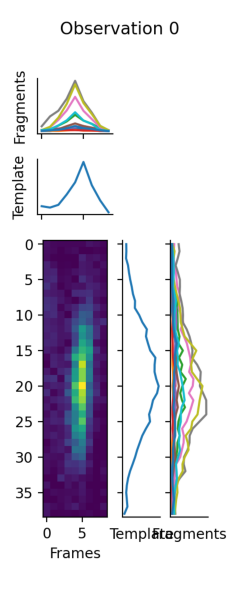

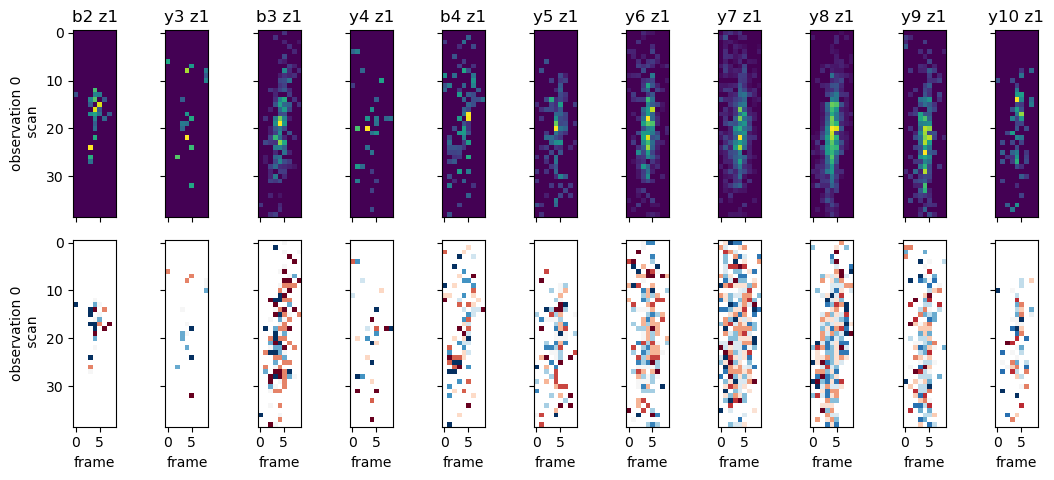

100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


In [119]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow

workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    fragment_mz_column='mz_calibrated',
    debug=True
)
psm = workflow()

In [111]:
psm

(   precursor_idx  elution_group_idx  charge  rank  precursor_mass_error  \
 0         230714                  2       2     0              2.743231   
 1         230714                  2       2     1              0.014830   
 2         230714                  2       2     2             -2.404601   
 3         230714                  2       2     3              1.964307   
 4         230715              76109       2     0              0.623978   
 5         230715              76109       2     1              0.971404   
 6         230715              76109       2     2              0.821897   
 7         230715              76109       2     3             -3.377354   
 8         230715              76109       2     4             -3.446375   
 
    mz_library  mz_observed  precursor_isotope_correlation  \
 0  730.896440   730.898438                       0.999893   
 1  730.896440   730.896423                       0.495449   
 2  730.896440   730.894653                       0.